In [107]:
from IPython.display import Image

## Valores missing, outlier y correlaciones

**Elaborado por:** Jazmín Fernández Ramírez, Jacqueline Fernández Ramírez, Nina Odoux.
Máster Universitario de Ciencia de Datos (MUCD) - CUNEF Universidad.

En este notebook se realiza el estudio y preprocesamiento de las variables numéricas y categoricas. Se realizarán los siguientes pasos:

1. Cambio de tipos de variables.
2. Separación en train y test.
3. Análisis de cada variable con gráficos descriptivos.
4. Para variables numéricas: matriz de correlación, estudio de outliers y estudio de valores missing.
5. Para variables categóricas: relleno de valores missing, y estudio de correlaciones con vCramer.


Para los valores outlier por columnas, se tendrá en cuenta los gráficos:

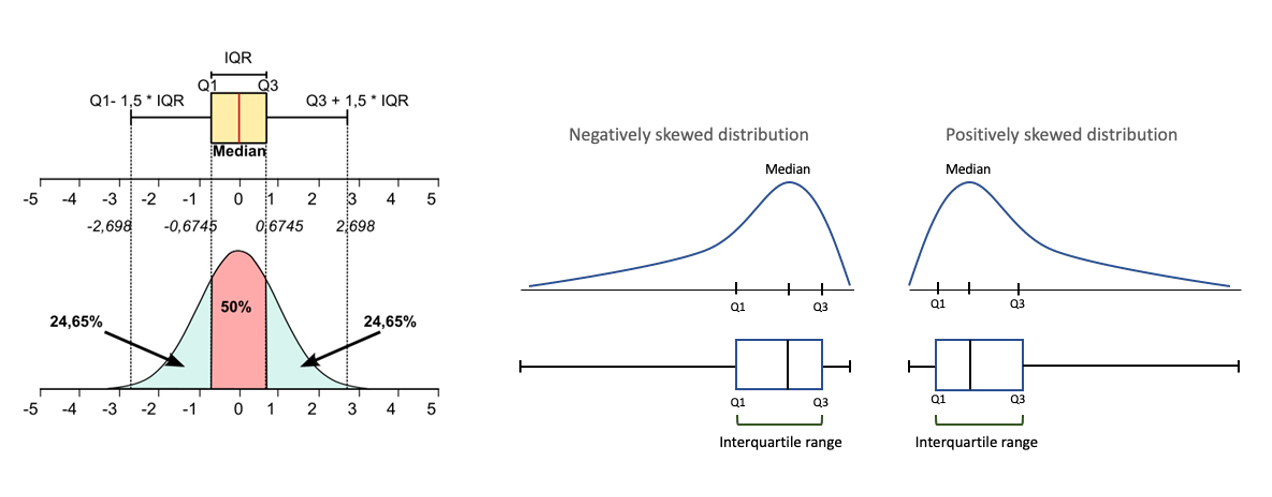

In [110]:
# <img src="../images/analisis_outlier.png">
Image(filename="../images/analisis_outlier.png")

Dentro del tratamiento de los valores missing, se elegirá alguno de los siguientes métodos:

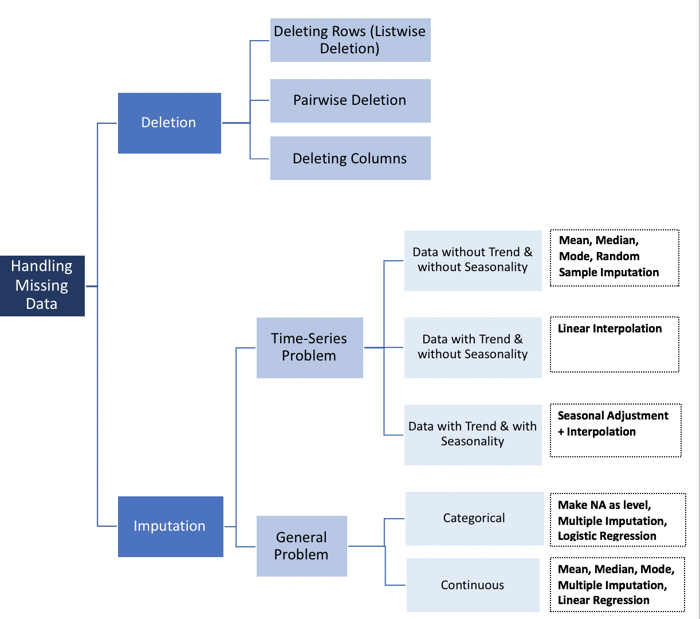

In [112]:
Image(filename="../images/missing.png")

## Importación de liberías

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import time
import gc
import psutil
from sklearn.impute import KNNImputer
import scipy.stats as ss
import warnings
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)
seed = np.random.seed(123)

## Funciones 

En este trabajo se va a importar las funciones definidas en el archivo funciones_auxiliares.py mediante el prefijo f_aux. Por ejemplo, para llamar a la función plot_feature, se debe usar la sintaxis f_aux.plot_feature(...).

In [116]:
import os
print(os.getcwd())

C:\Users\jacki\OneDrive\Documentos\CUNEF\Aprendizaje_Automatico\practica1_EDA\practica1_EDA\notebooks


In [117]:
import sys
sys.path.append("../src")  
import funciones_auxiliares as f_aux

## Lectura de datos del preprocesado inicial

Lectura de los datos y cambio de tipos de variables

In [119]:
df_application = pd.read_csv("../data/preprocessed_data/bank_data_preprocessed.csv")

df_application.shape

(307511, 122)

In [120]:
df_application.columns

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI',
       ...
       'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_EMPLOYED', 'DAYS_BIRTH',
       'REGION_POPULATION_RELATIVE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'SK_ID_CURR'],
      dtype='object', length=122)

In [121]:
list_var_cat, other = f_aux.dame_variables_categoricas(dataset=df_application)
df_application[list_var_cat] = df_application[list_var_cat].astype("category")
list_var_continuous = list(df_application.select_dtypes('float').columns)
df_application[list_var_continuous] = df_application[list_var_continuous].astype(float)
df_application.dtypes

COMMONAREA_MEDI                  float64
COMMONAREA_AVG                   float64
COMMONAREA_MODE                  float64
NONLIVINGAPARTMENTS_MODE         float64
NONLIVINGAPARTMENTS_AVG          float64
NONLIVINGAPARTMENTS_MEDI         float64
FONDKAPREMONT_MODE              category
LIVINGAPARTMENTS_MODE            float64
LIVINGAPARTMENTS_AVG             float64
LIVINGAPARTMENTS_MEDI            float64
FLOORSMIN_AVG                    float64
FLOORSMIN_MODE                   float64
FLOORSMIN_MEDI                   float64
YEARS_BUILD_MEDI                 float64
YEARS_BUILD_MODE                 float64
YEARS_BUILD_AVG                  float64
OWN_CAR_AGE                      float64
LANDAREA_MEDI                    float64
LANDAREA_MODE                    float64
LANDAREA_AVG                     float64
BASEMENTAREA_MEDI                float64
BASEMENTAREA_AVG                 float64
BASEMENTAREA_MODE                float64
EXT_SOURCE_1                     float64
NONLIVINGAREA_MO

In [122]:
df_application.describe()

COMMONAREA_MEDI  COMMONAREA_AVG  COMMONAREA_MODE  \
count     92646.000000    92646.000000     92646.000000   
mean          0.044595        0.044621         0.042553   
std           0.076144        0.076036         0.074445   
min           0.000000        0.000000         0.000000   
25%           0.007900        0.007800         0.007200   
50%           0.020800        0.021100         0.019000   
75%           0.051300        0.051500         0.049000   
max           1.000000        1.000000         1.000000   

       NONLIVINGAPARTMENTS_MODE  NONLIVINGAPARTMENTS_AVG  \
count              93997.000000             93997.000000   
mean                   0.008076                 0.008809   
std                    0.046276                 0.047732   
min                    0.000000                 0.000000   
25%                    0.000000                 0.000000   
50%                    0.000000                 0.000000   
75%                    0.003900                 0.003900   
max                    1.000000                 1.000000   

       NONLIVINGAPARTMENTS_MEDI  LIVINGAPARTMENTS_MODE  LIVINGAPARTMENTS_AVG  \
count              93997.000000           97312.000000          97312.000000   
mean                   0.008651               0.105645              0.100775   
std                    0.047415               0.097880              0.092576   
min                    0.000000               0.000000              0.000000   
25%                    0.000000               0.054200              0.050400   
50%                    0.000000               0.077100              0.075600   
75%                    0.003900               0.131300              0.121000   
max                    1.000000               1.000000              1.000000   

       LIVINGAPARTMENTS_MEDI  FLOORSMIN_AVG  FLOORSMIN_MODE  FLOORSMIN_MEDI  \
count           97312.000000   98869.000000    98869.000000    98869.000000   
mean                0.101954       0.231894        0.228058        0.231625   
std                 0.093642       0.161380        0.161160        0.161934   
min                 0.000000       0.000000        0.000000        0.000000   
25%                 0.051300       0.083300        0.083300        0.083300   
50%                 0.076100       0.208300        0.208300        0.208300   
75%                 0.123100       0.375000        0.375000        0.375000   
max                 1.000000       1.000000        1.000000        1.000000   

       YEARS_BUILD_MEDI  YEARS_BUILD_MODE  YEARS_BUILD_AVG    OWN_CAR_AGE  \
count     103023.000000     103023.000000    103023.000000  104582.000000   
mean           0.755746          0.759637         0.752471      12.061091   
std            0.112066          0.110111         0.113280      11.944812   
min            0.000000          0.000000         0.000000       0.000000   
25%            0.691400          0.699400         0.687200       5.000000   
50%            0.758500          0.764800         0.755200       9.000000   
75%            0.825600          0.823600         0.823200      15.000000   
max            1.000000          1.000000         1.000000      91.000000   

       LANDAREA_MEDI  LANDAREA_MODE   LANDAREA_AVG  BASEMENTAREA_MEDI  \
count  124921.000000  124921.000000  124921.000000      127568.000000   
mean        0.067169       0.064958       0.066333           0.087955   
std         0.082167       0.081750       0.081184           0.082179   
min         0.000000       0.000000       0.000000           0.000000   
25%         0.018700       0.016600       0.018700           0.043700   
50%         0.048700       0.045800       0.048100           0.075800   
75%         0.086800       0.084100       0.085600           0.111600   
max         1.000000       1.000000       1.000000           1.000000   

       BASEMENTAREA_AVG  BASEMENTAREA_MODE   EXT_SOURCE_1  NONLIVINGAREA_MODE  \
count     127568.000000      127568.000000  134133.000000       1378

## Separación en train y test estratificado

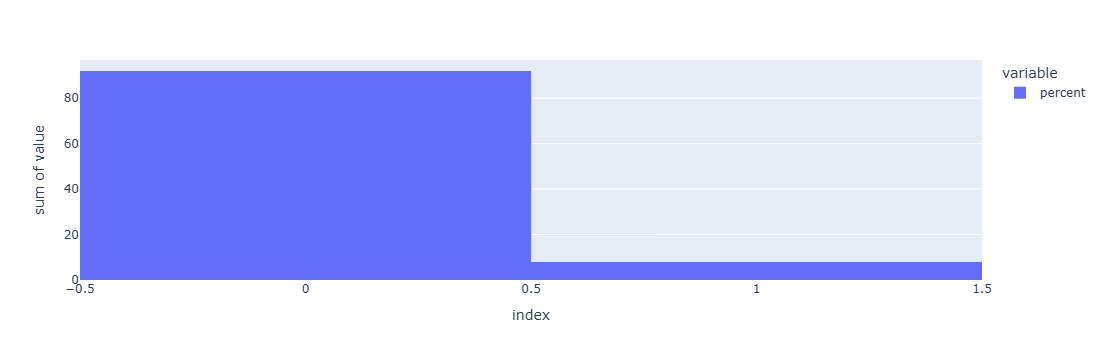

In [124]:
pd_plot_target_status = df_application['TARGET']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

pd_plot_target_status_conteo = df_application['TARGET'].value_counts().reset_index()
pd_plot_target_status_pc = pd.merge(pd_plot_target_status, 
                                  pd_plot_target_status_conteo, on=['index'], how='inner')

fig = px.histogram(pd_plot_target_status_pc, x="index", y=['percent'])
fig.show()

In [125]:
X_df_application, X_df_application_test, y_df_application, y_df_application_test = train_test_split(df_application.drop('TARGET',axis=1), 
                                                                     df_application['TARGET'], 
                                                                     stratify=df_application['TARGET'], 
                                                                     test_size=0.2)
df_application_train = pd.concat([X_df_application, y_df_application],axis=1)
df_application_test = pd.concat([X_df_application_test, y_df_application_test],axis=1)

In [126]:
print('== Train\n', df_application_train['TARGET'].value_counts(normalize=True))
print('== Test\n', df_application_test['TARGET'].value_counts(normalize=True))

== Train
 0    0.919271
1    0.080729
Name: TARGET, dtype: float64
== Test
 0    0.919272
1    0.080728
Name: TARGET, dtype: float64


En el presente código, se llevó a cabo un estudio minucioso de la variable objetivo TARGET para entender su distribución y tratar el desequilibrio notable existente. En un principio, se determinó la distribución porcentual y la totalidad de cada clase de TARGET en el DataFrame df_application. Esto hizo evidente que el 91.93% de los registros son de la clase 0 y únicamente el 8.07% pertenecen a la clase 1. Se aplicó una separación estratificada para preservar la proporción de clases en los conjuntos de datos de entrenamiento y prueba. De este modo, se empleó la función train_test_split de sklearn, garantizando una representación justa de ambas clases en los datos de entrenamiento y prueba.

Por otro lado, para confirmar la estratificación, se comprobaron las proporciones de cada clase en los dos grupos. Los hallazgos corroboraron que las distribuciones de TARGET se conservaron constantes tanto en los datos de entrenamiento como en los de prueba, lo cual es vital para prevenir prejuicios en el modelo y asegurar una valoración equitativa. Este cuidadoso enfoque en la separación y validación de los datos es esencial para garantizar la robustez y exactitud de los modelos de aprendizaje automático que se formarán en dichos datos. Por lo tanto, se asegura que el modelo pueda generalizar adecuadamente nuevos datos y ofrecer proyecciones confiables.

## Visualización descriptiva de los datos

Se ve el número de valores nulos por filas y por columnas

In [129]:
pd_series_null_columns = df_application_train.isnull().sum().sort_values(ascending=False)
pd_series_null_rows = df_application_train.isnull().sum(axis=1).sort_values(ascending=False)
print(pd_series_null_columns.shape, pd_series_null_rows.shape)

pd_null_columnas = pd.DataFrame(pd_series_null_columns, columns=['nulos_columnas'])     
pd_null_filas = pd.DataFrame(pd_series_null_rows, columns=['nulos_filas'])  
pd_null_filas['target'] = df_application_train['TARGET'].copy()
pd_null_columnas['porcentaje_columnas'] = pd_null_columnas['nulos_columnas']/df_application_train.shape[0]
pd_null_filas['porcentaje_filas']= pd_null_filas['nulos_filas']/df_application_train.shape[1]

(122,) (246008,)


In [130]:
pd_null_columnas

nulos_columnas  porcentaje_columnas
COMMONAREA_MEDI                       171830             0.698473
COMMONAREA_MODE                       171830             0.698473
COMMONAREA_AVG                        171830             0.698473
NONLIVINGAPARTMENTS_MODE              170798             0.694278
NONLIVINGAPARTMENTS_MEDI              170798             0.694278
NONLIVINGAPARTMENTS_AVG               170798             0.694278
FONDKAPREMONT_MODE                    168191             0.683681
LIVINGAPARTMENTS_AVG                  168151             0.683518
LIVINGAPARTMENTS_MEDI                 168151             0.683518
LIVINGAPARTMENTS_MODE                 168151             0.683518
FLOORSMIN_AVG                         166871             0.678315
FLOORSMIN_MODE                        166871             0.678315
FLOORSMIN_MEDI                        166871             0.678315
YEARS_BUILD_MODE                      163544             0.664791
YEARS_BUILD_AVG                       163544             0.664791
YEARS_BUILD_MEDI                      163544             0.664791
OWN_CAR_AGE                           162329             0.659853
LANDAREA_MODE                         146029             0.593595
LANDAREA_AVG                          146029             0.593595
LANDAREA_MEDI                         146029             0.593595
BASEMENTAREA_MEDI                     143880             0.584859
BASEMENTAREA_AVG                      143880             0.584859
BASEMENTAREA_MODE                     143880             0.584859
EXT_SOURCE_1                          138528             0.563104
NONLIVINGAREA_MODE                    135617             0.551271
NONLIVINGAREA_AVG                     135617             0.551271
NONLIVINGAREA_MEDI                    135617             0.551271
ELEVATORS_AVG                         131001             0.532507
ELEVATORS_MODE                        131001             0.532507
ELEVATORS_MEDI                        131001             0.532507
WALLSMATERIAL_MODE                    125005             0.508134
APARTMENTS_MEDI                       124764             0.507154
APARTMENTS_AVG                        124764             0.507154
APARTMENTS_MODE                       124764             0.507154
ENTRANCES_MEDI                        123739             0.502988
ENTRANCES_AVG                         123739             0.502988
ENTRANCES_MODE                        123739             0.502988
HOUSETYPE_MODE                        123367             0.501476
LIVINGAREA_AVG                        123356             0.501431
LIVINGAREA_MODE                       123356             0.501431
LIVINGAREA_MEDI                       123356             0.501431
FLOORSMAX_MODE                        122325             0.497240
FLOORSMAX_MEDI                        122325             0.497240
FLOORSMAX_AVG                         122325             0.497240
YEARS_BEGINEXPLUATATION_AVG           119935             0.487525
YEARS_BEGINEXPLUATATION_MODE          119935             0.487525
YEARS_BEGINEXPLUATATION_MEDI          119935             0.487525
TOTALAREA_MODE                        118643             0.482273
EMERGENCYSTATE_MODE                   116513             0.473615
OCCUPATION_TYPE                        76942             0.312762
EXT_SOURCE_3                           48974             0.199075
AMT_REQ_CREDIT_BUREAU_HOUR             33391             0.135731
AMT_REQ_CREDIT_BUREAU_DAY              33391             0.135731
AMT_REQ_CREDIT_BUREAU_WEEK             33391             0.135731
AMT_REQ_CREDIT_BUREAU_MON              33391             0.135731
AMT_REQ_CREDIT_BUREAU_QRT              33391             0.135731
AMT_REQ_CREDIT_BUREAU_YEAR             33391             0.135731
NAME_TYPE_SUITE                         1003             0.004077
OBS_60_CNT_SOCIAL_CIRCLE                 812             0.003301
DEF_60_CNT_SOCIAL_CIRCLE                 812             0.003301
DEF_

In [131]:
pd_null_filas.head()

nulos_filas target  porcentaje_filas
116937           61      0               0.5
244833           61      0               0.5
197736           61      0               0.5
133770           61      0               0.5
269492           61      0               0.5

En este apartado, pd_series_null_columns y pd_series_null_rows, determinan la cantidad total de valores nulos en cada columna y fila, respectivamente, y las organizan de manera descendente para detectar con eficacia las columnas y filas con mayor cantidad de valores nulos. Cabe mencionar que, detectar la ubicación de los valores nulos es esencial para el siguiente paso en la gestión de datos, debido a que facilita la toma de decisiones fundamentadas respecto a si se deben modificar filas/columnas, atribuir valores nulos o tratar los nulos de una forma distinta.

## Distribución del resto de variables

In [134]:
def set_plot_style():
    """Configura el estilo general de los gráficos"""
    sns.set_style("whitegrid")
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.titlesize'] = 12
    plt.rcParams['axes.labelsize'] = 10
    plt.rcParams['xtick.labelsize'] = 9
    plt.rcParams['ytick.labelsize'] = 9

def clear_memory():
    """Limpia la memoria"""
    plt.close('all')
    gc.collect()

def optimize_figure_size(n_categories, label_length):
    """Optimiza el tamaño de la figura"""
    if n_categories > 10 or label_length > 15:
        return (15, 6)
    return (12, 5)

def plot_feature(df, col_name, isContinuous, target, max_categories=15, sample_size=50000):
    
    """
   Función para crear gráficos exploratorios personalizados con Seaborn, optimizando su diseño según las 
    características de la variable analizada (continua o categórica) y su relación con la variable objetivo.

    Parámetros:
    -----------
    - df : pandas.DataFrame
        El conjunto de datos que contiene las variables a analizar.
    - col_name : str
        Nombre de la columna a analizar dentro del DataFrame.
    - isContinuous : bool
        Indica si la columna es una variable continua (True) o categórica (False).
    - target : str
        Nombre de la variable objetivo con la que se analizará la relación de la columna.
    - max_categories : int, opcional (default=15)
        Número máximo de categorías a visualizar para variables categóricas (las categorías con menor frecuencia serán excluidas si se excede este límite).
    - sample_size : int, opcional (default=50000)
        Tamaño máximo de la muestra a utilizar para optimizar el rendimiento en conjuntos de datos grandes.      
        
    Salida:
    -------
    - fig : matplotlib.figure.Figure
        Figura generada con los gráficos. Si ocurre un error durante la generación de los gráficos, 
        se devuelve None.

    Descripción del Proceso:
    ------------------------
    1. *Reducción de datos para conjuntos grandes*: Si el número de filas del DataFrame supera 
       sample_size, se toma una muestra aleatoria para optimizar la velocidad de procesamiento.
    2. *Ajuste del tamaño de la figura*: El tamaño de los gráficos se calcula dinámicamente en función 
       del número de valores únicos en la columna analizada (col_name) y la longitud de sus etiquetas.
    3. *Gráficos para variables continuas*:
       - *Histograma*: Muestra la distribución de la variable. Incluye líneas para la media y la mediana.
       - *Boxplot*: Visualiza la distribución de la variable por categorías de la variable objetivo.
    4. *Gráficos para variables categóricas*:
       - *Conteo de categorías*: Muestra la frecuencia de las principales categorías.
       - *Proporción por target*: Visualiza la proporción de la variable objetivo en función de las categorías.
    5. *Limpieza de outliers (para continuas)*: Se excluyen valores extremos utilizando los percentiles 
       1 y 99.
    6. *Control de etiquetas y rotación*: Se optimizan las etiquetas del eje X para mejorar la legibilidad, ajustando la rotación según la longitud de las etiquetas y el número de categorías.
  Uso recomendado:
    -----------------
    Utiliza esta función para el análisis exploratorio de datos (EDA), cuando necesites entender:
    - La distribución de una variable continua o categórica.
    - La relación entre una variable independiente y la variable objetivo.
    
    Manejo de errores:
    ------------------
    Si ocurre un error durante la ejecución (por ejemplo, si una columna no existe en el DataFrame o si 
    el tipo de dato no es adecuado), la función cierra la figura creada y devuelve None.  
    """
    
    # Muestreo si el dataset es grande
    if len(df) > sample_size:
        df = df.sample(n=sample_size, random_state=42)
    
    # Calcular métricas para el tamaño
    n_unique = len(df[col_name].unique())
    max_label_len = df[col_name].astype(str).str.len().max()
    figsize = optimize_figure_size(n_unique, max_label_len)
    
    # Crear figura
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    # Paleta de colores personalizada
    palette = sns.color_palette(['#2ecc71', '#e74c3c', '#3498db'])
    
    try:
        # Calcular información de nulos
        nulls = df[col_name].isnull().sum()
        null_pct = (nulls / len(df)) * 100
        
        if isContinuous:
            # Limpiar outliers
            q1, q3 = df[col_name].quantile([0.01, 0.99])
            df_clean = df[(df[col_name] >= q1) & (df[col_name] <= q3)]
            
            # Gráfico de distribución
            sns.histplot(
                data=df_clean,
                x=col_name,
                ax=ax1,
                color=palette[0],
                kde=True,
                bins=30
            )
            
            # Añadir líneas de media y mediana
            mean_val = df_clean[col_name].mean()
            median_val = df_clean[col_name].median()
            ax1.axvline(mean_val, color=palette[1], linestyle='--', label=f'Media: {mean_val:.2f}')
            ax1.axvline(median_val, color=palette[2], linestyle='--', label=f'Mediana: {median_val:.2f}')
            ax1.legend(fontsize=8)
            
            # Boxplot
            sns.boxplot(
                x=target,
                y=col_name,
                data=df_clean,
                ax=ax2,
                palette=[palette[0], palette[1]]
            )
            
        else:
            # Limitar categorías para variables categóricas
            value_counts = df[col_name].value_counts()
            if len(value_counts) > max_categories:
                top_cats = value_counts.nlargest(max_categories).index
                df = df[df[col_name].isin(top_cats)]
                value_counts = value_counts[top_cats]
                
            # Gráfico de conteo
            sns.countplot(
                data=df,
                x=col_name,
                order=value_counts.index,
                ax=ax1,
                color=palette[0]
            )
            
            # Gráfico de proporción por target
            target_props = df.groupby(col_name)[target].value_counts(normalize=True).unstack()
            target_props.plot(
                kind='bar',
                ax=ax2,
                color=[palette[0], palette[1]],
                width=0.8
            )
            ax2.set_ylabel(f'Proporción de {target}')
        
        # Configurar títulos y etiquetas
        ax1.set_title(f'Distribución de {col_name}\nNulos: {nulls:,} ({null_pct:.1f}%)')
        ax2.set_title(f'Relación con {target}')
        
        # Ajustar etiquetas
        for ax in [ax1, ax2]:
            if not isContinuous:
                labels = ax.get_xticklabels()
                if len(labels) > 0:
                    max_len = max(len(str(l.get_text())) for l in labels)
                    rotation = 90 if max_len > 10 or len(labels) > 5 else 45
                    ax.set_xticklabels(
                        labels, 
                        rotation=rotation, 
                        ha='right' if rotation == 90 else 'right',
                        fontsize=8
                    )
            
            # Ajustar grid
            ax.grid(True, alpha=0.3)
            
            # Ajustar límites
            if not isContinuous:
                ax.set_xlabel(col_name, fontsize=9)
        
        # Ajustar espacio
        plt.tight_layout()
        return fig
        
    except Exception as e:
        plt.close(fig)
        print(f"Error en {col_name}: {str(e)}")
        return None

In [135]:
def plot_all_features(df, target_col='TARGET', batch_size=3, memory_threshold=85):
    """
    Función para generar gráficos exploratorios de todas las características de un conjunto de datos,
    optimizando el uso de recursos de memoria y procesando las columnas en lotes.

    Parámetros:
    -----------
    - df : pandas.DataFrame
        El conjunto de datos que contiene las características y la variable objetivo.
    - target_col : str, opcional (default='TARGET')
        Nombre de la columna objetivo con la cual se analizará la relación de las demás características.
    - batch_size : int, opcional (default=3)
        Número de columnas a procesar simultáneamente en cada lote para optimizar el rendimiento.
    - memory_threshold : int, opcional (default=85)
        Porcentaje máximo de uso de memoria permitido antes de forzar la limpieza de recursos.  
        
    Descripción del Proceso:
    ------------------------
    1. *Configuración inicial*:
       - Configura el estilo visual para los gráficos utilizando una función personalizada (set_plot_style).
       - Excluye la columna objetivo (target_col) de la lista de columnas a procesar.
       - Calcula el número total de columnas a analizar.

    2. *Procesamiento por lotes*:
       - Divide las columnas en lotes (batch_size) para evitar sobrecargar la memoria en datasets grandes.
       - Antes de procesar un lote, verifica el uso de memoria utilizando psutil.virtual_memory().
       - Si el uso de memoria excede el umbral definido (memory_threshold), fuerza la limpieza de memoria 
         invocando clear_memory().

    3. *Generación de gráficos*:
       - Para cada columna del lote:
         - Determina si es una variable continua o categórica, basándose en su tipo de datos y el número de 
           valores únicos.
         - Llama a la función plot_feature para generar los gráficos correspondientes. Si la función devuelve 
           un gráfico válido, este se muestra y se cierra para liberar recursos.
       - Limpia la memoria después de procesar cada columna para optimizar el uso de recursos.  4. *Pausa entre lotes*:
       - Introduce un breve retraso entre lotes para evitar sobrecargar el sistema, especialmente útil en entornos 
         con recursos limitados.

    5. *Manejo de errores*:
       - Captura excepciones generadas por columnas individuales y continúa procesando las demás, 
         asegurando que el proceso no se detenga por errores aislados.
       - Permite la interrupción manual mediante un KeyboardInterrupt (Ctrl + C), asegurando la limpieza de 
         recursos antes de finalizar.  

    Salida:
    -------
    - Muestra en pantalla los gráficos generados para cada columna y los cierra automáticamente para optimizar 
      el uso de memoria.
    - Imprime mensajes en la consola para informar sobre el progreso del análisis (lotes procesados, columnas 
      con errores, etc.).

    Uso recomendado:
    -----------------
    Esta función es ideal para realizar análisis exploratorio de datos (EDA) cuando:
    - Trabajas con un conjunto de datos con un gran número de características.
    - Necesitas automatizar la generación de gráficos para todas las columnas, optimizando el uso de recursos.
    - Quieres identificar patrones generales en la relación entre las características y la variable objetivo.

    Manejo de errores:
    ------------------
    - Si una columna no puede procesarse por cualquier motivo (como valores no válidos o errores inesperados), 
      la función imprime el error en consola y continúa con la siguiente columna.
    - Permite interrumpir el proceso manualmente mediante Ctrl + C, asegurando la limpieza de memoria al finalizar.
    """
    # Configurar estilo
    set_plot_style()
    
    # Preparar columnas
    columns = [col for col in df.columns if col != target_col]
    total_cols = len(columns)
    
    print(f"Iniciando análisis de {total_cols} características")
    
    try:
        for i in range(0, total_cols, batch_size):
            # Verificar memoria
            if psutil.virtual_memory().percent > memory_threshold:
                clear_memory()
                print("\nLimpiando memoria...")
                time.sleep(2)
            
            batch_cols = columns[i:i + batch_size]
            print(f"\nProcesando lote {i//batch_size + 1} de {(total_cols + batch_size - 1)//batch_size}")
            
            for col in batch_cols:
                try:
                    # Determinar tipo de variable
                    is_continuous = (
                        df[col].dtype in [float, int] and 
                        len(df[col].unique()) > 10
                    )
                    
                    # Crear gráfico
                    fig = plot_feature(
                        df=df,
                        col_name=col,
                        isContinuous=is_continuous,
                        target=target_col,
                        max_categories=15,    # Límite de categorías
                        sample_size=50000     # Límite de registros
                    )
                    
                    if fig is not None:
                        plt.show()
                        plt.close(fig)
                    
                    # Limpiar memoria
                    clear_memory()
                    
                except Exception as e:
                    print(f"Error procesando {col}: {str(e)}")
                    continue
            
            # Pausa entre lotes
            time.sleep(1)
        
        print("\nProceso completado exitosamente.")
        
    except KeyboardInterrupt:
        print("\nProceso interrumpido por el usuario.")
        clear_memory()
    
    finally:
        clear_memory()

Iniciando análisis de 121 características

Limpiando memoria...

Procesando lote 1 de 41


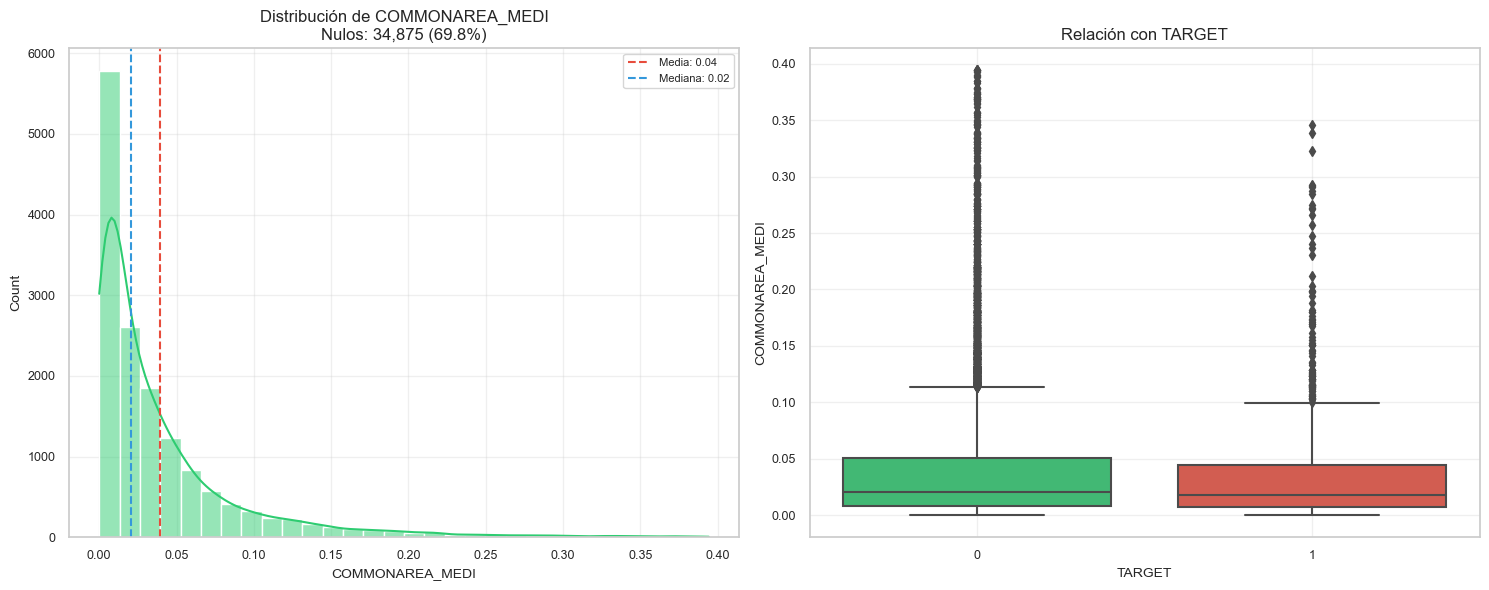

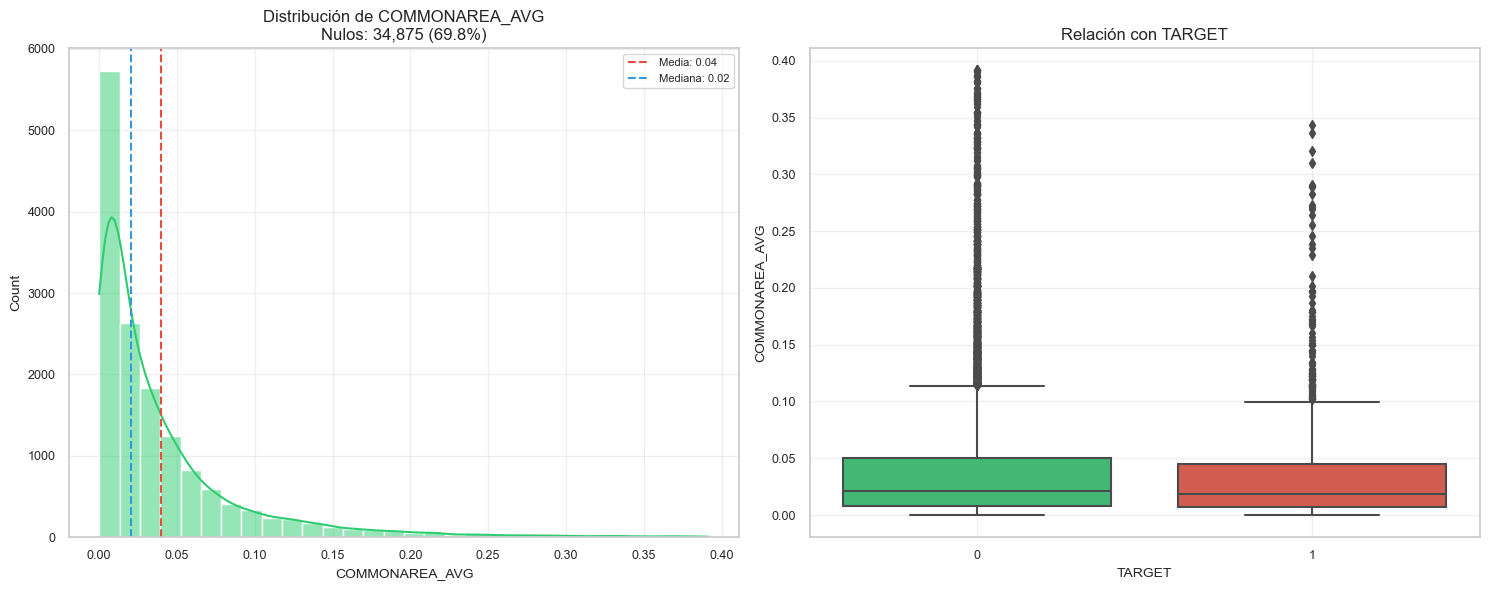

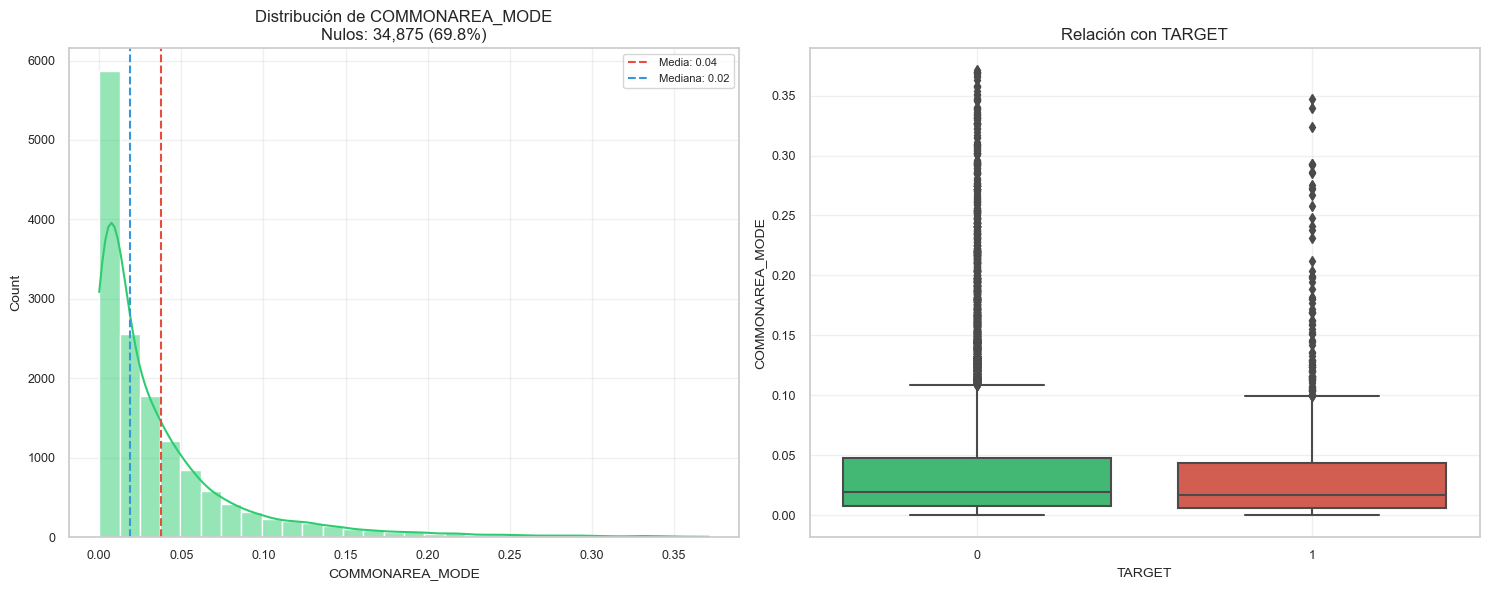


Limpiando memoria...

Procesando lote 2 de 41


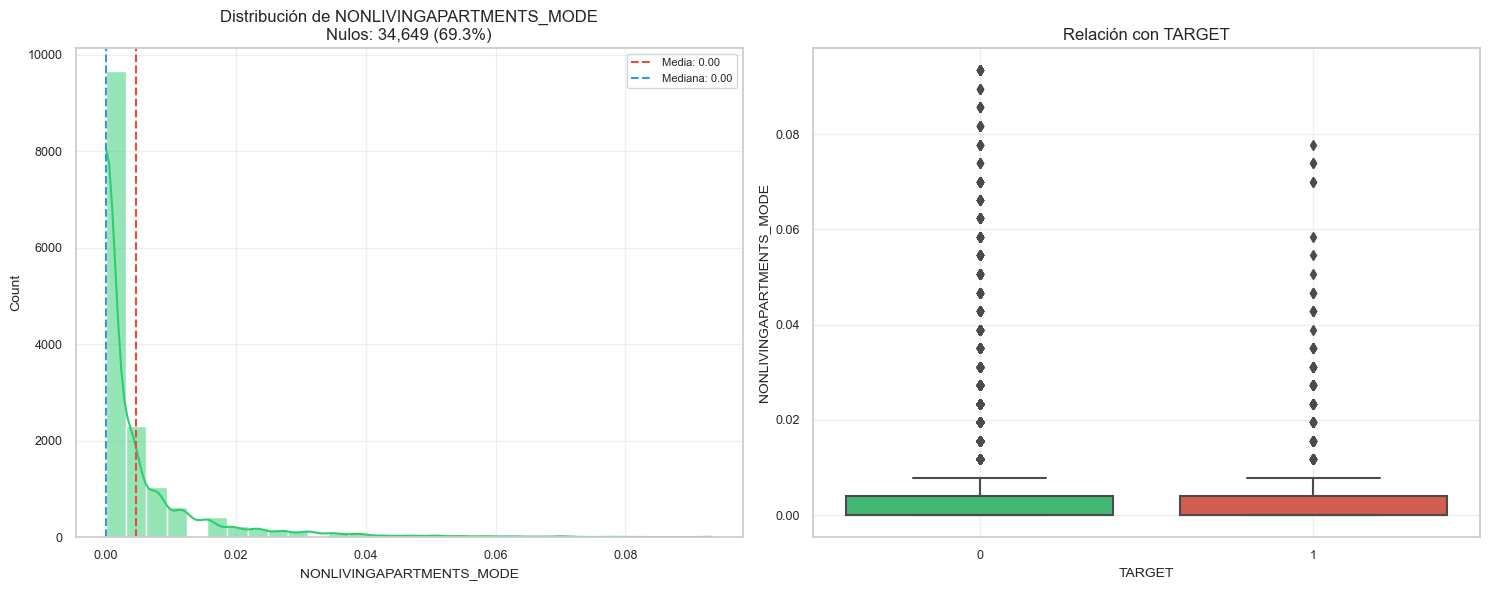

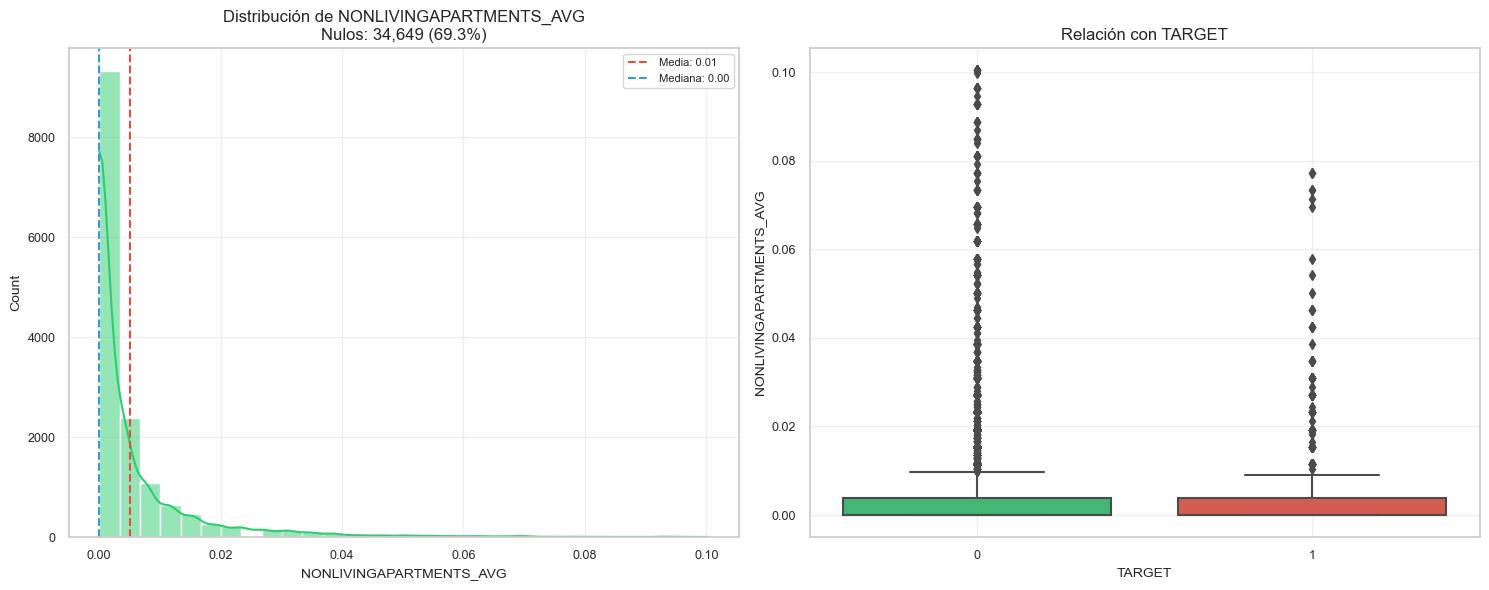

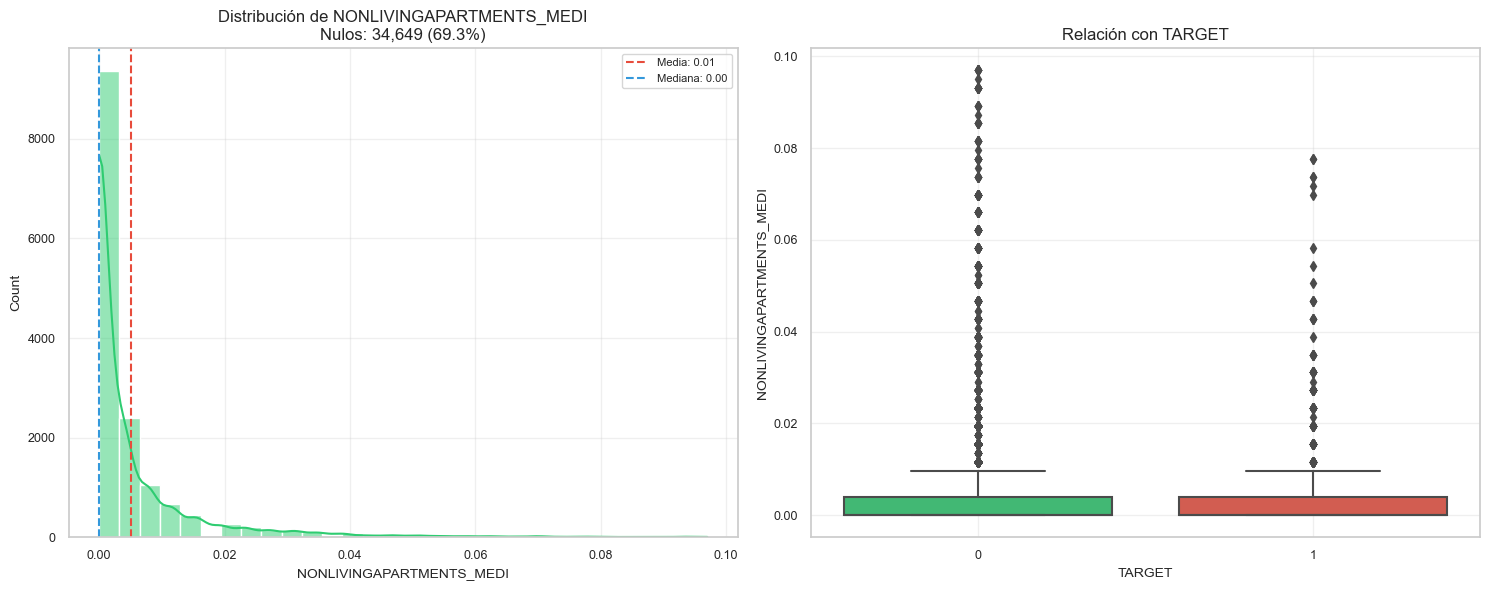


Limpiando memoria...

Procesando lote 3 de 41


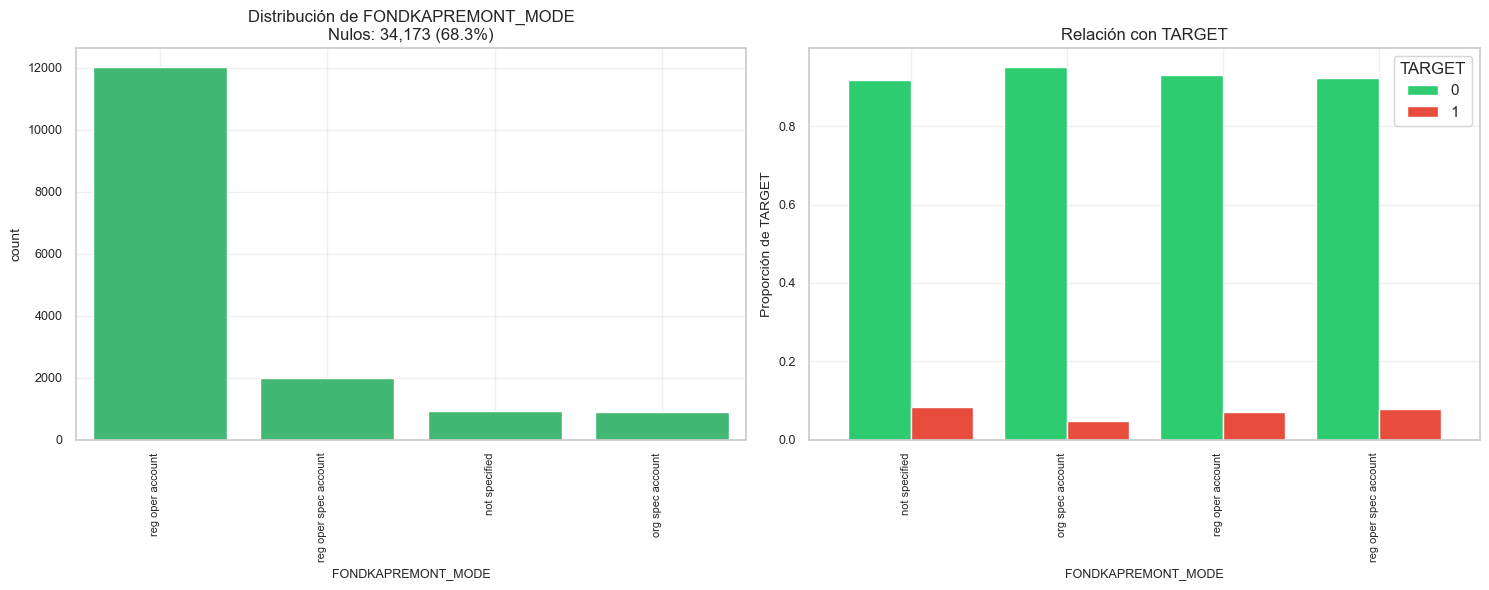

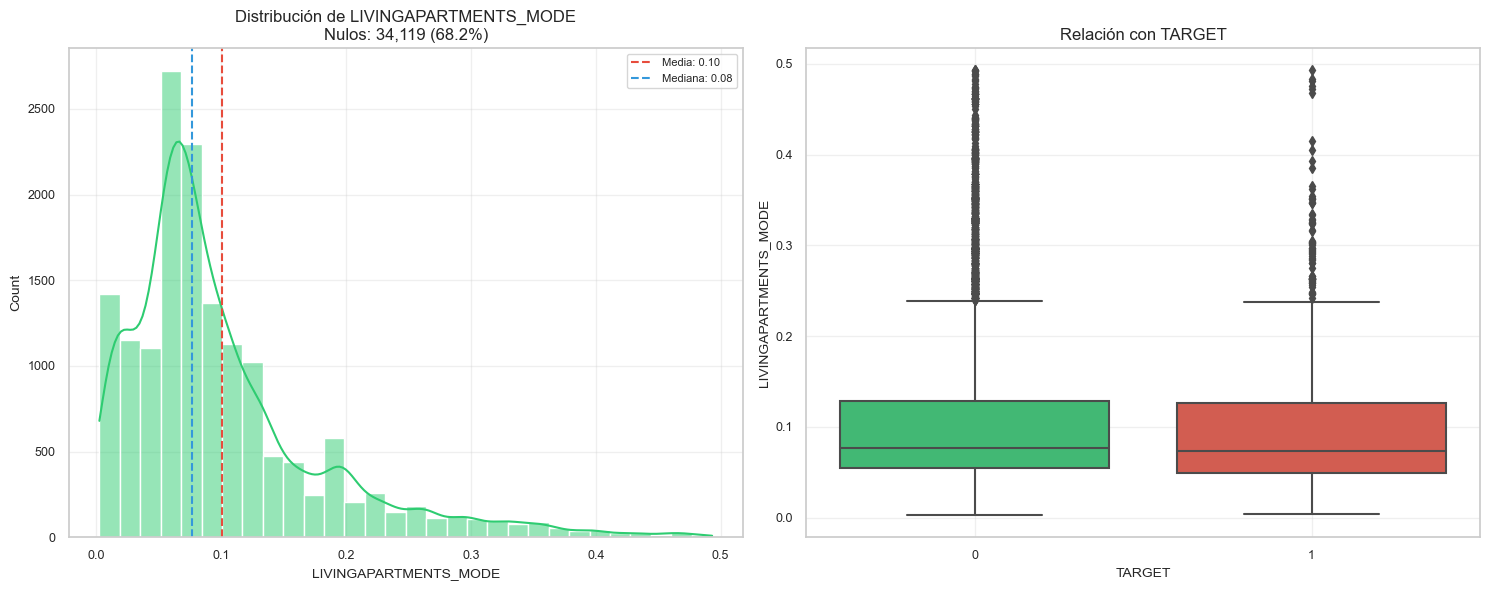

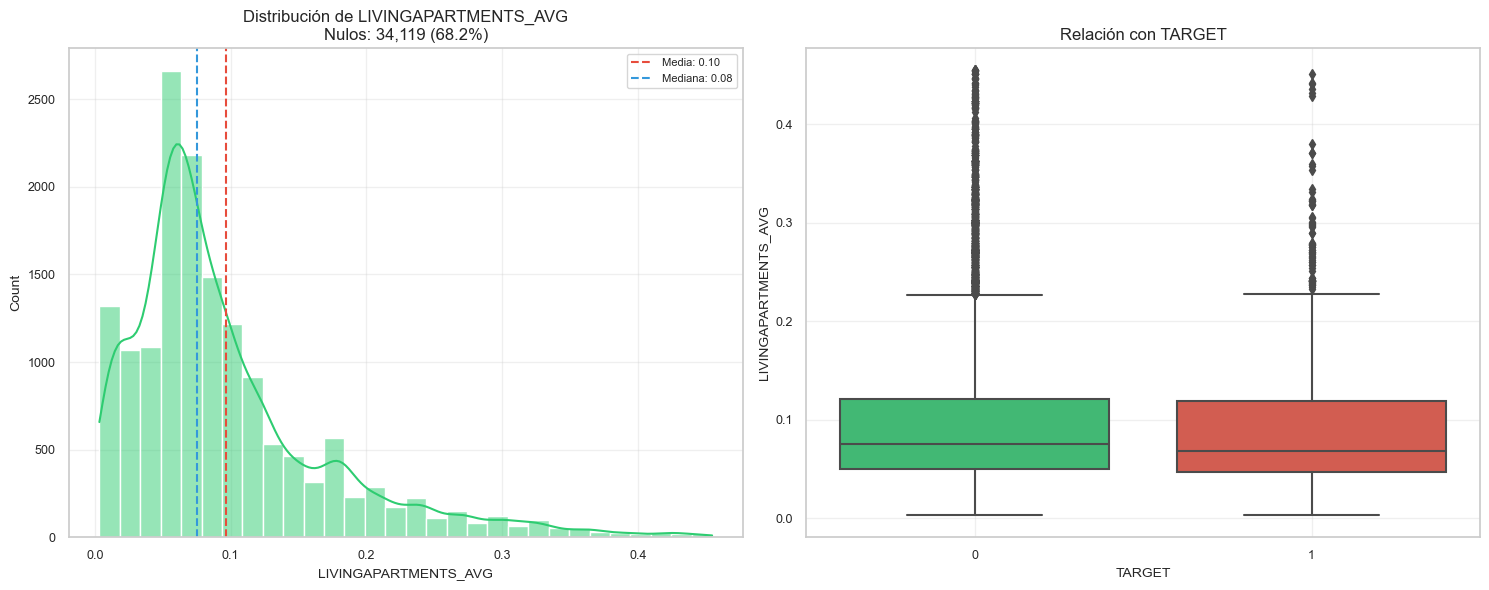


Limpiando memoria...

Procesando lote 4 de 41


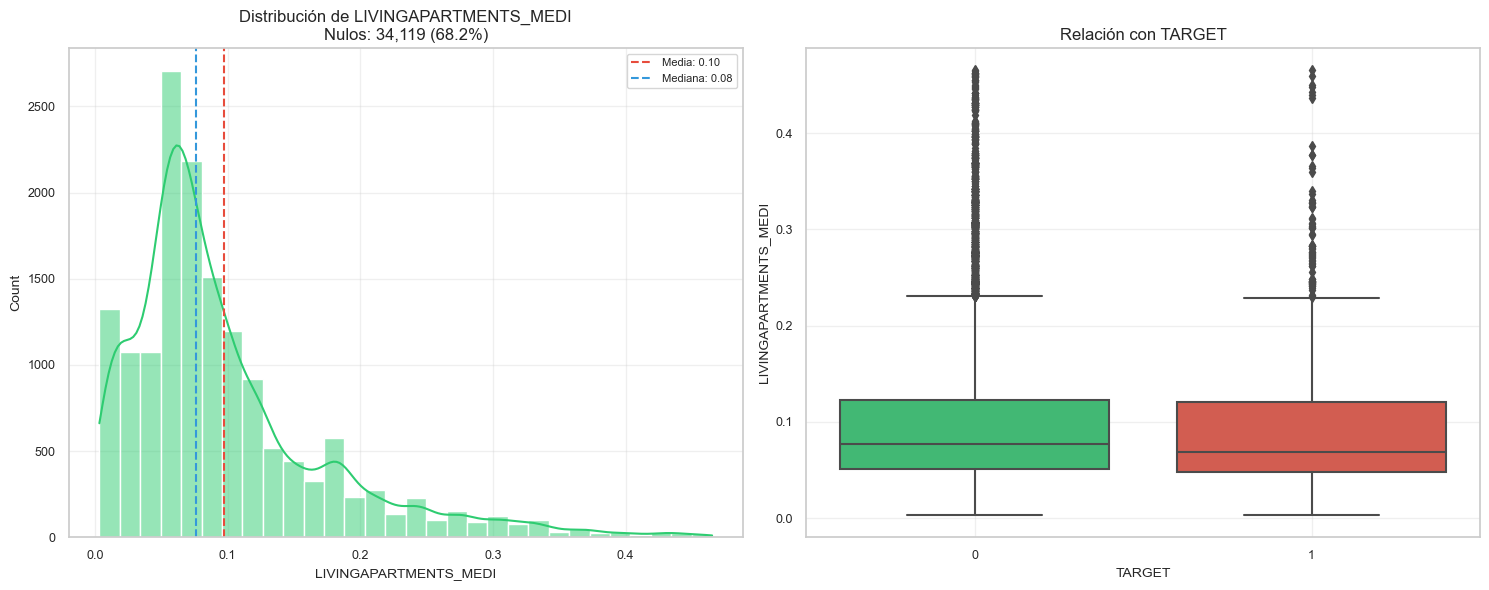

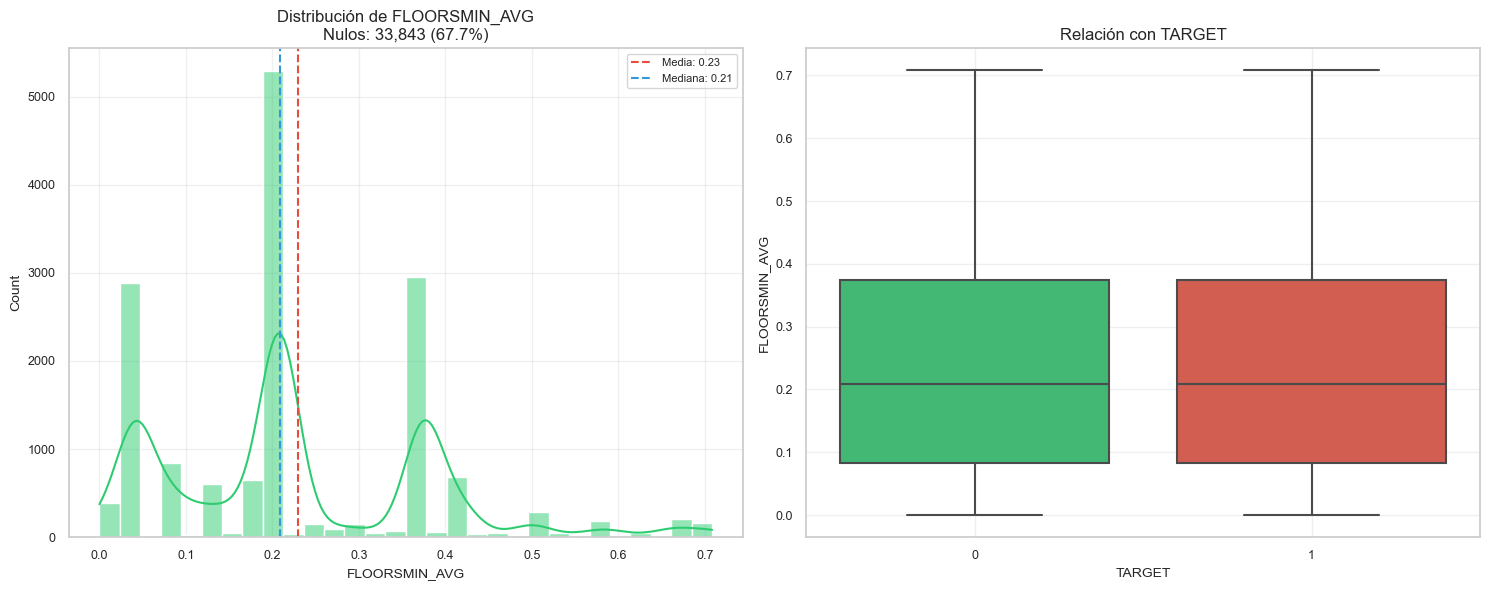

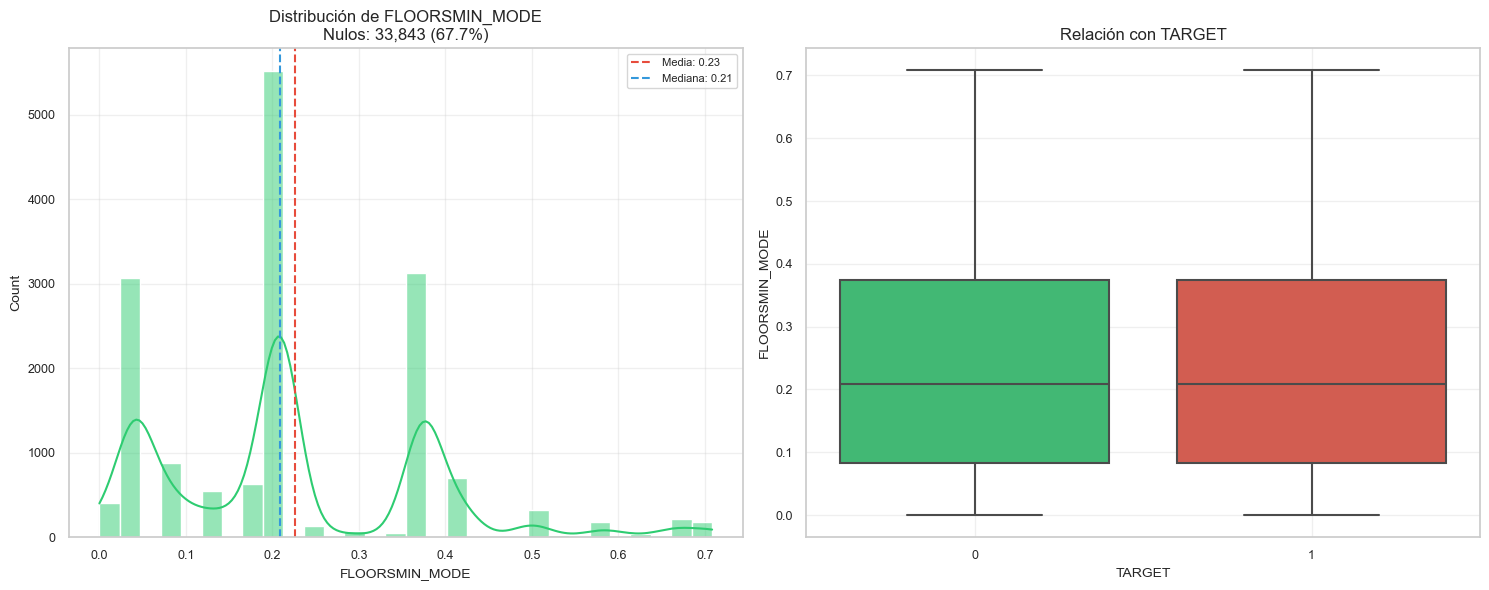


Limpiando memoria...

Procesando lote 5 de 41


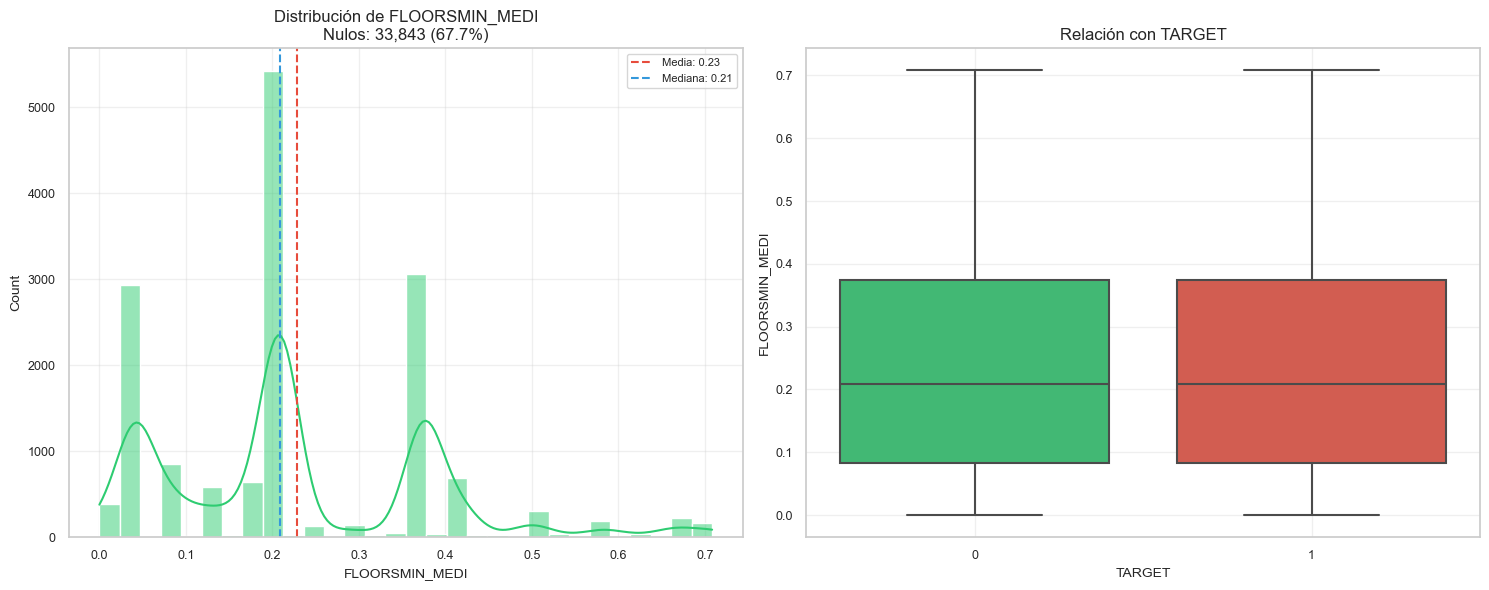

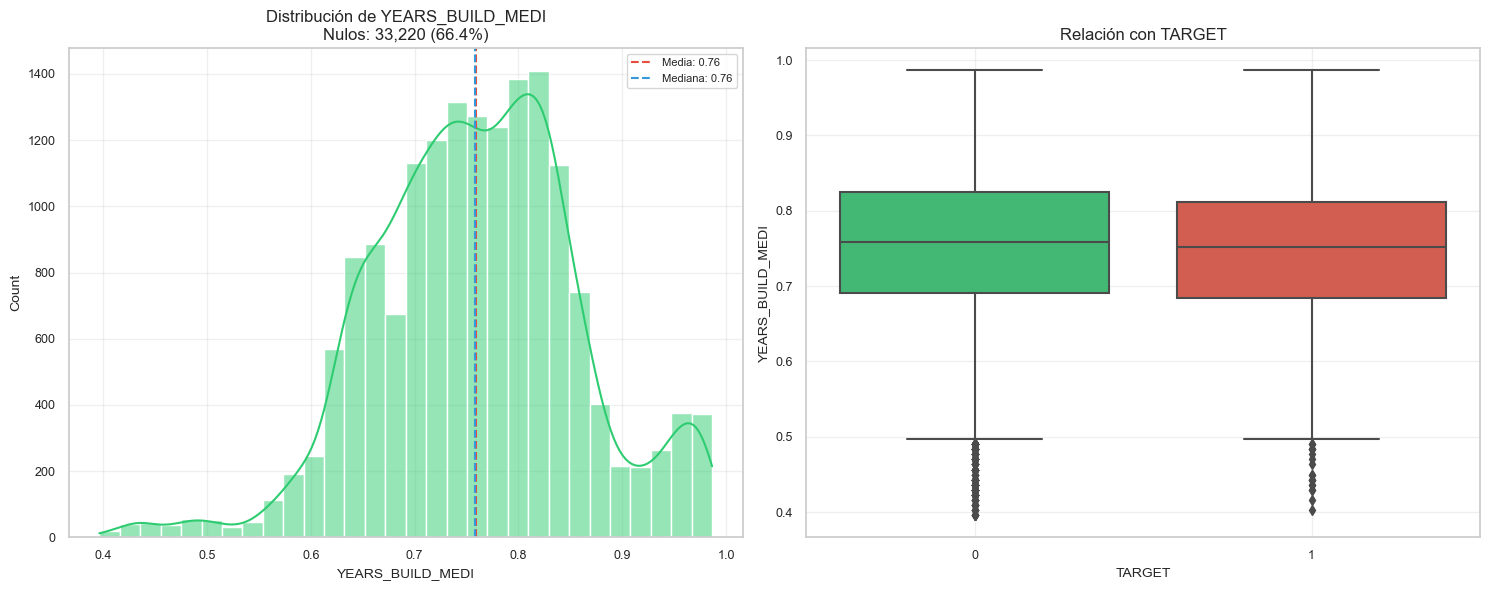

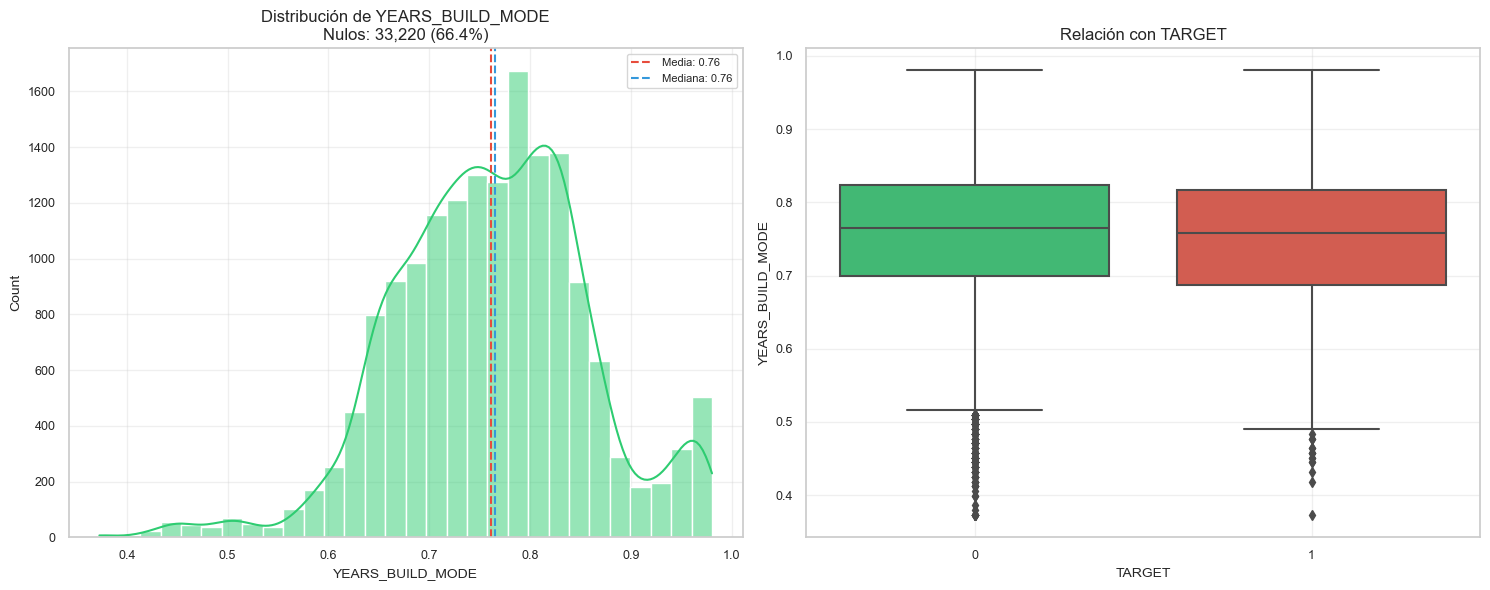


Limpiando memoria...

Procesando lote 6 de 41


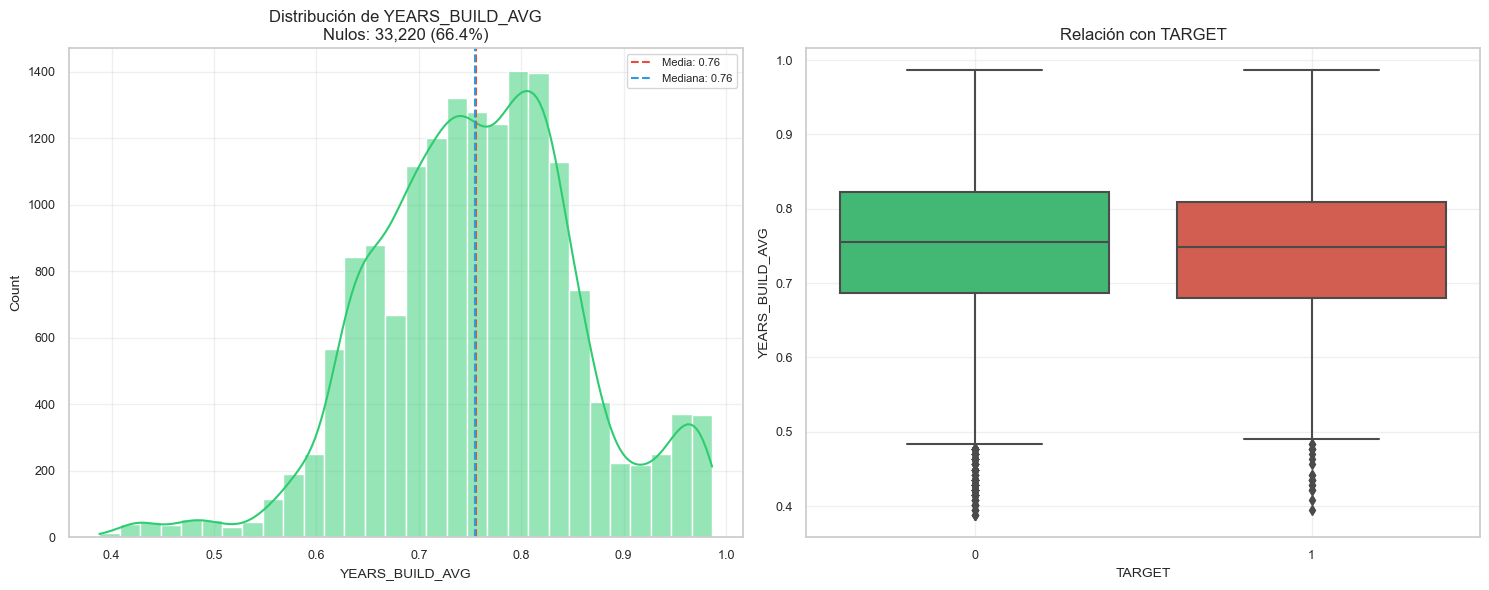

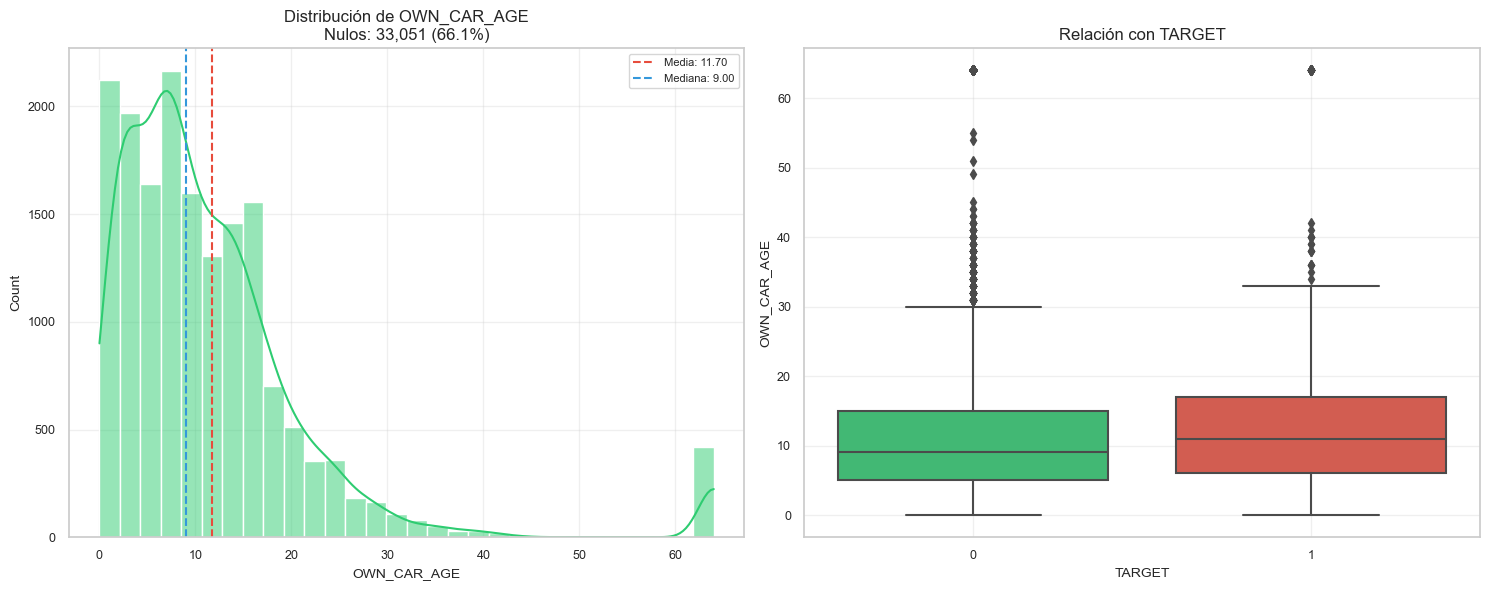

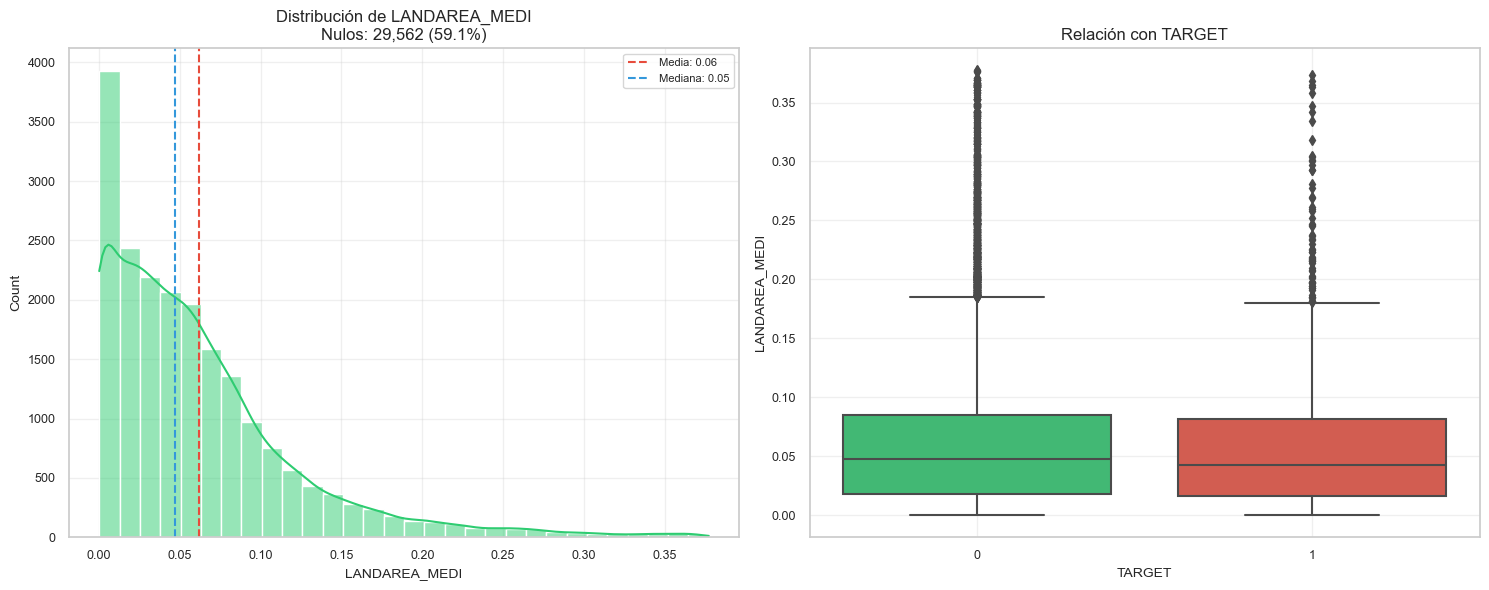


Limpiando memoria...

Procesando lote 7 de 41


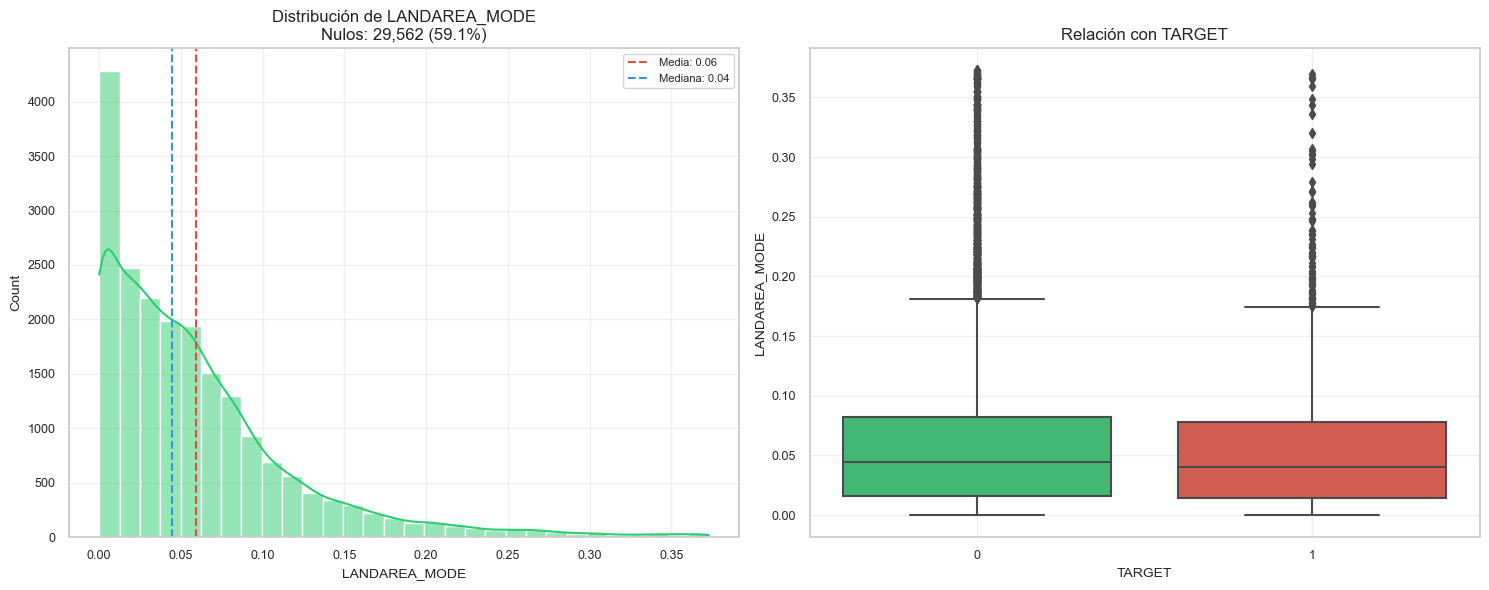

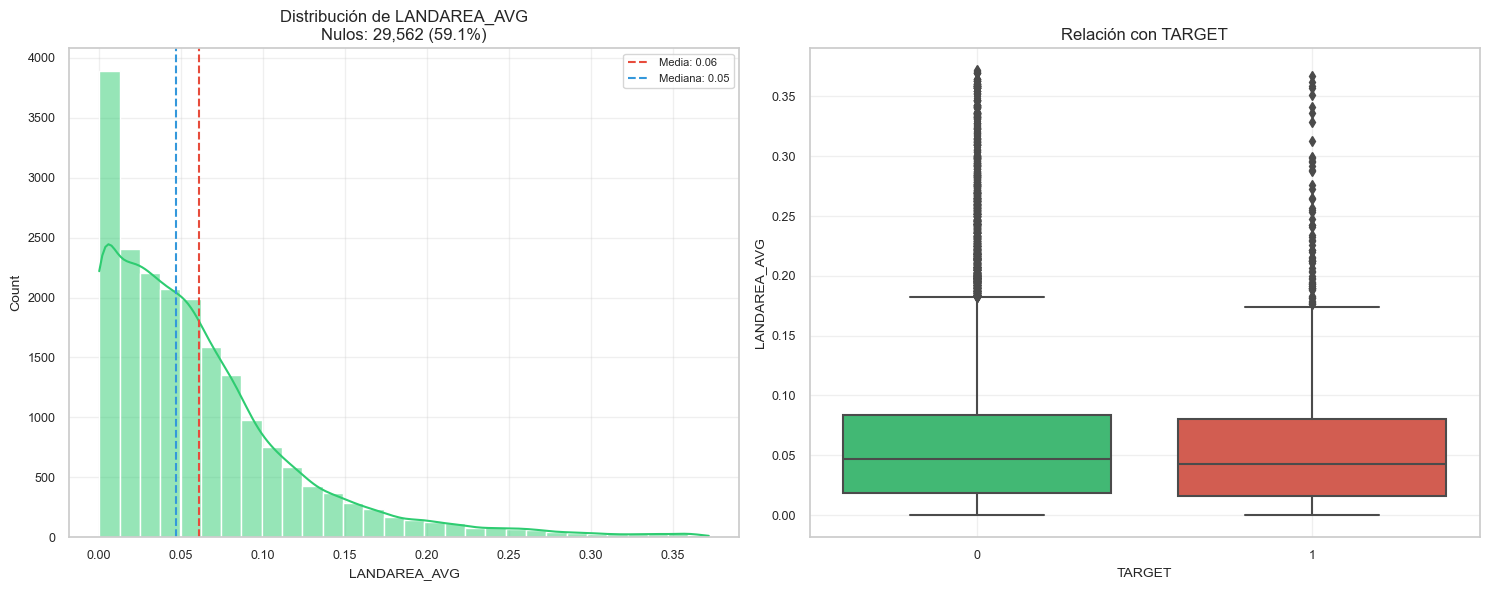

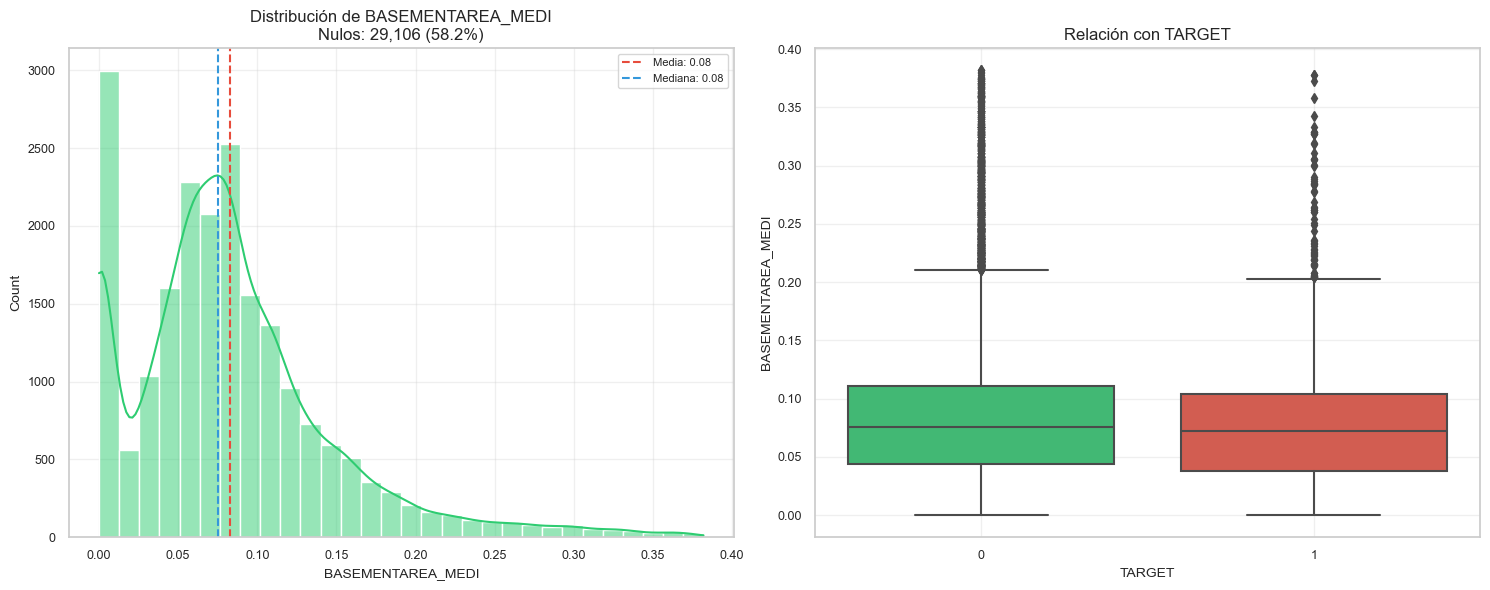


Limpiando memoria...

Procesando lote 8 de 41


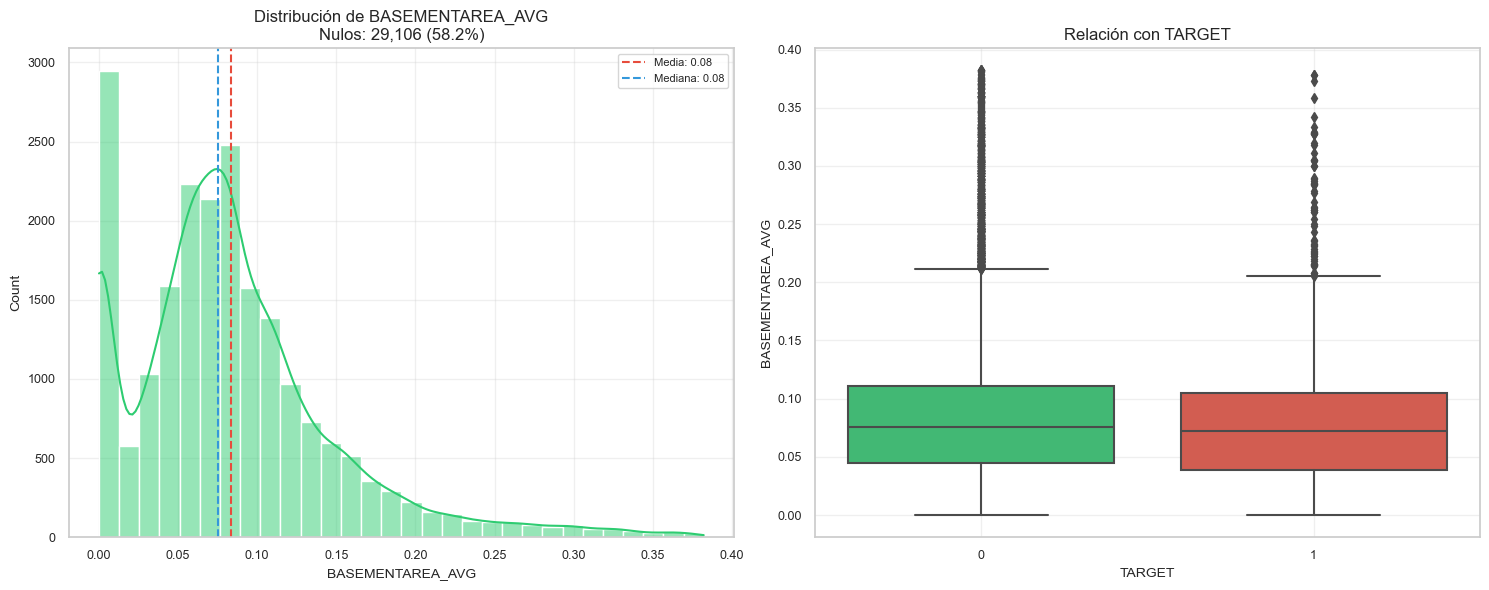

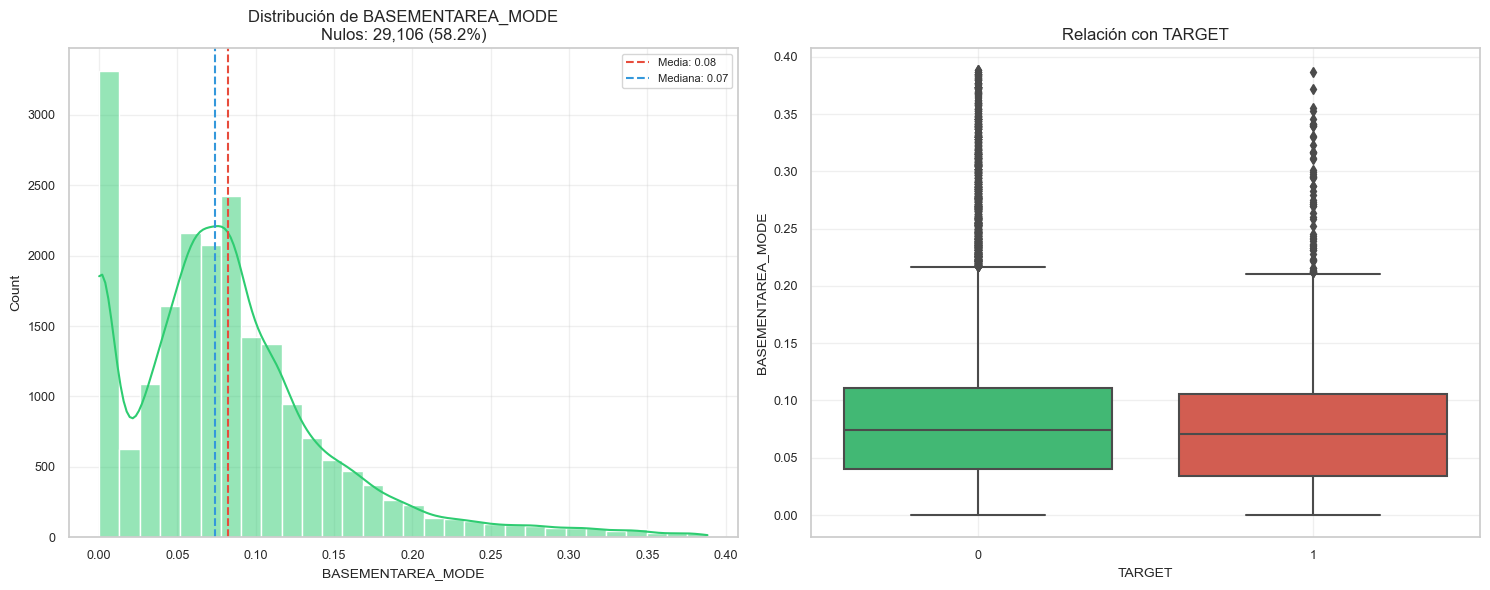

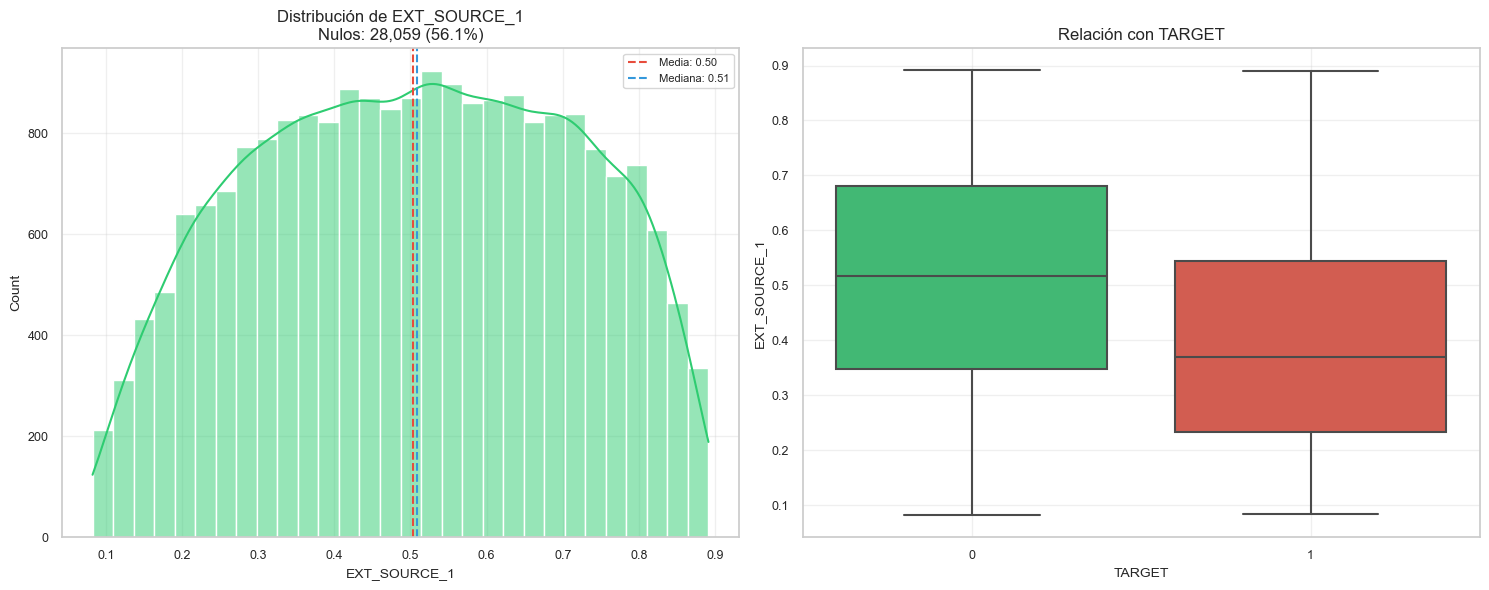


Limpiando memoria...

Procesando lote 9 de 41


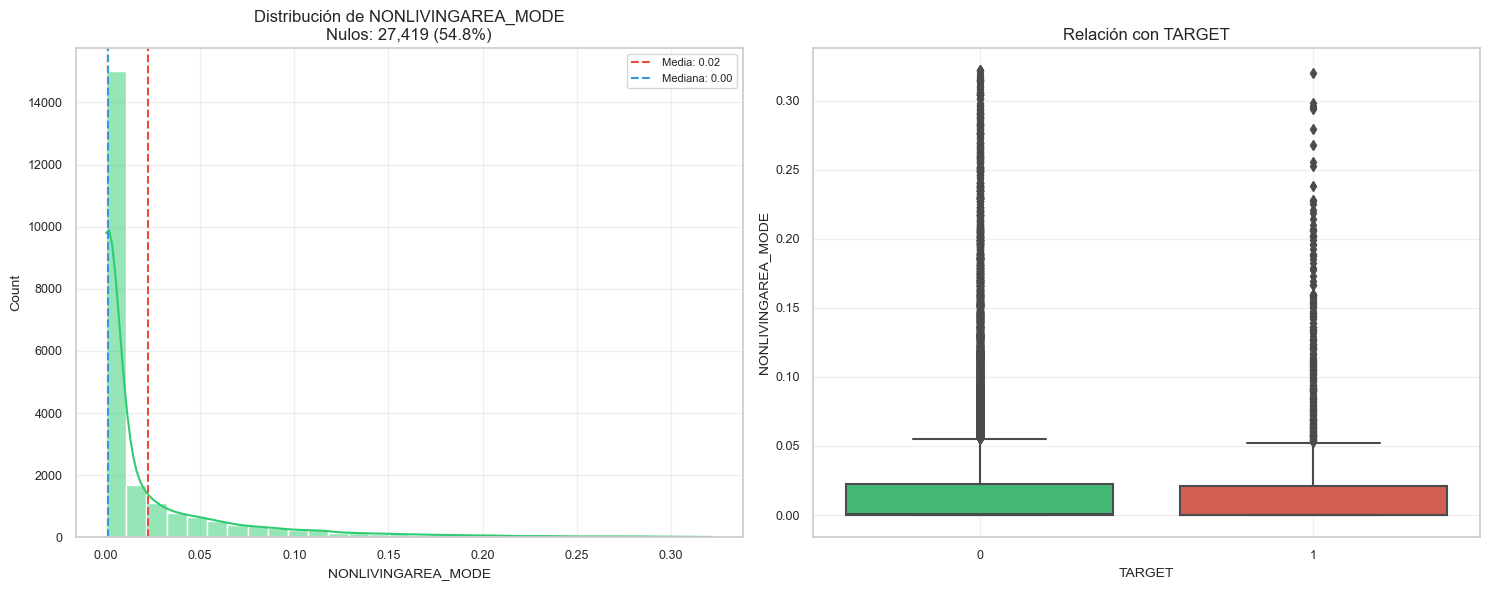

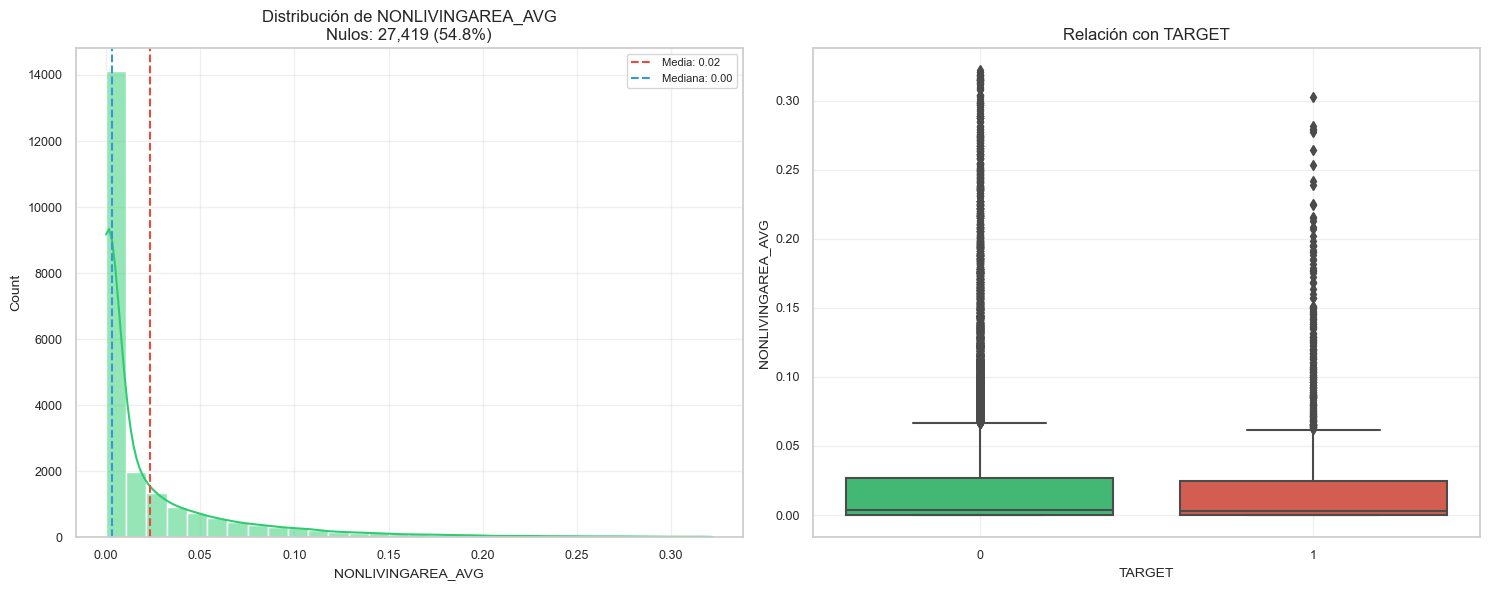

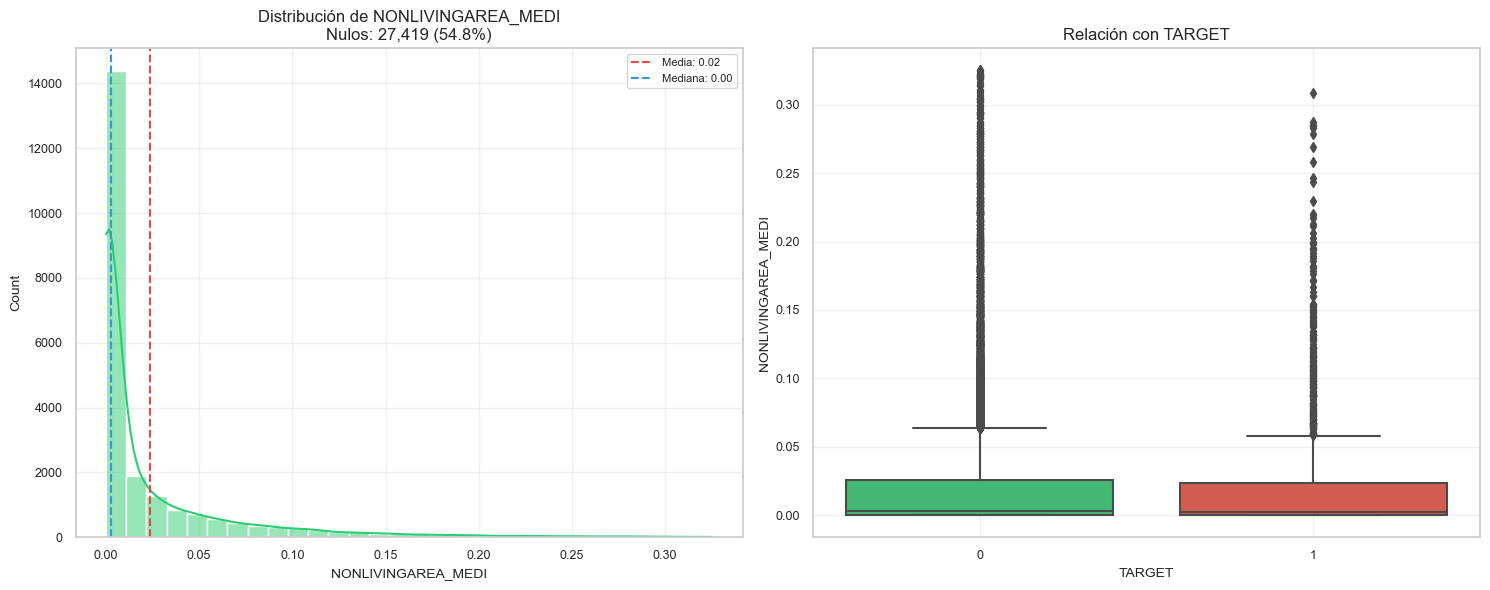


Procesando lote 10 de 41


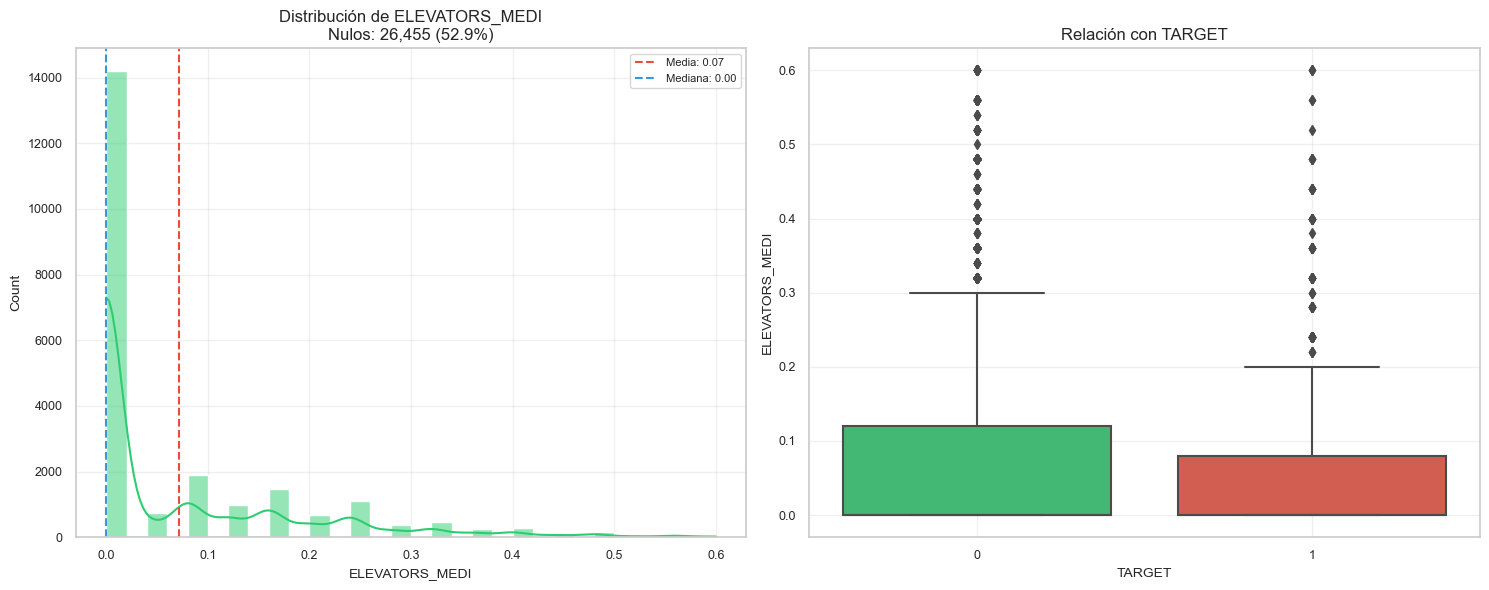

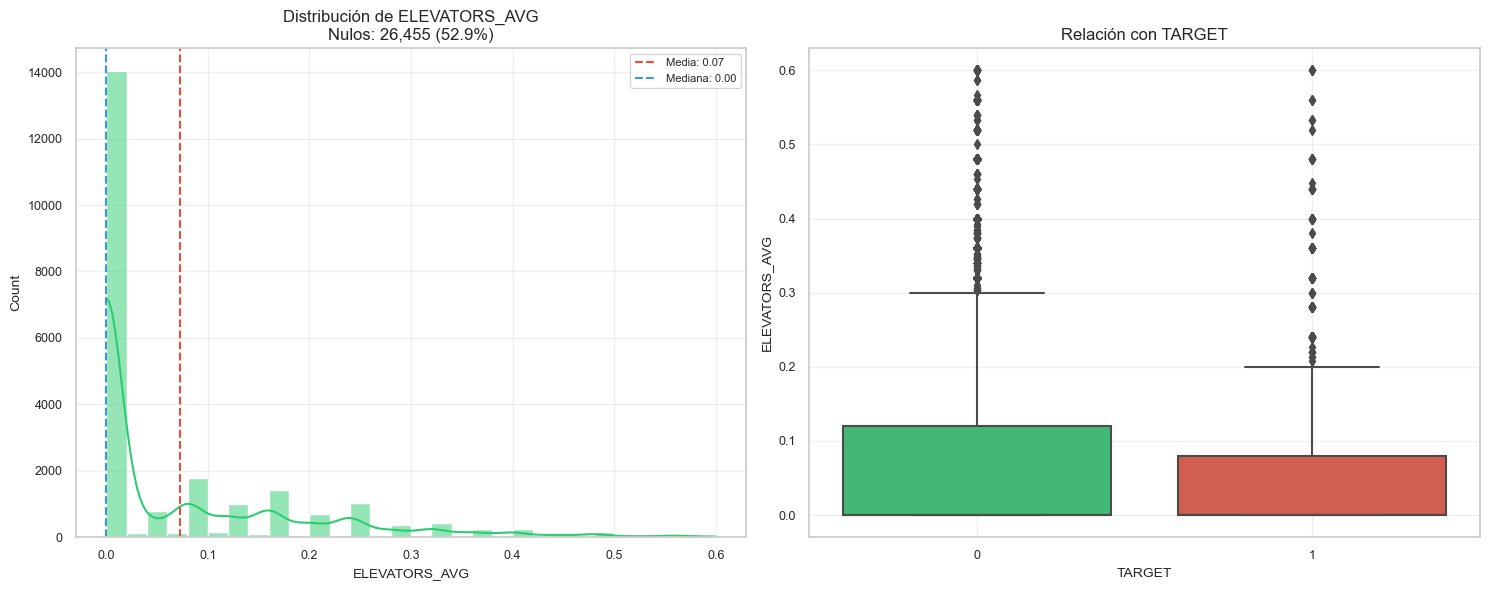

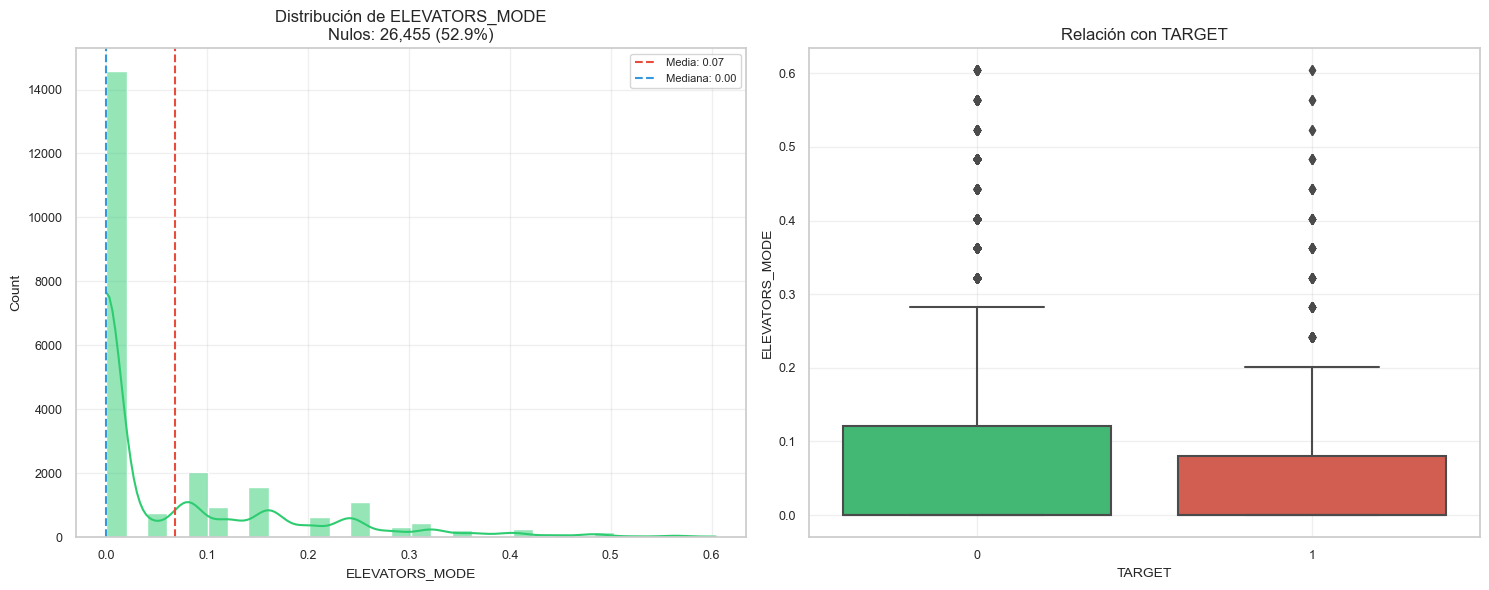


Procesando lote 11 de 41


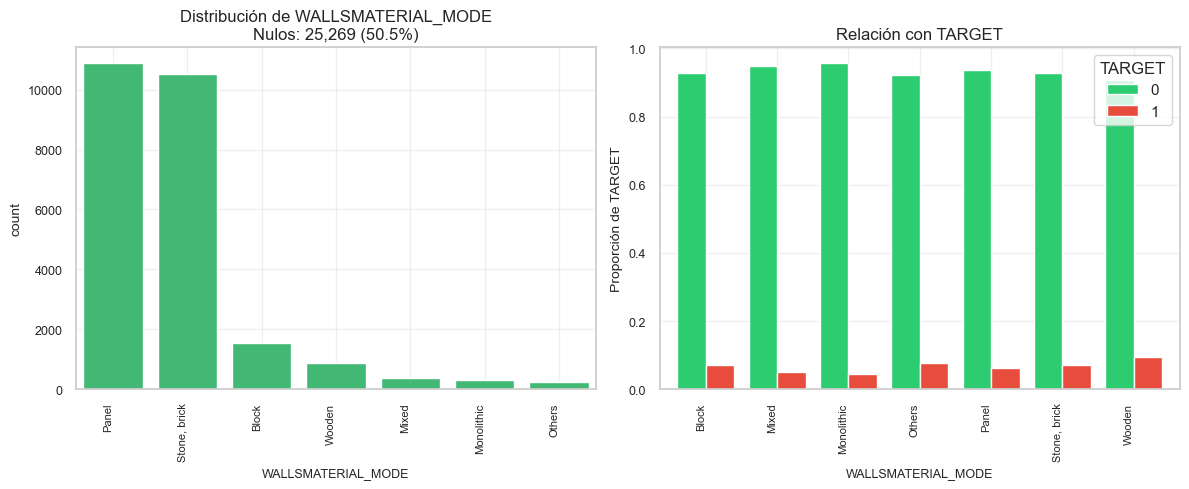

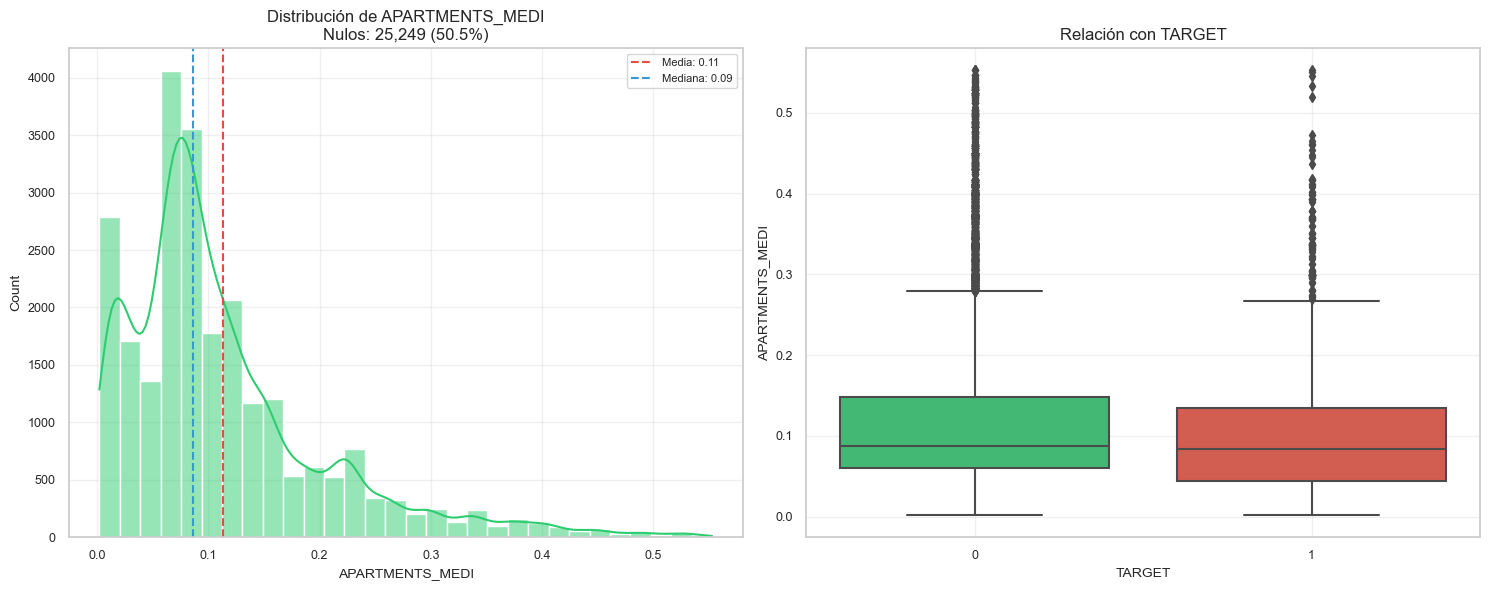

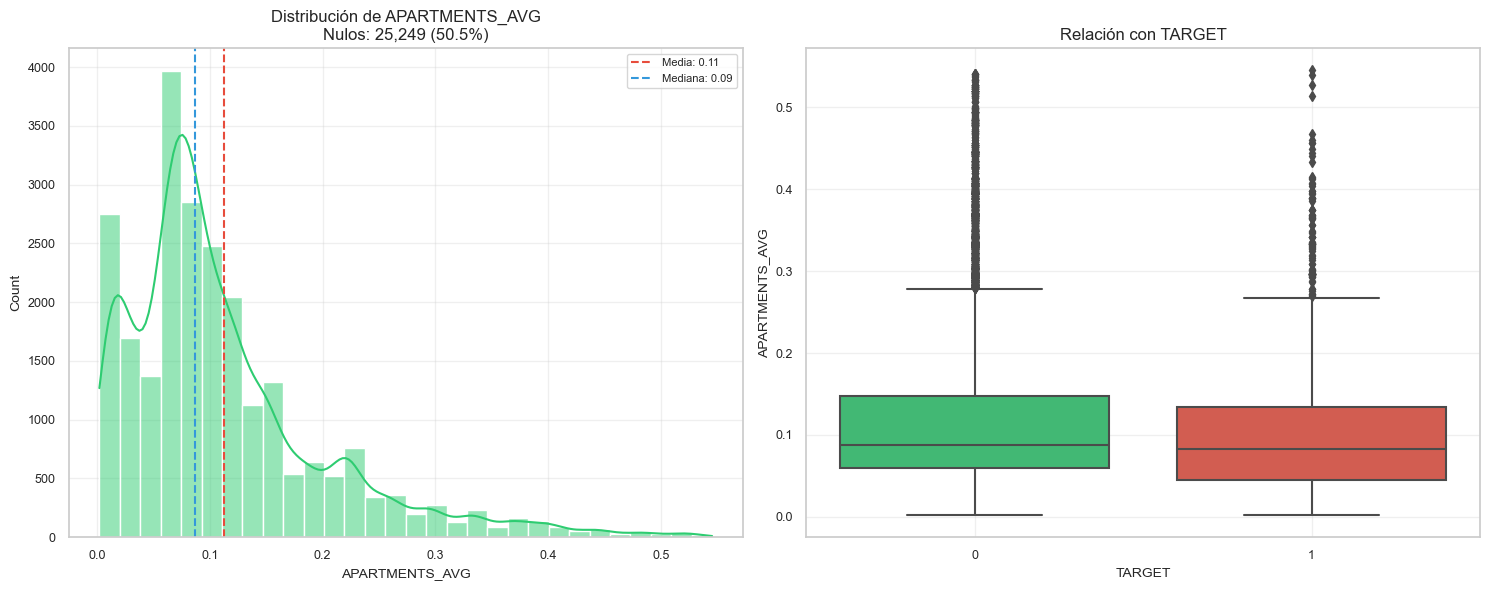


Procesando lote 12 de 41


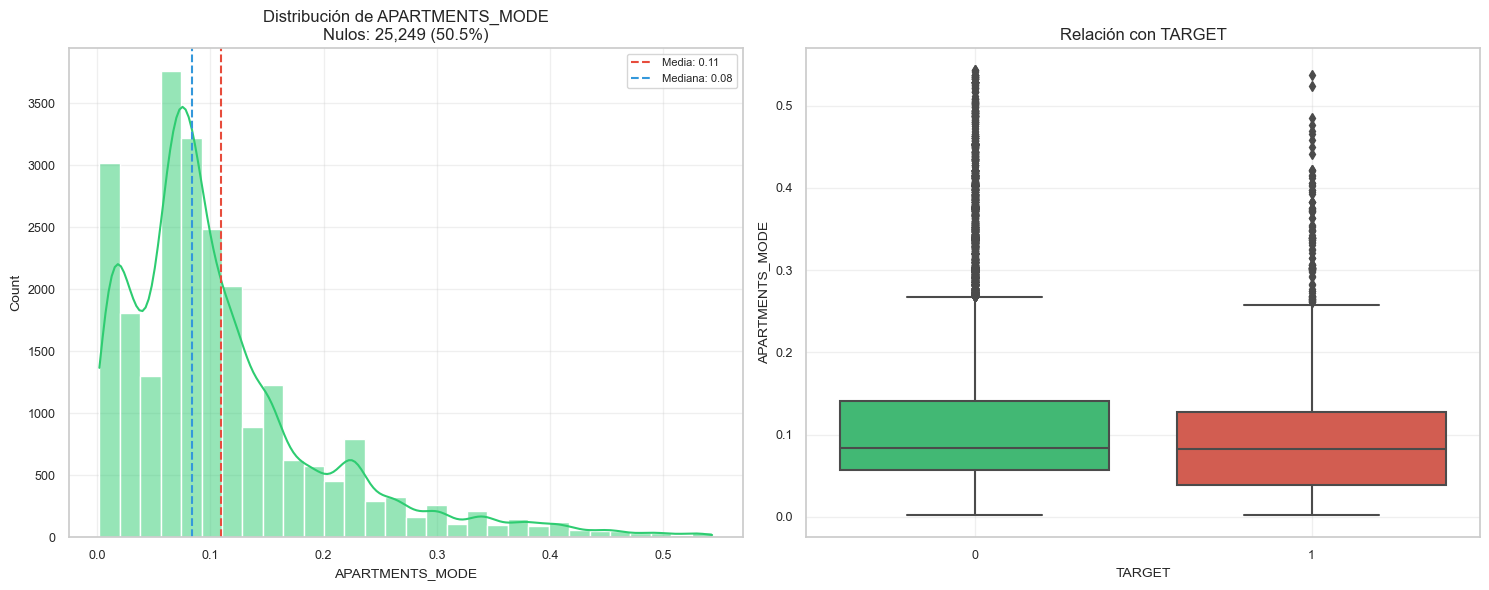

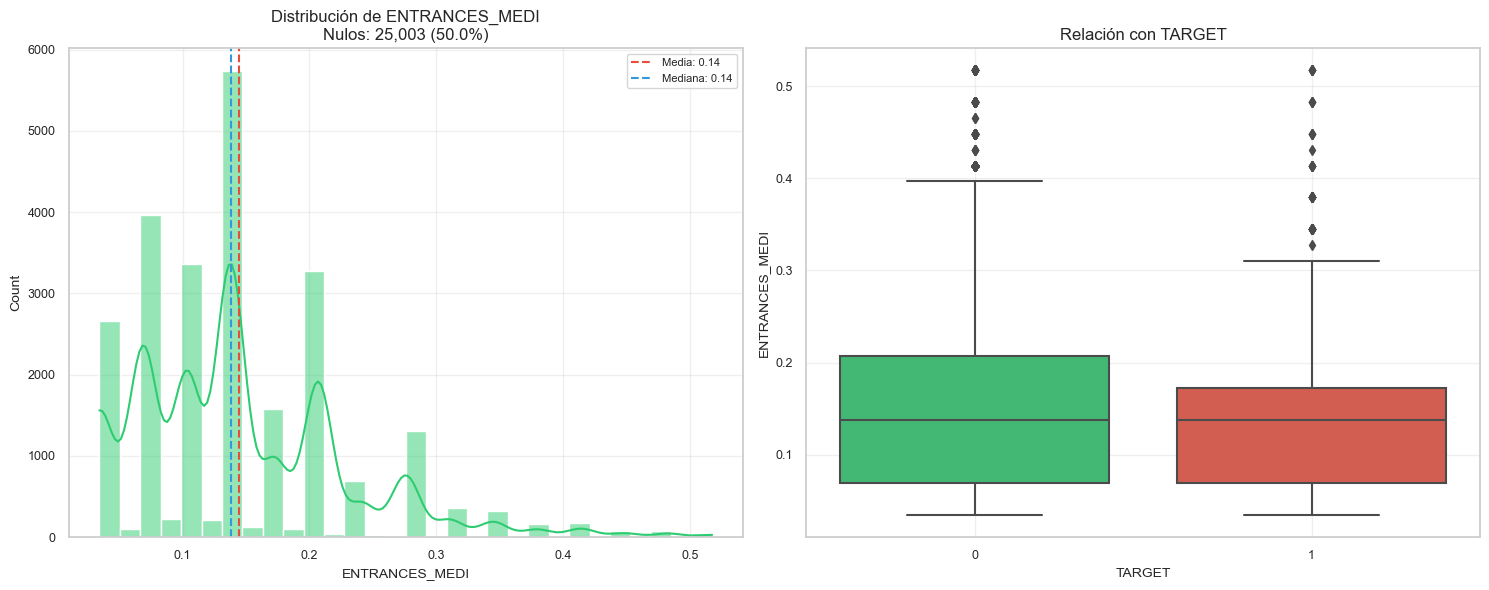

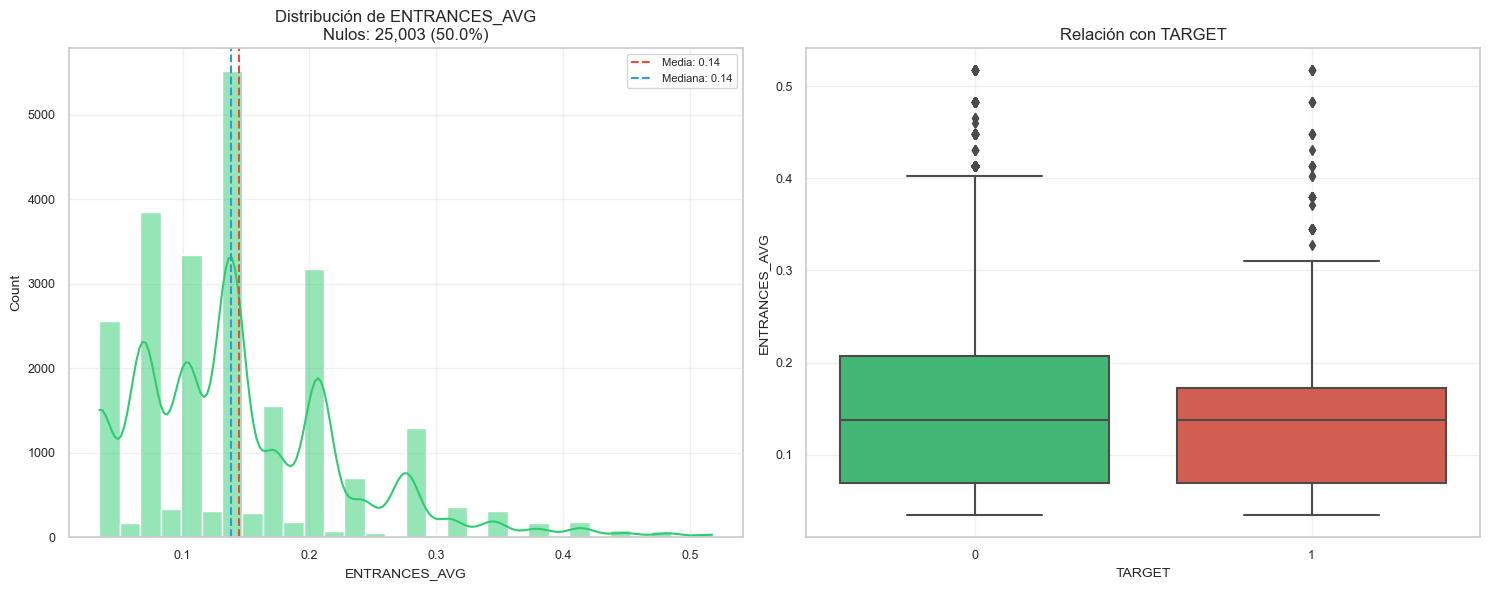


Procesando lote 13 de 41


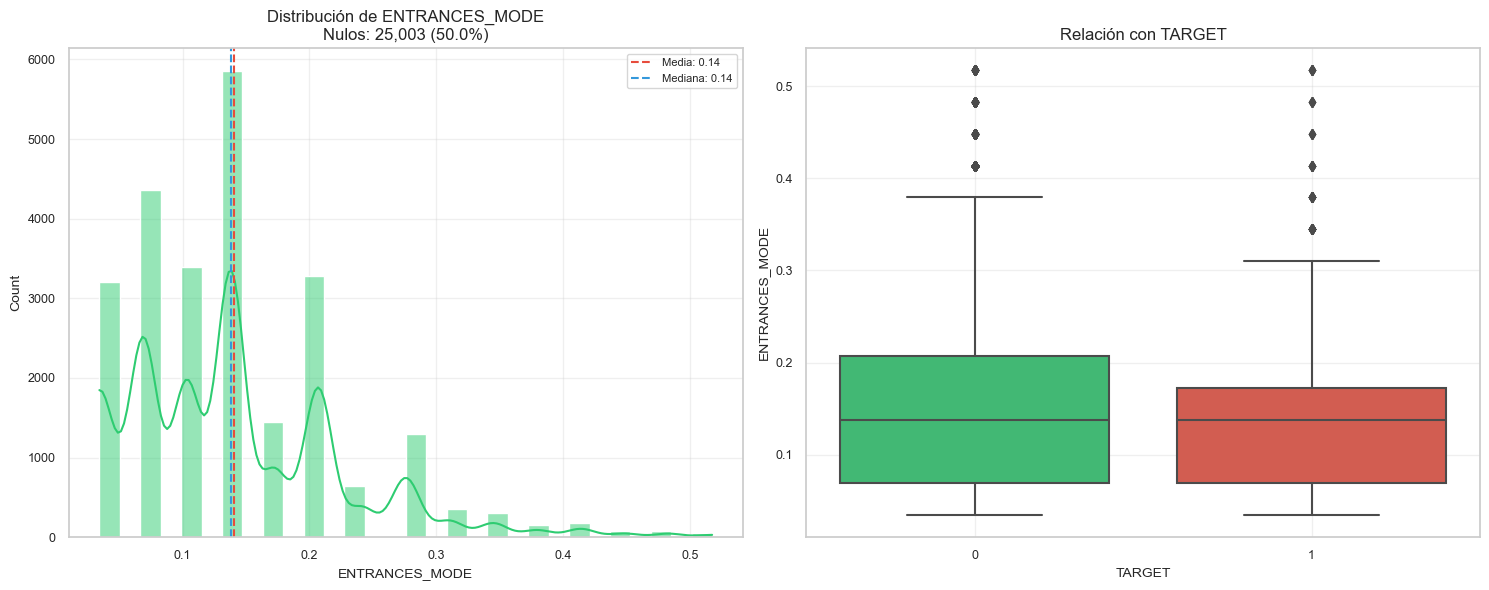

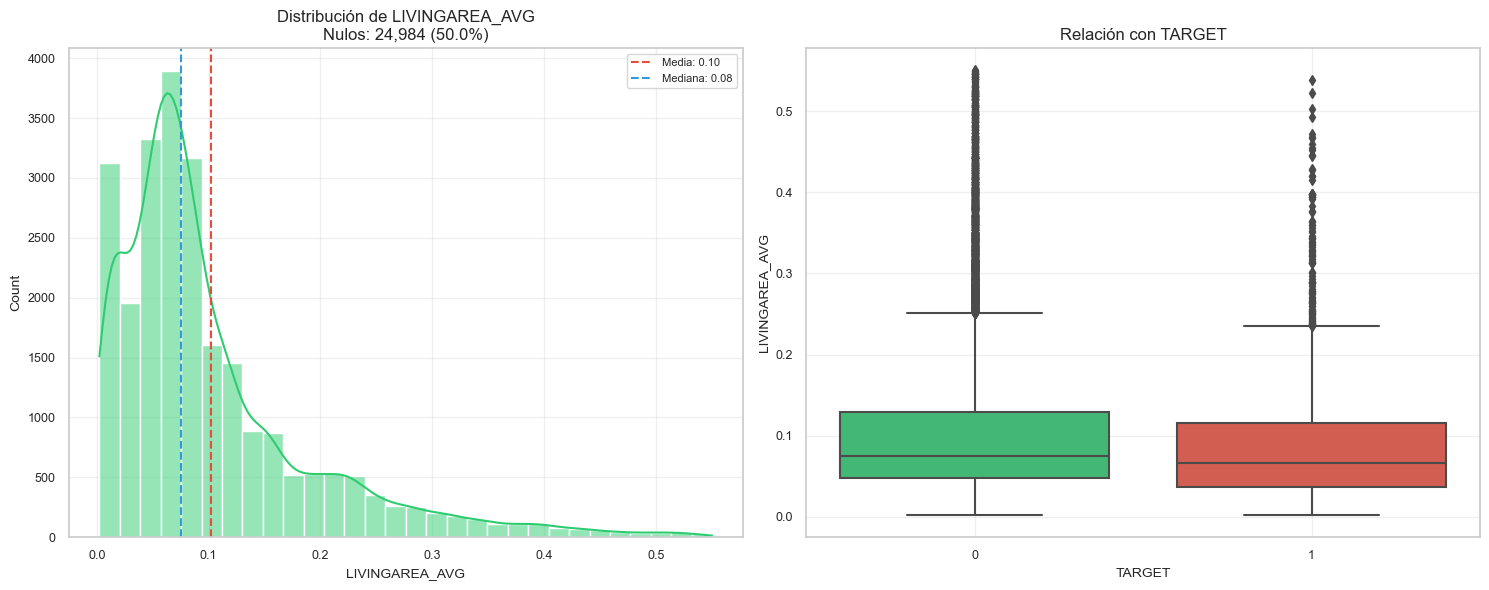

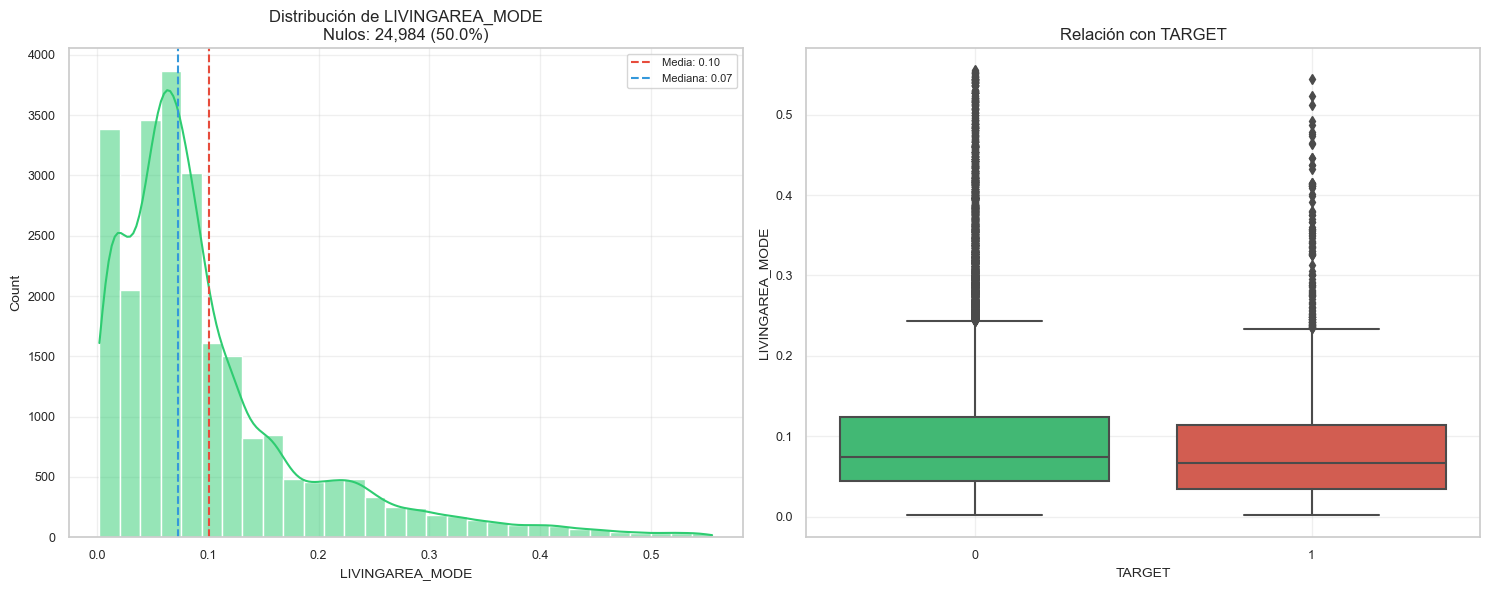


Procesando lote 14 de 41


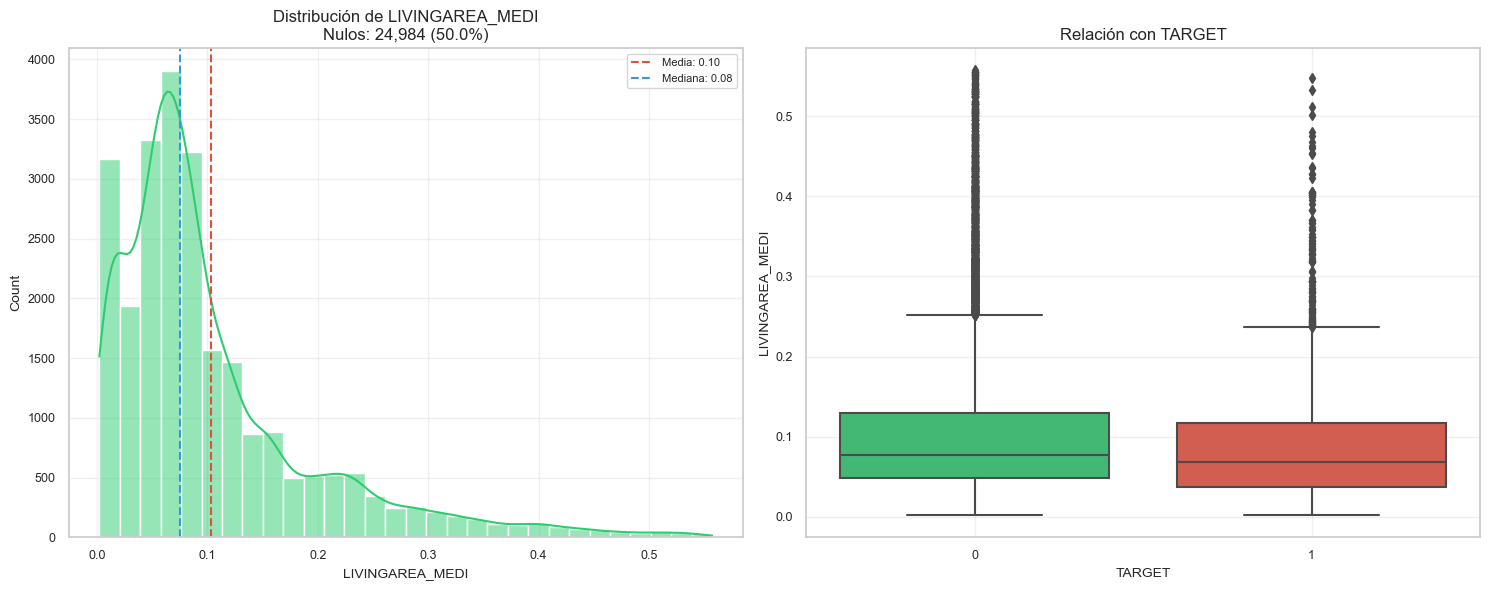

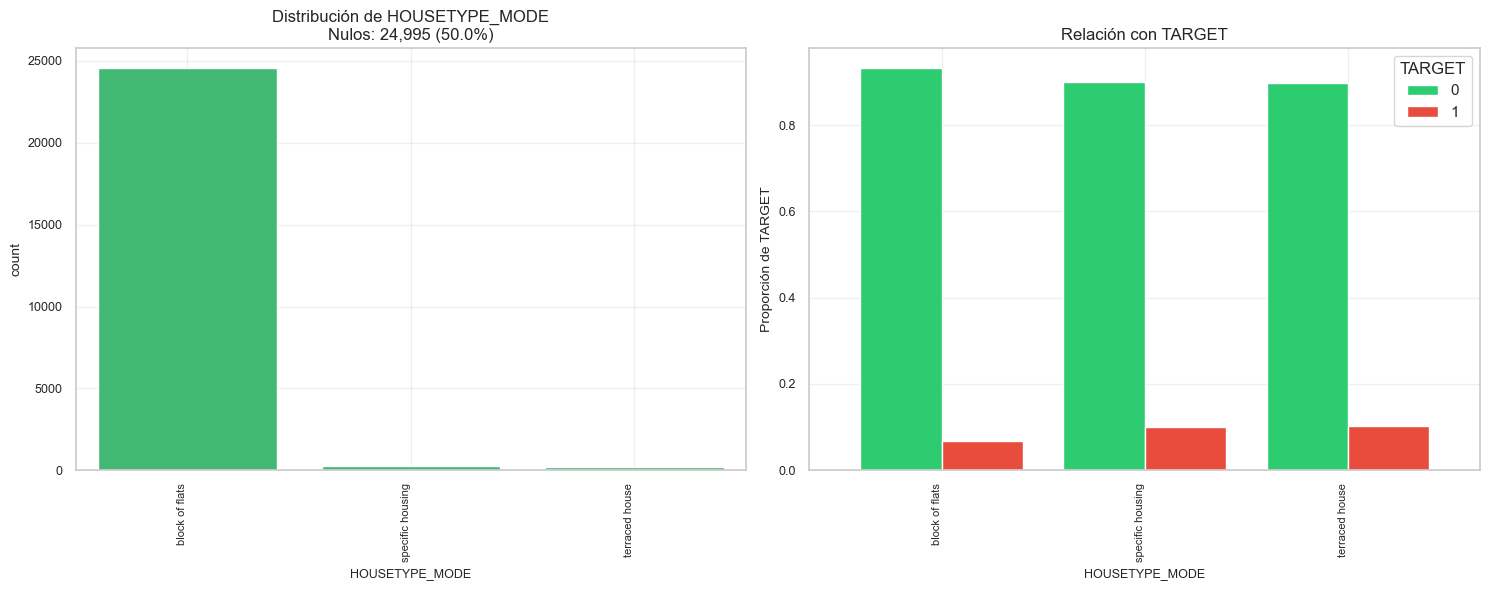

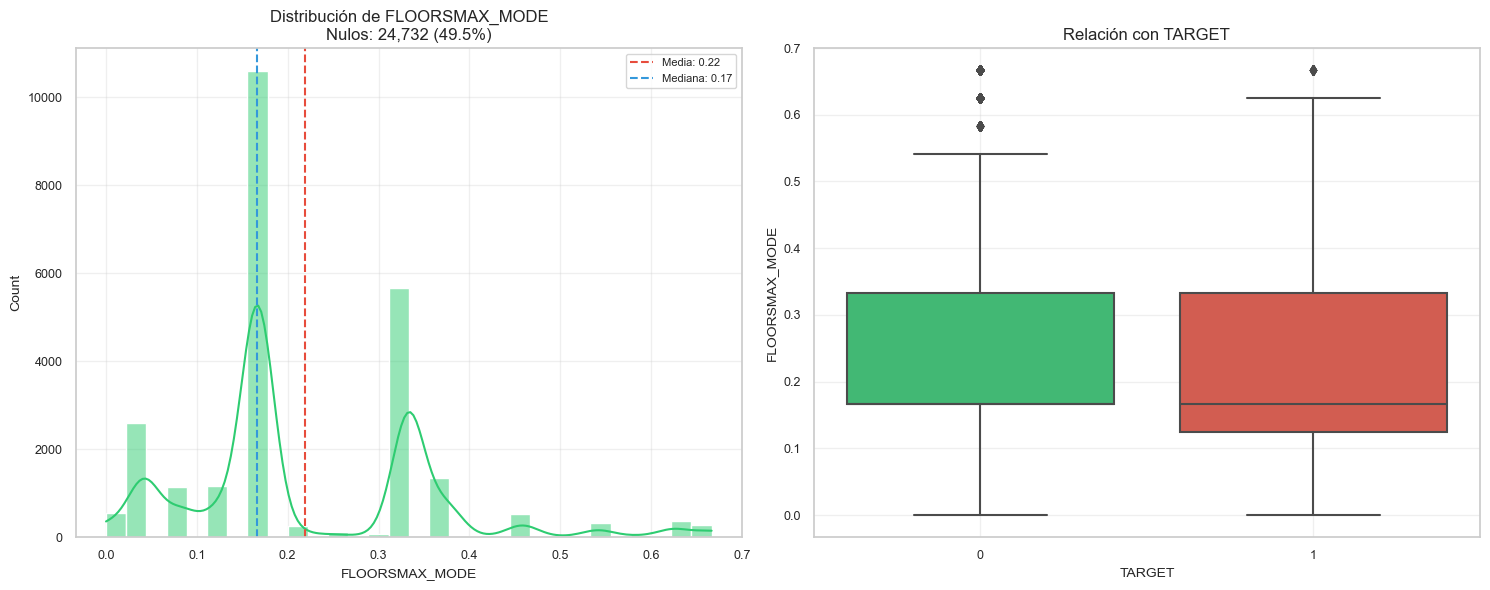


Procesando lote 15 de 41


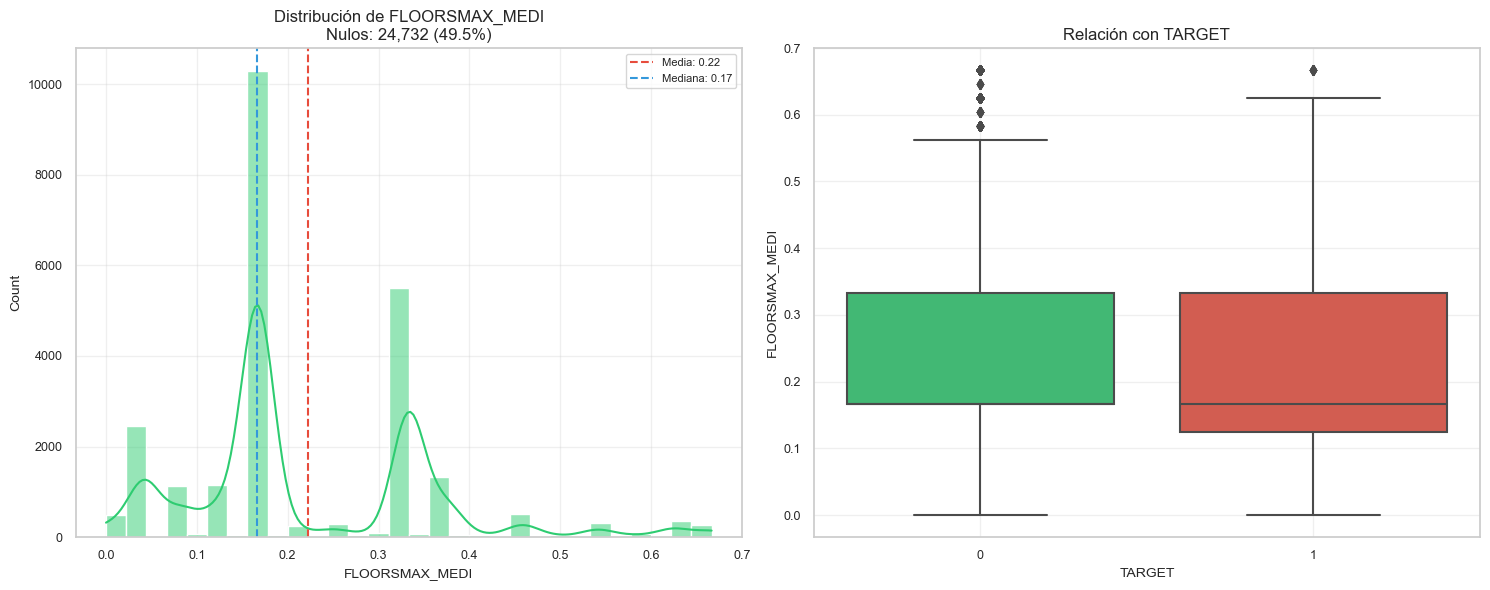

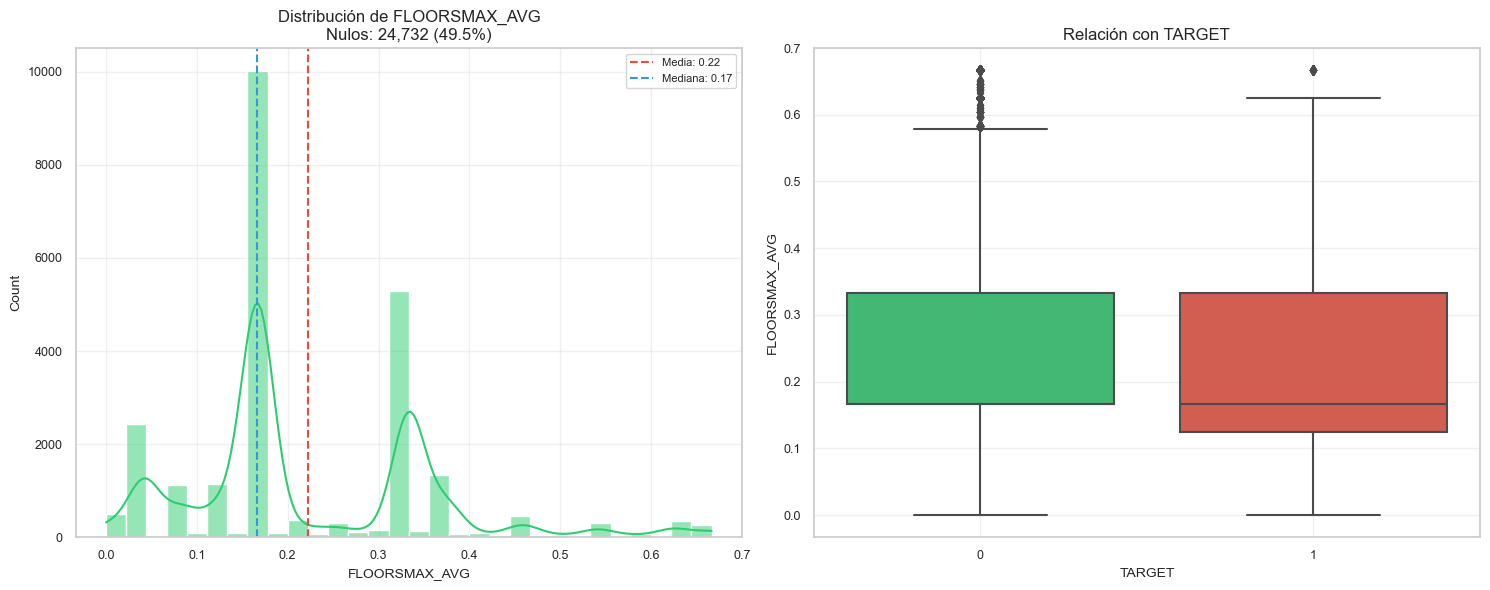

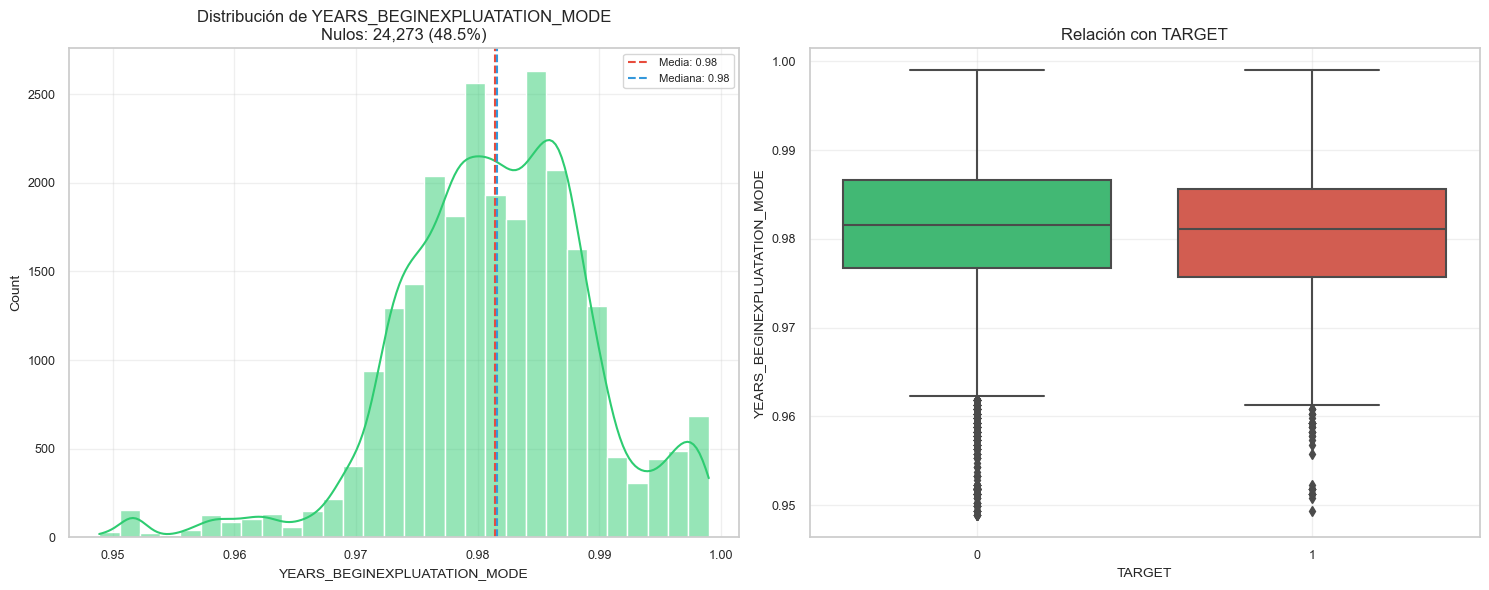


Procesando lote 16 de 41


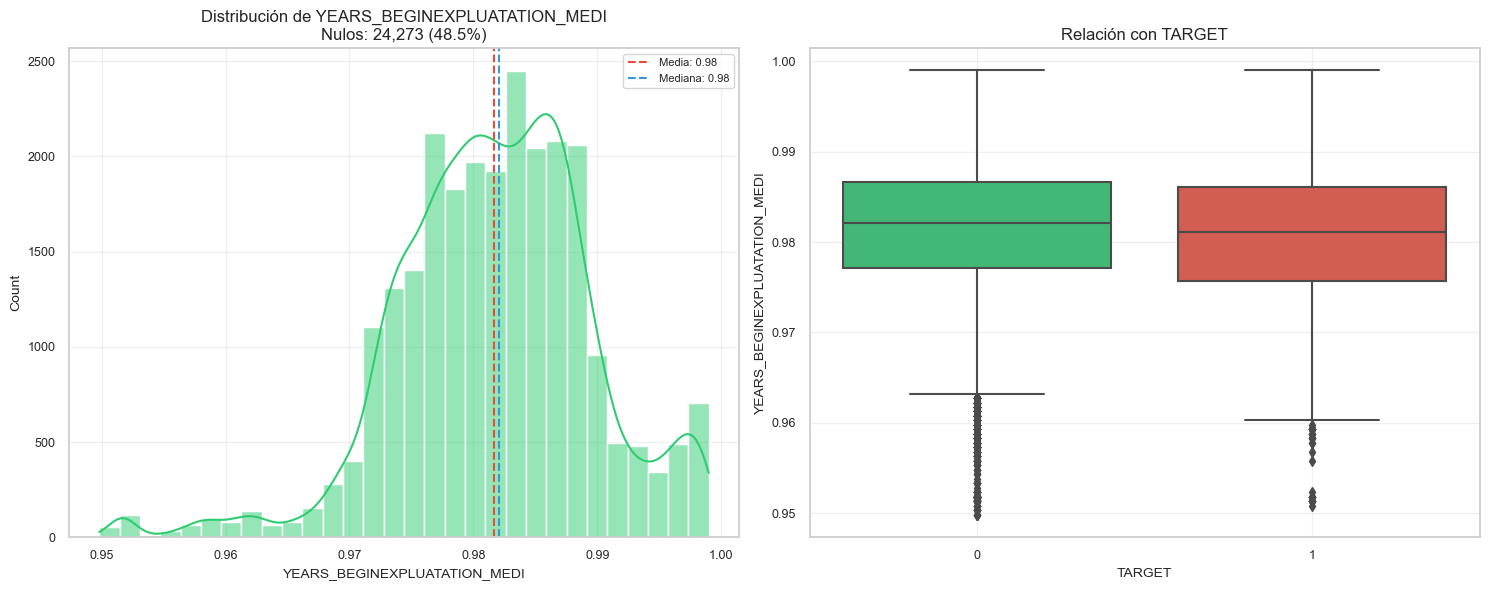

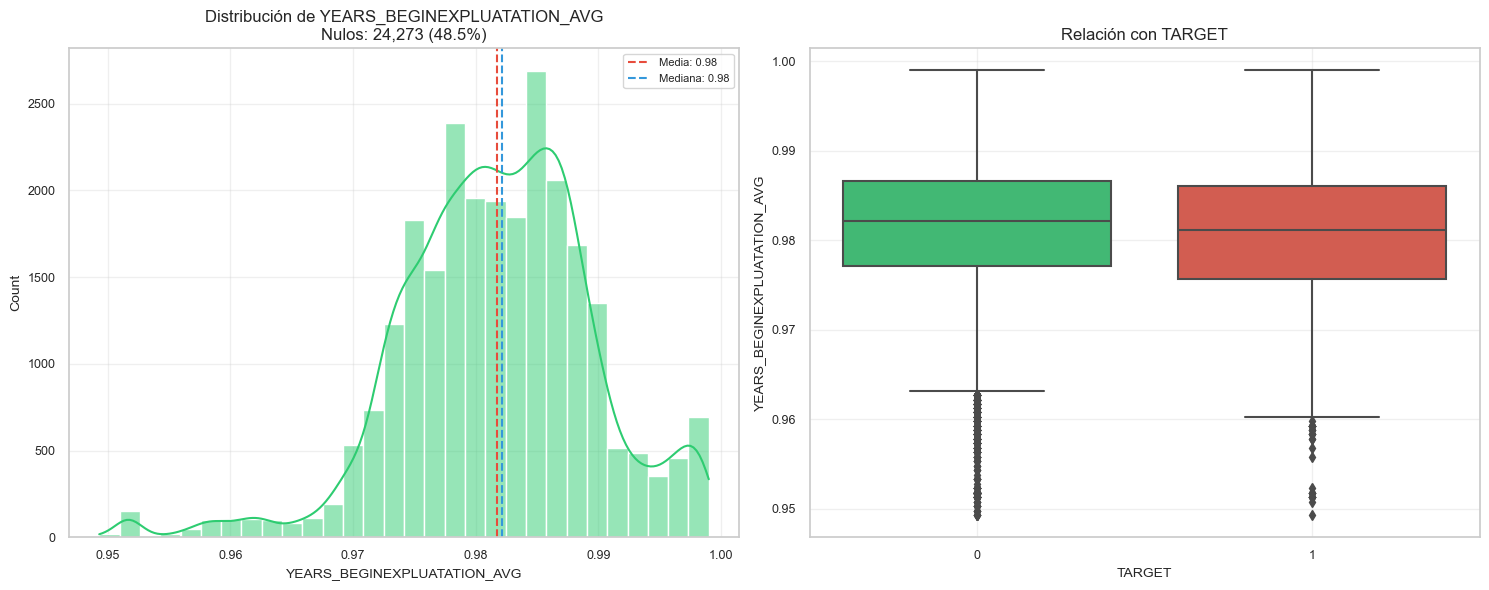

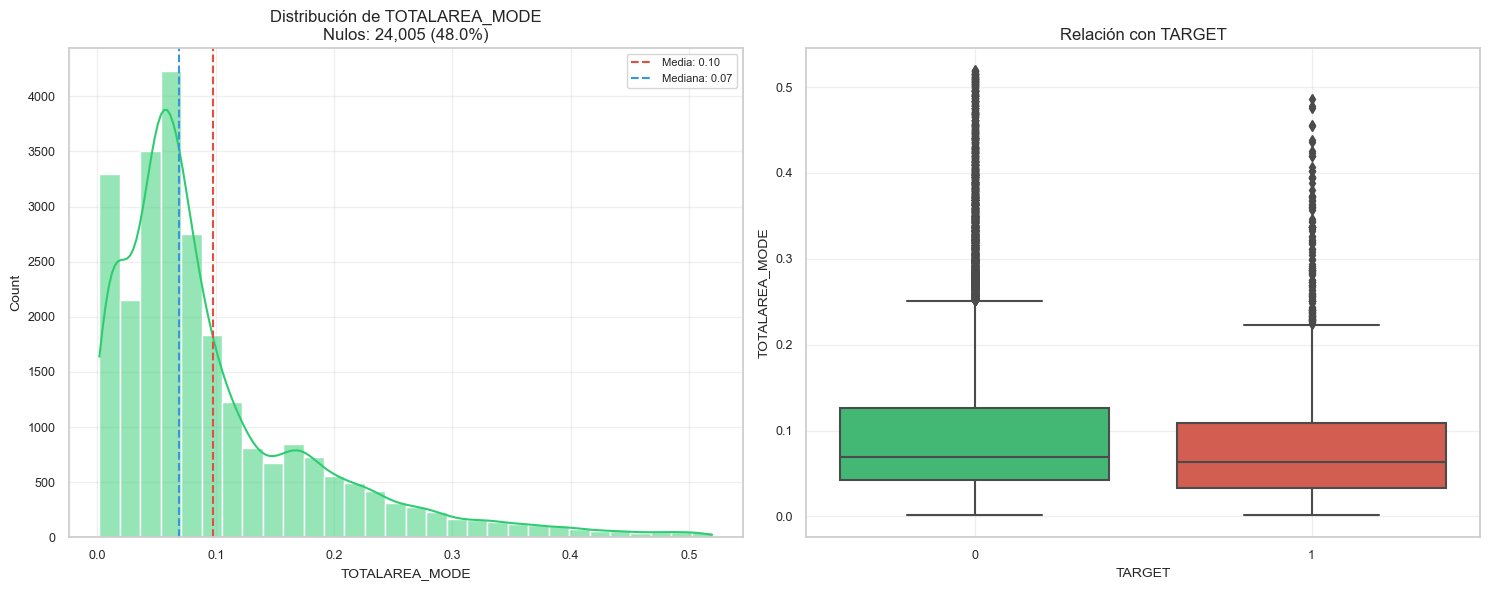


Procesando lote 17 de 41


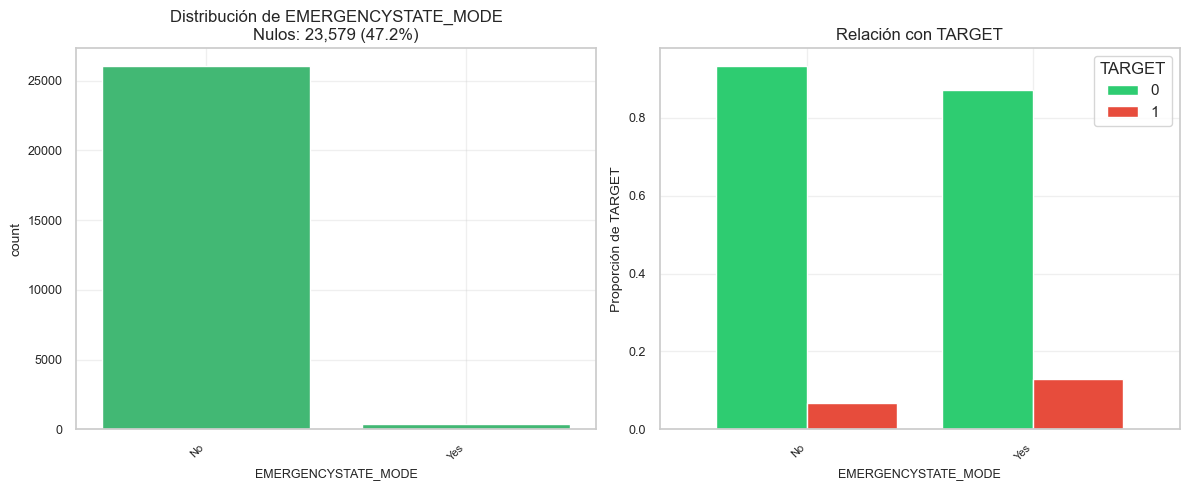

Error en OCCUPATION_TYPE: operands could not be broadcast together with shape (18,) (15,)


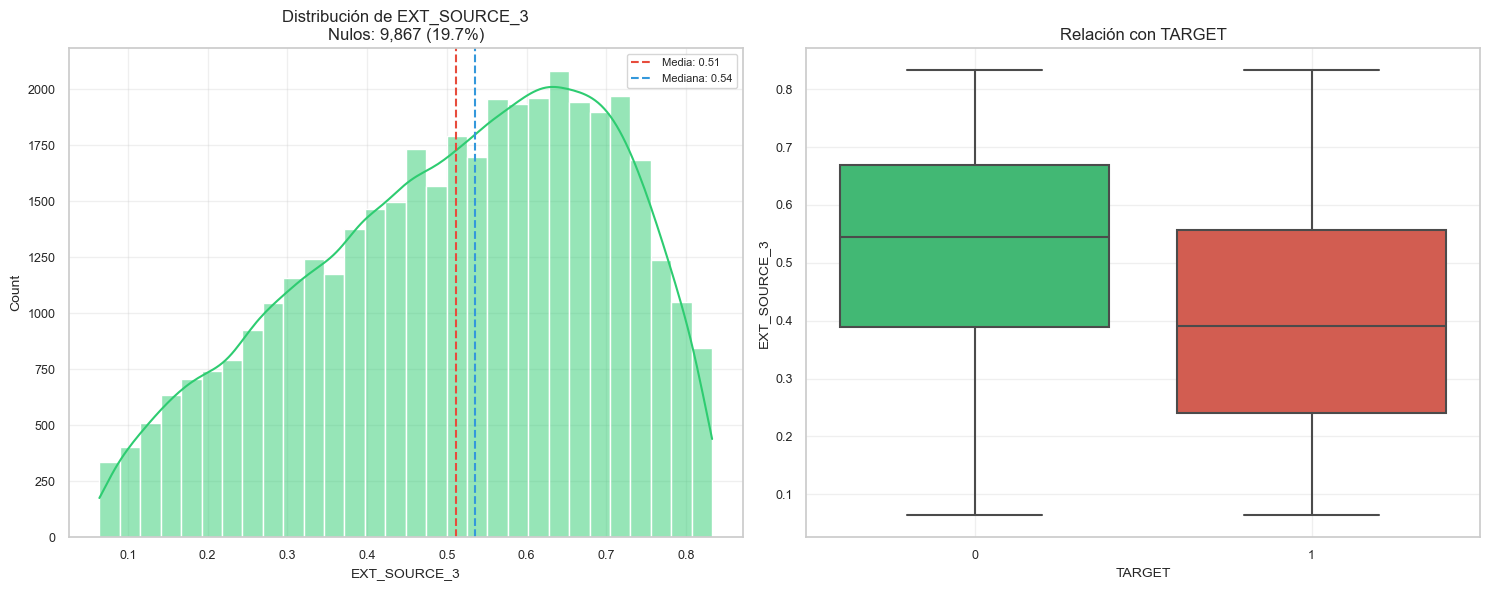


Procesando lote 18 de 41


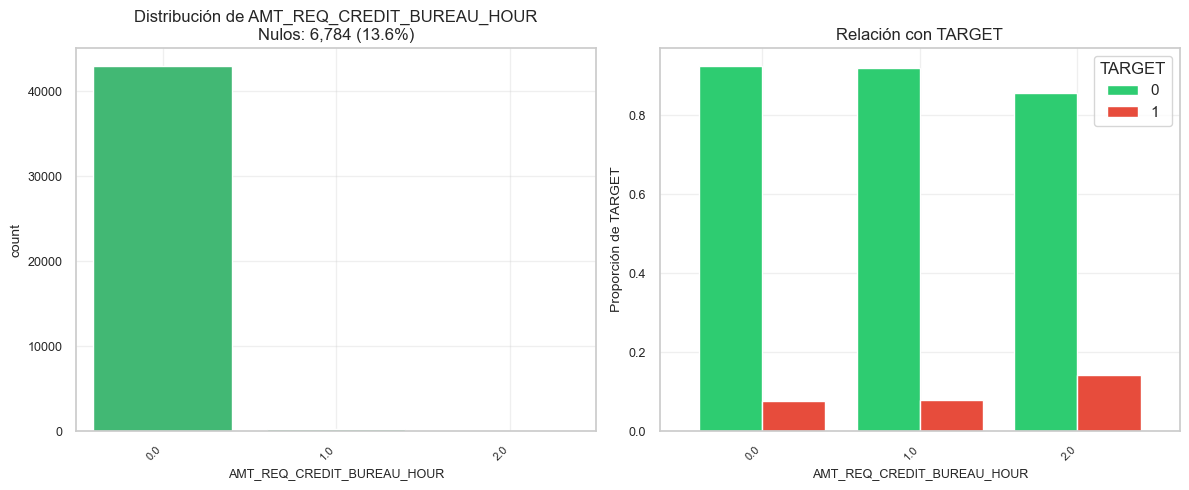

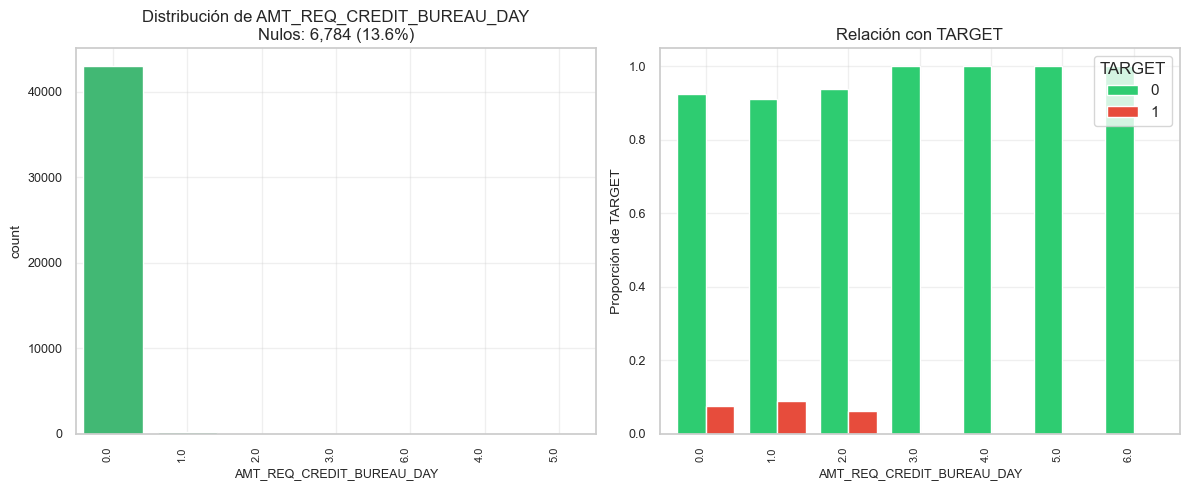

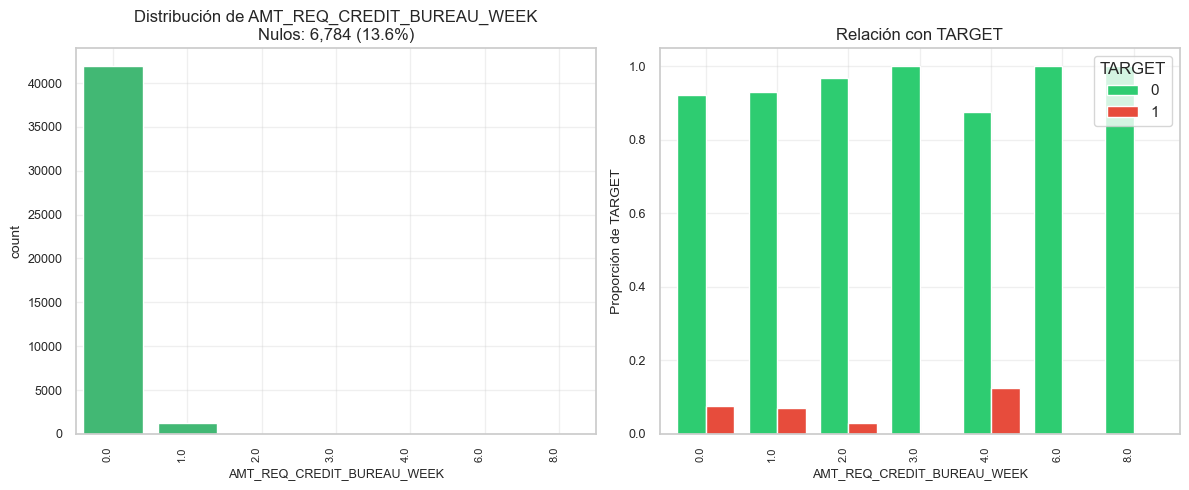


Procesando lote 19 de 41


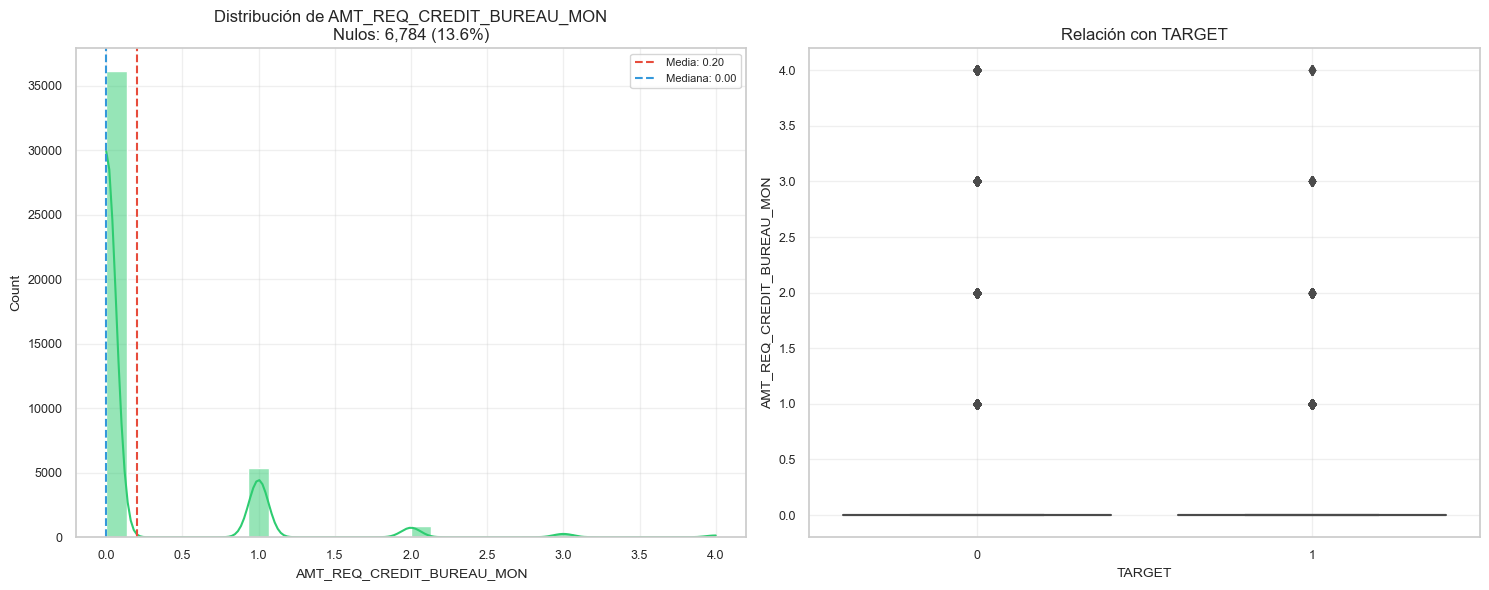

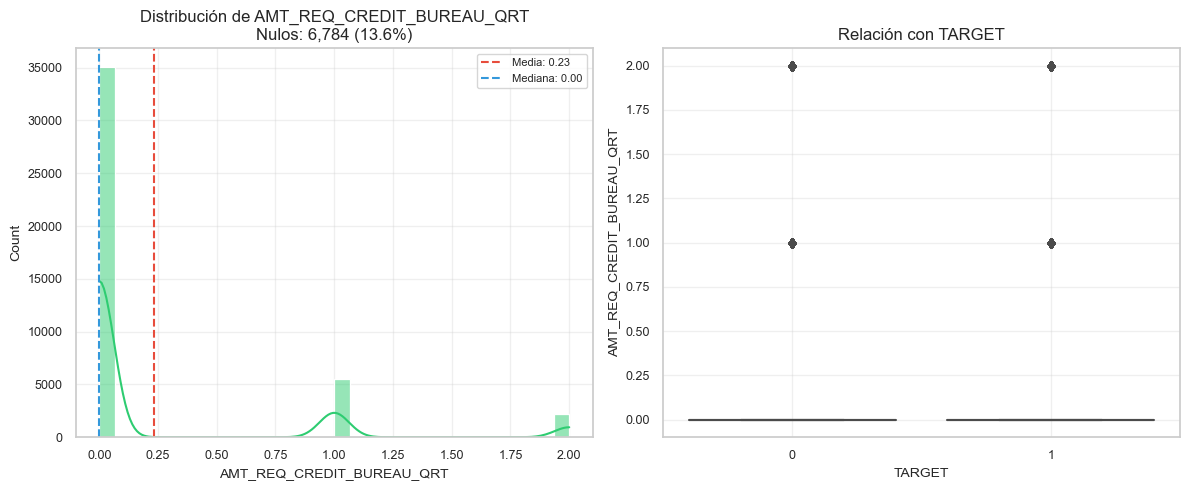

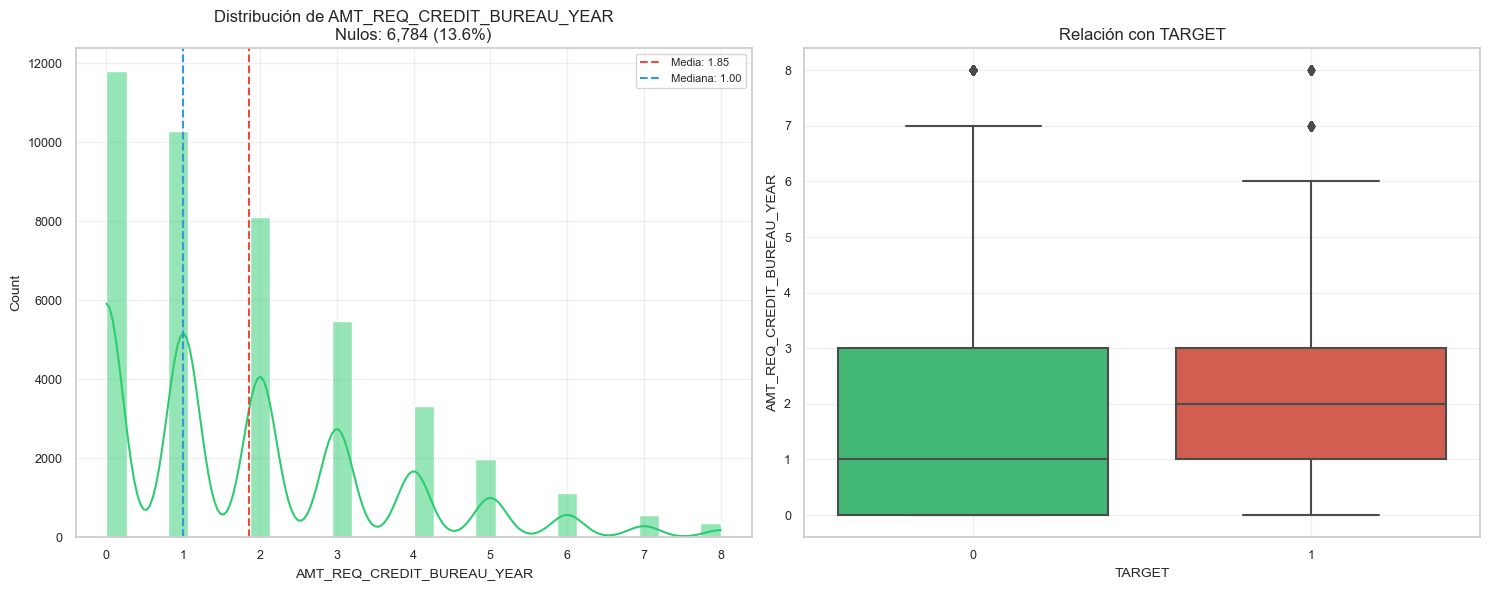


Procesando lote 20 de 41


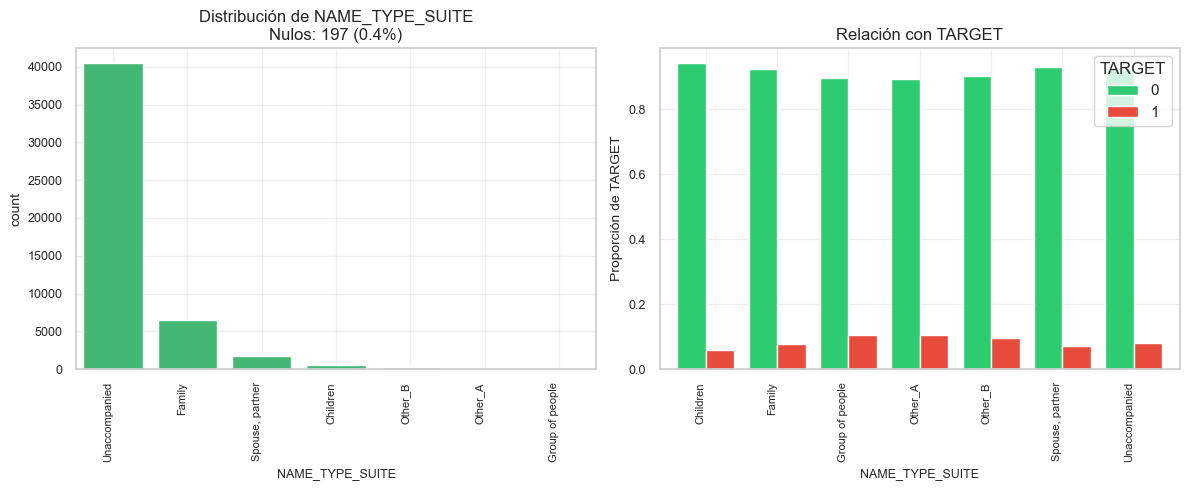

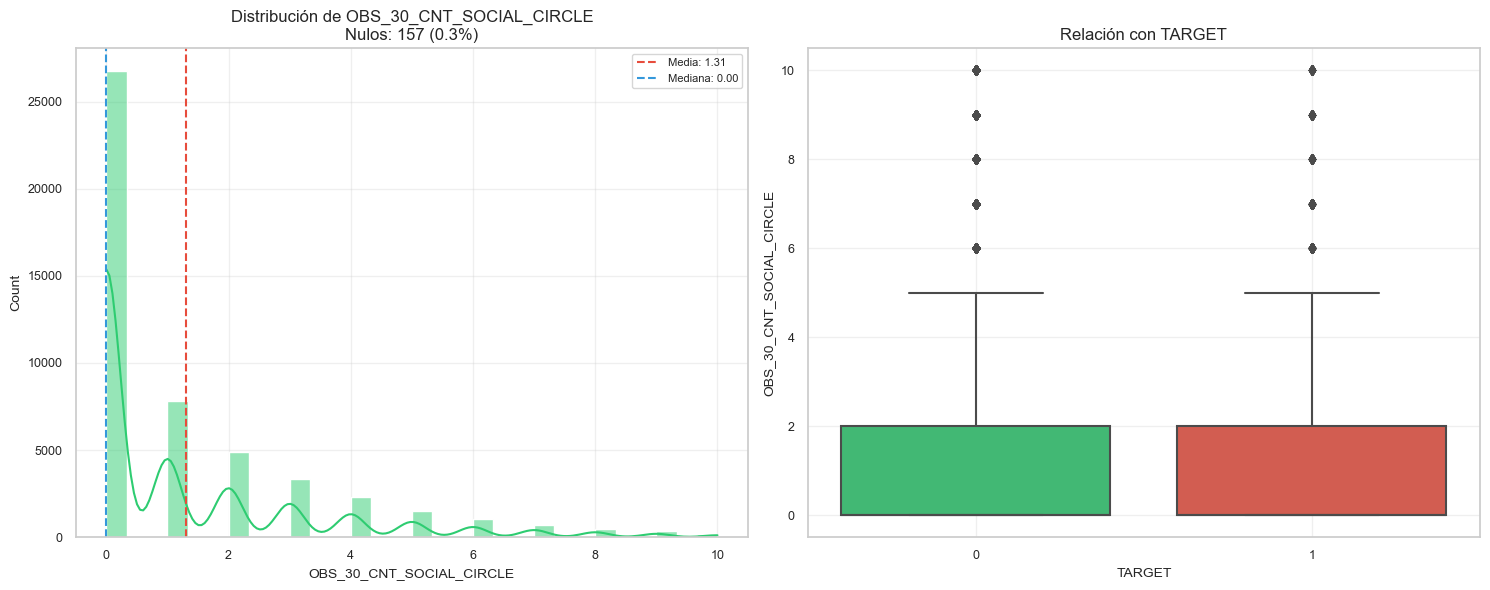

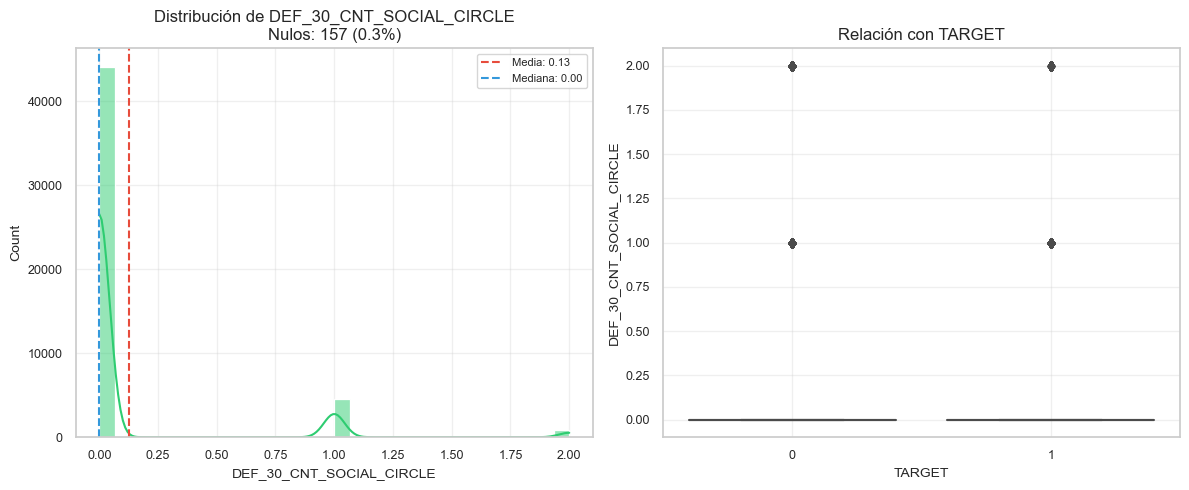


Procesando lote 21 de 41


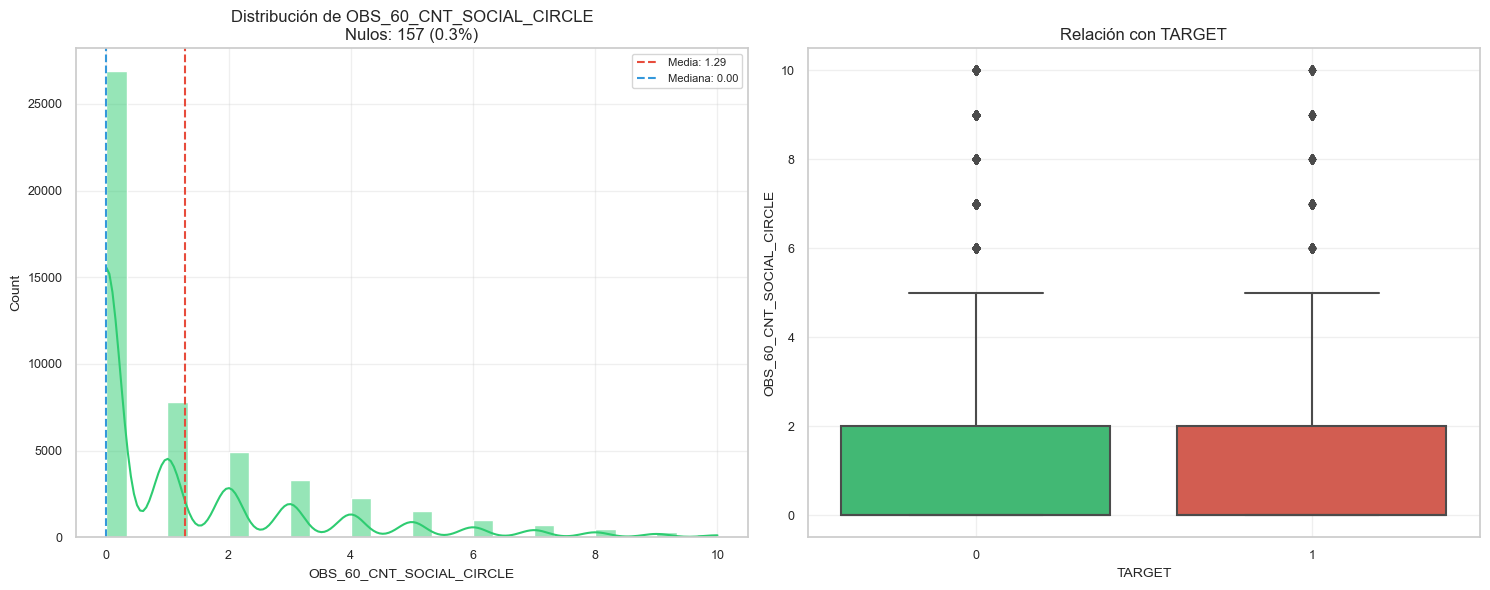

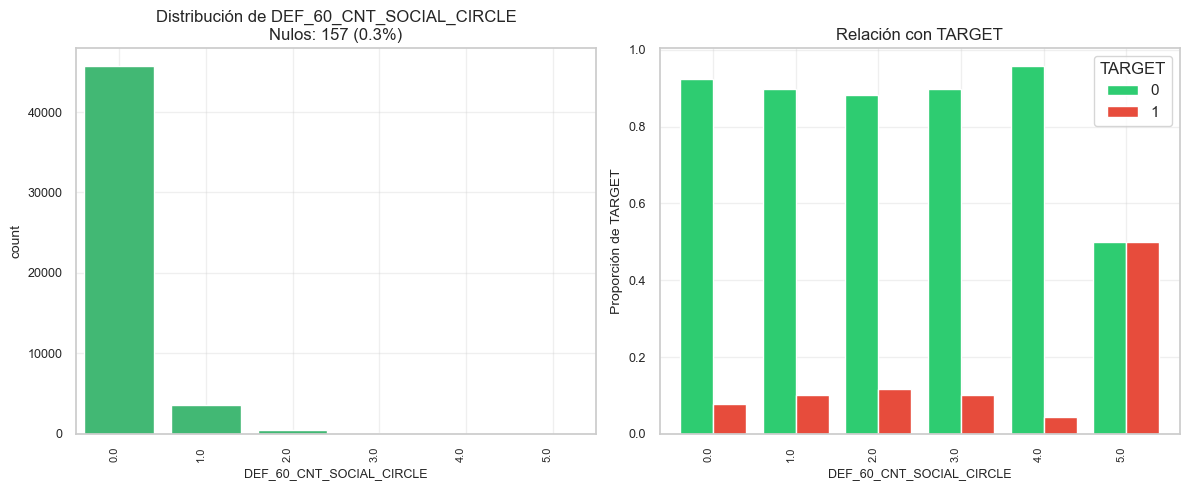

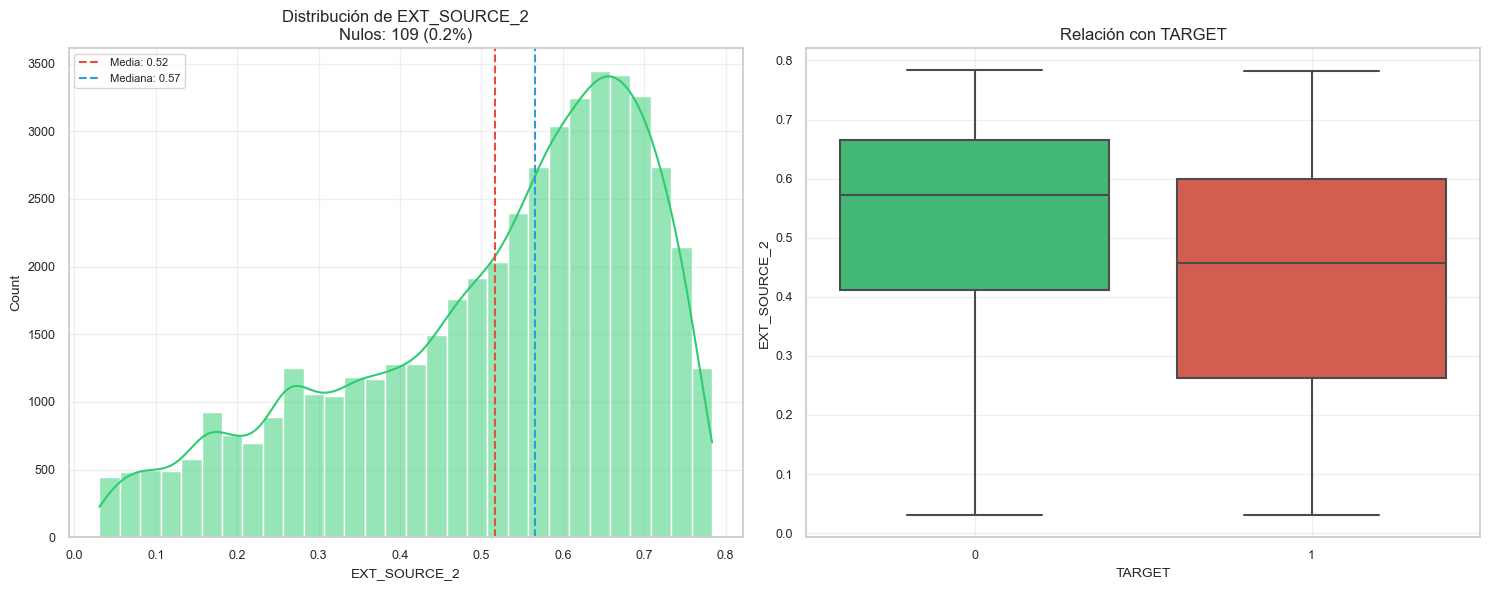


Procesando lote 22 de 41


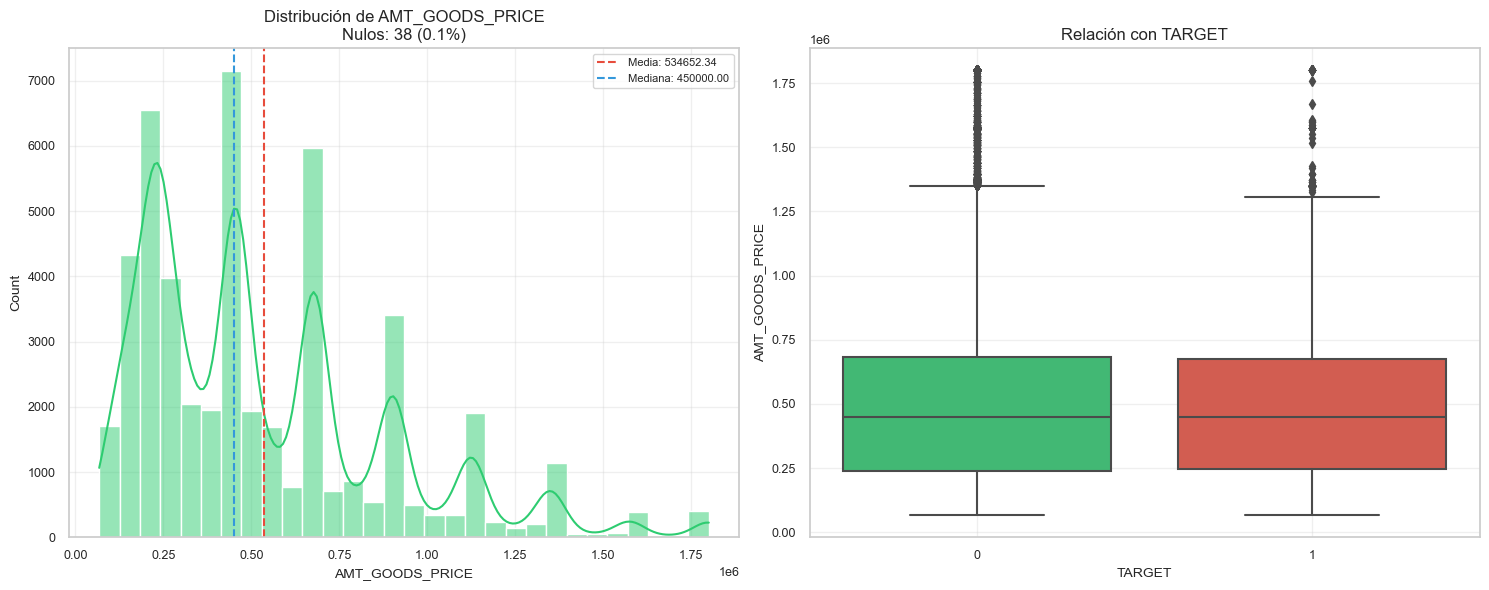

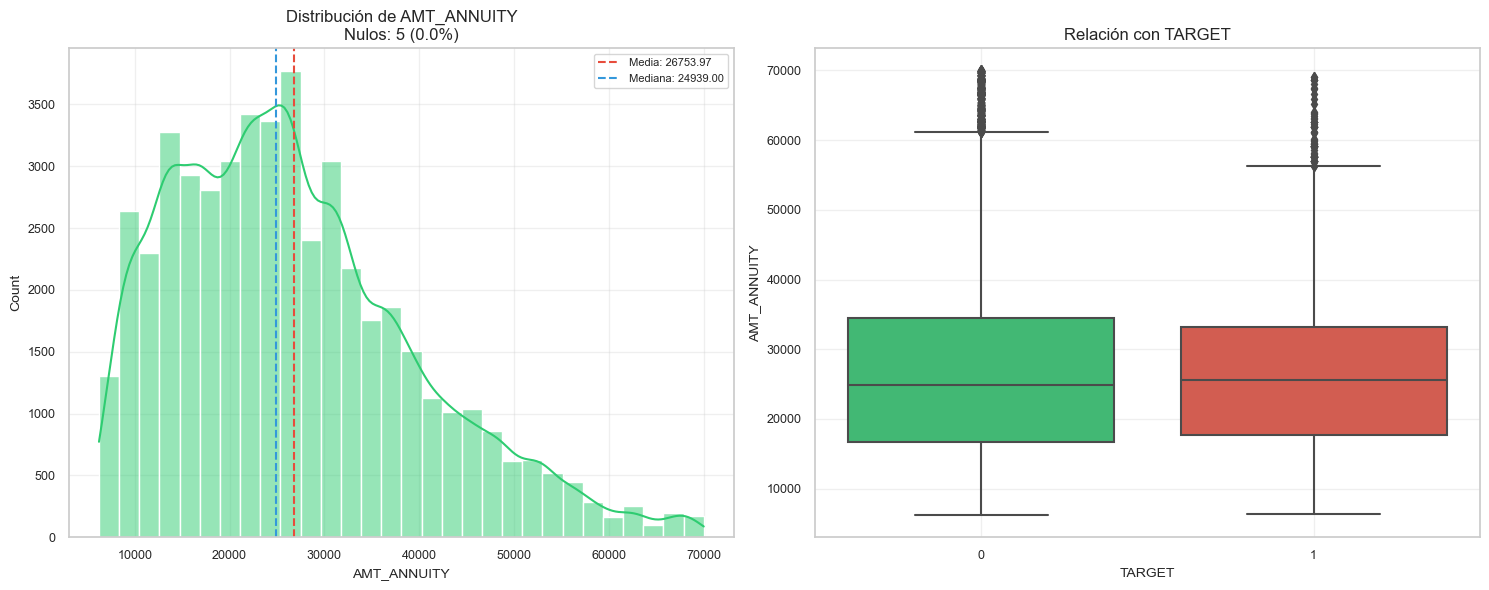

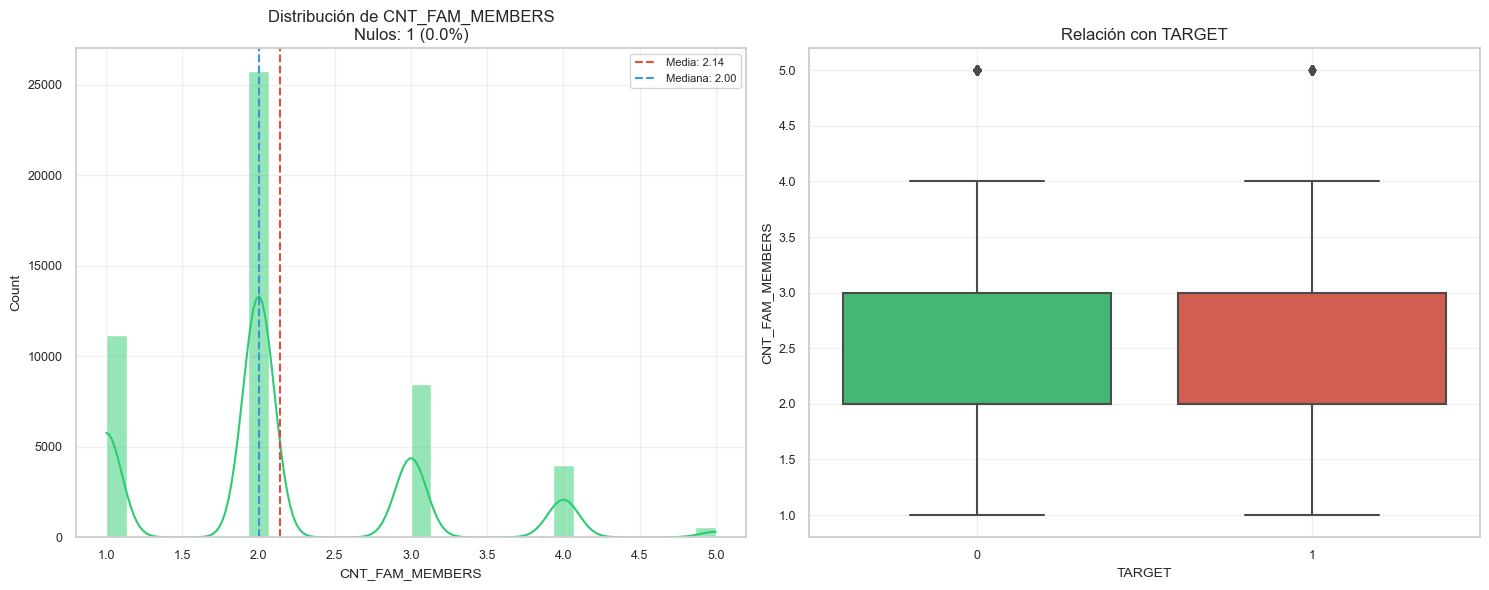


Procesando lote 23 de 41


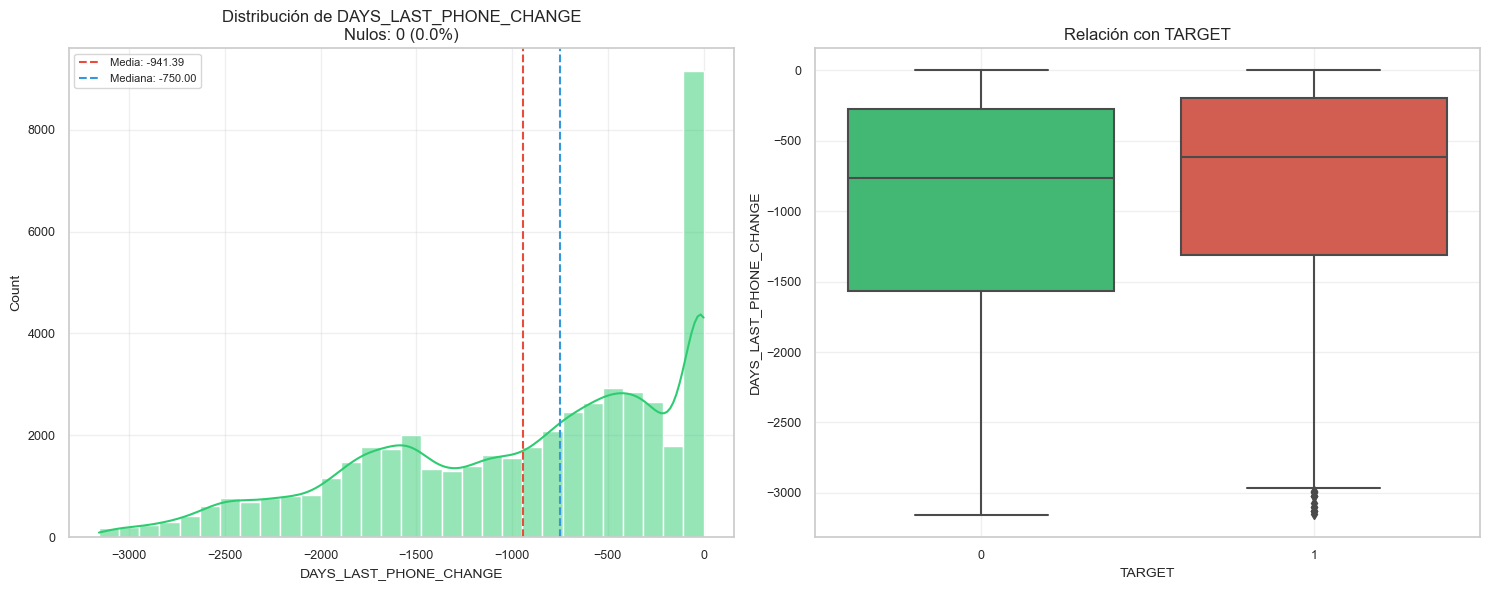

Error en CNT_CHILDREN: operands could not be broadcast together with shape (15,) (13,)


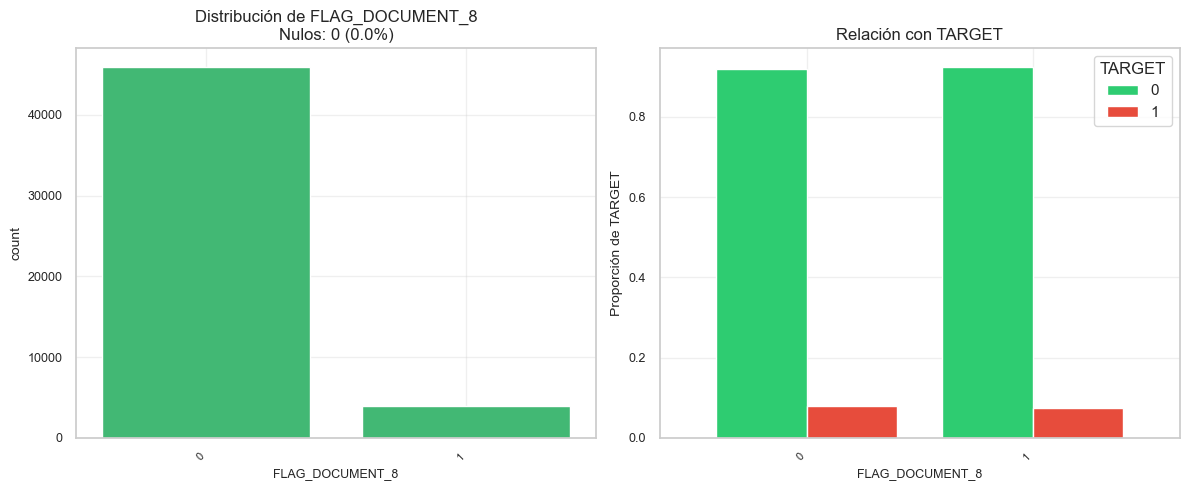


Procesando lote 24 de 41


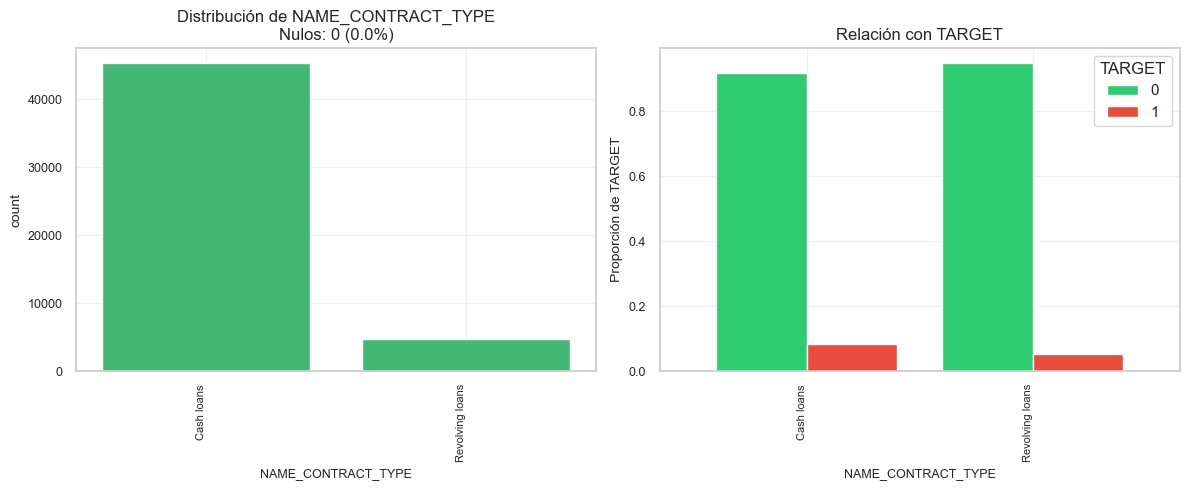

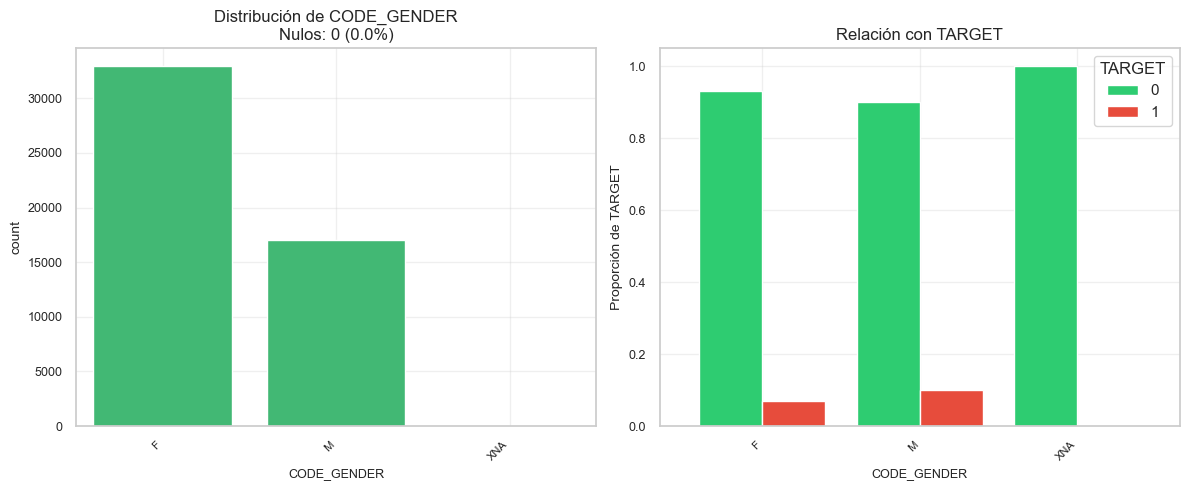

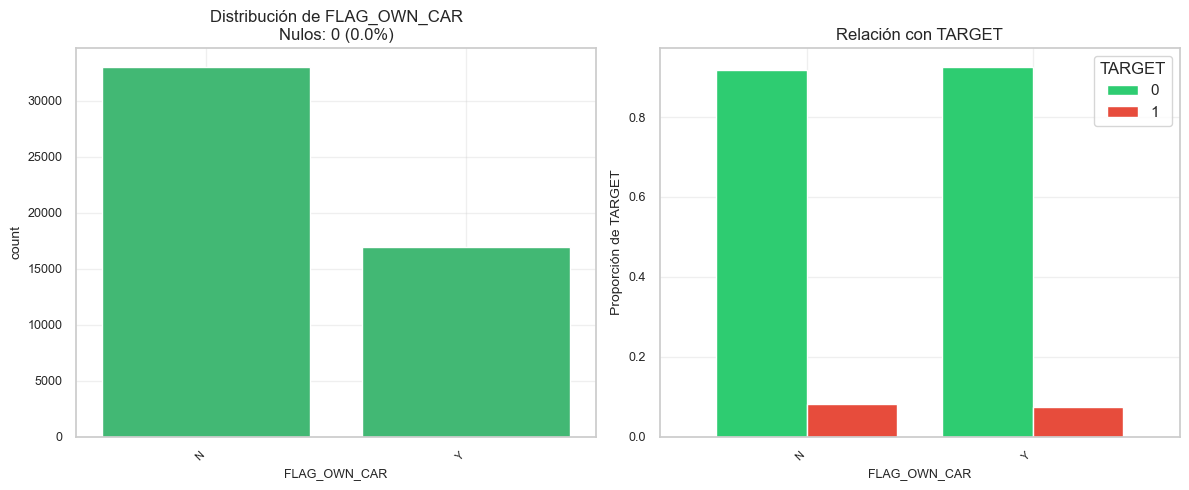


Procesando lote 25 de 41


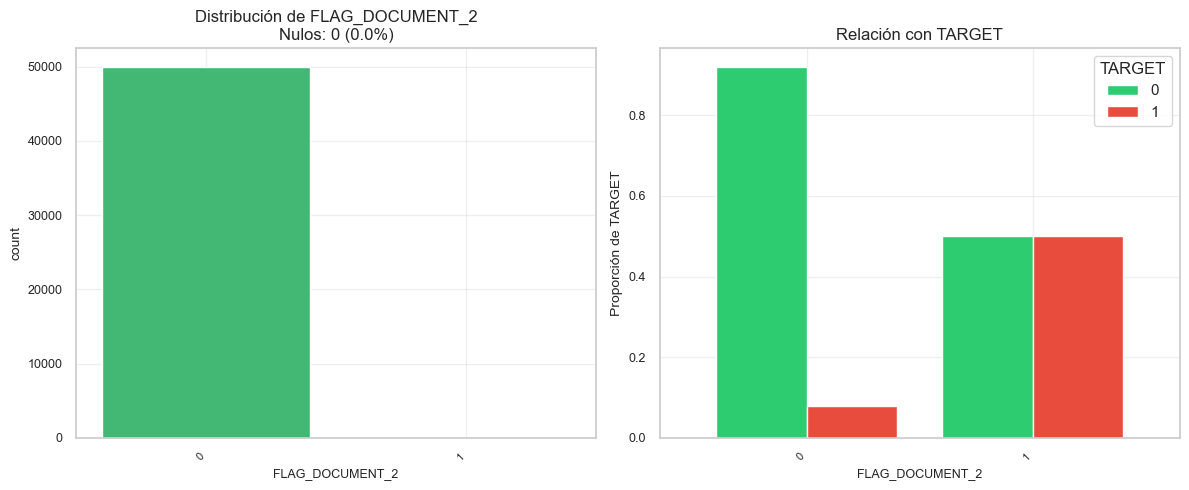

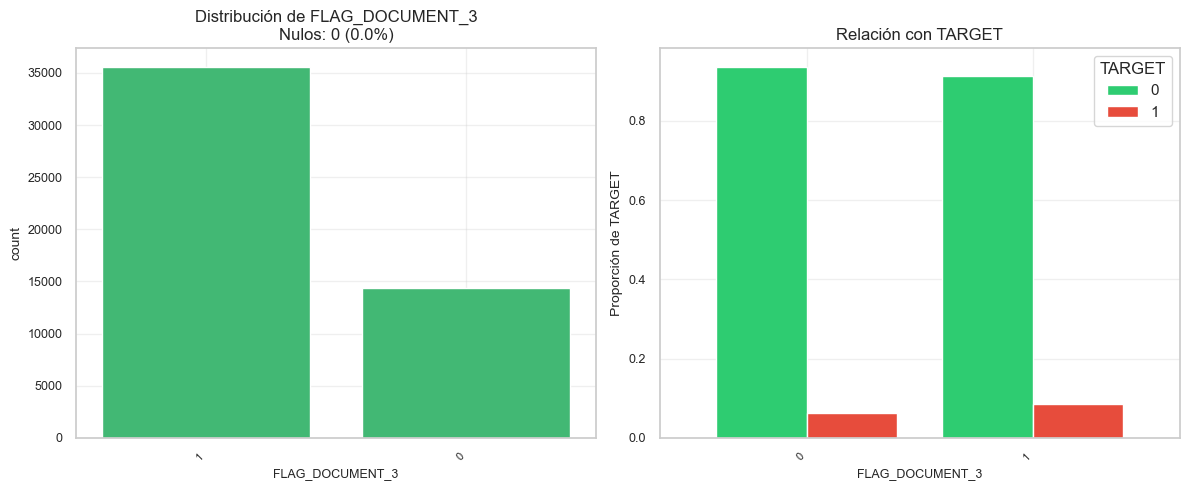

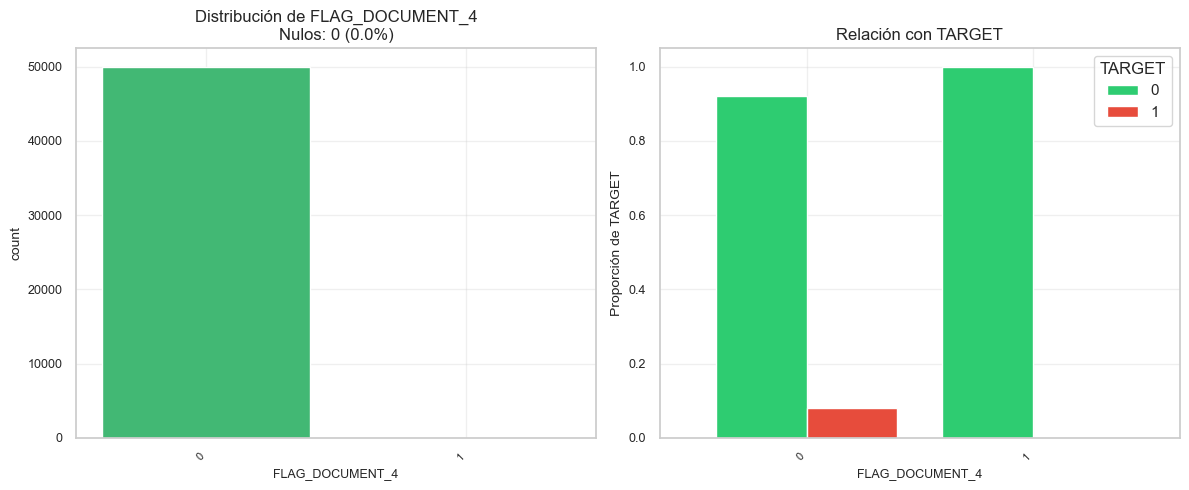


Procesando lote 26 de 41


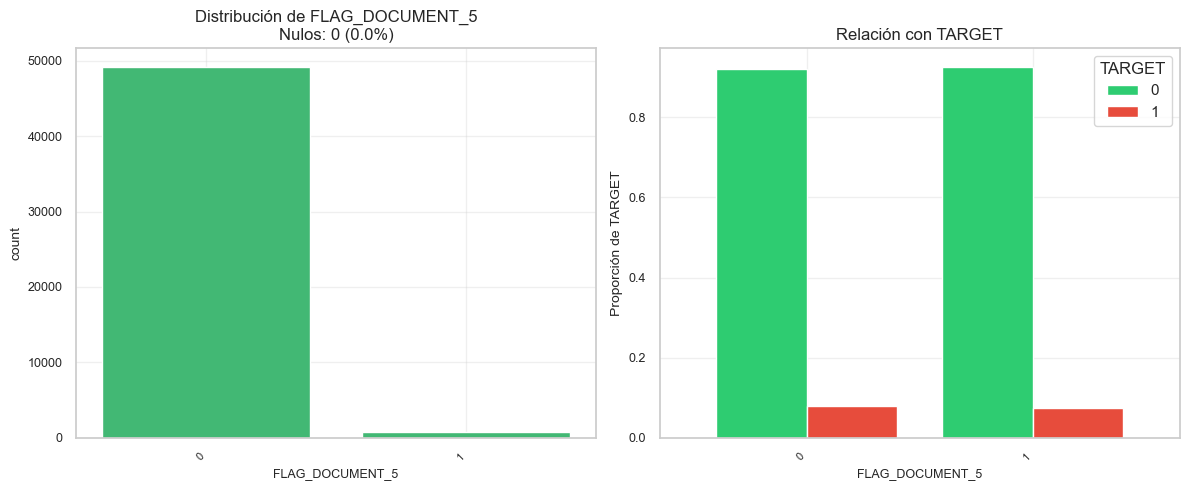

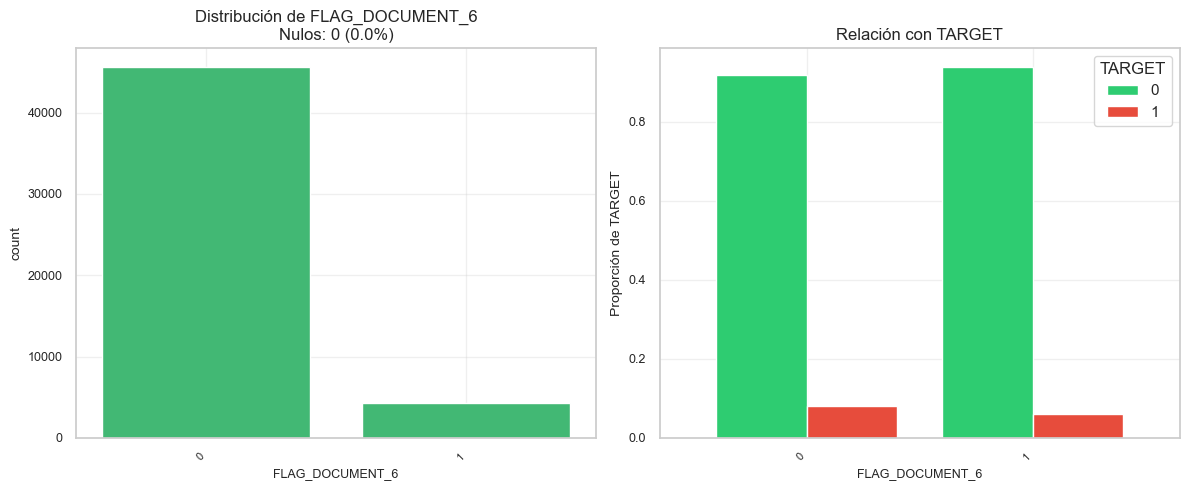

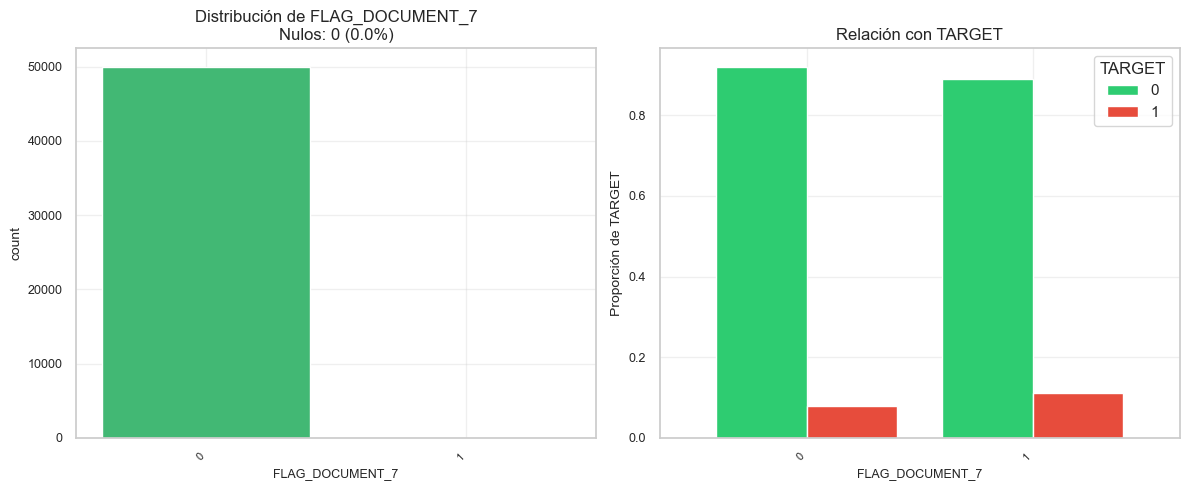


Procesando lote 27 de 41


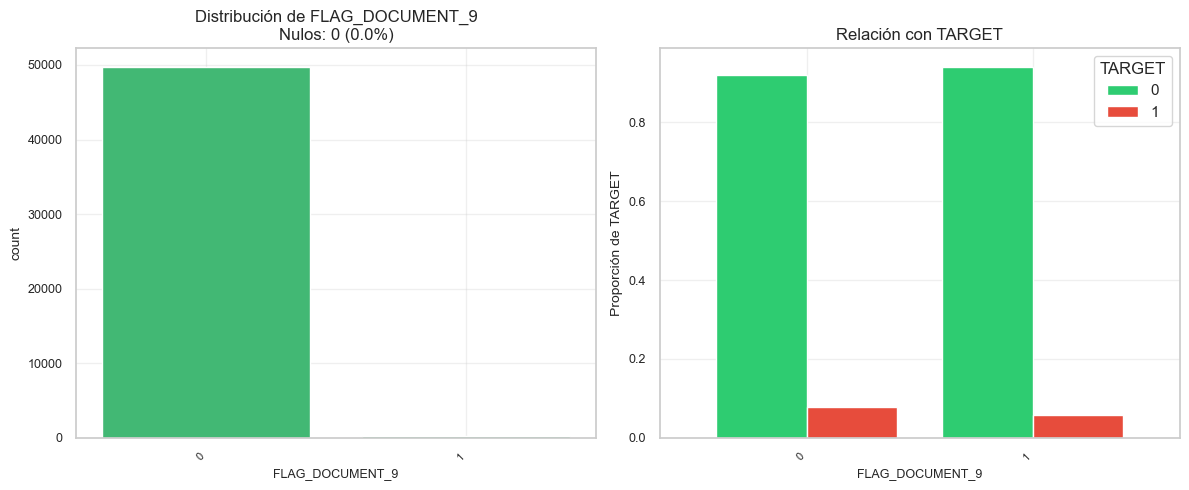

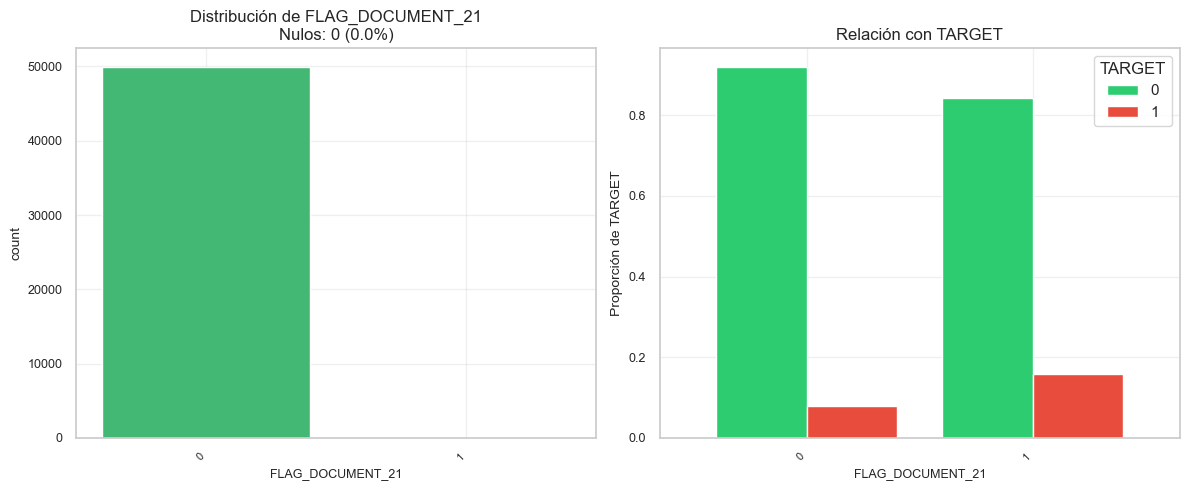

Error en FLAG_DOCUMENT_10: Length of passed values is 2, index implies 4.

Procesando lote 28 de 41


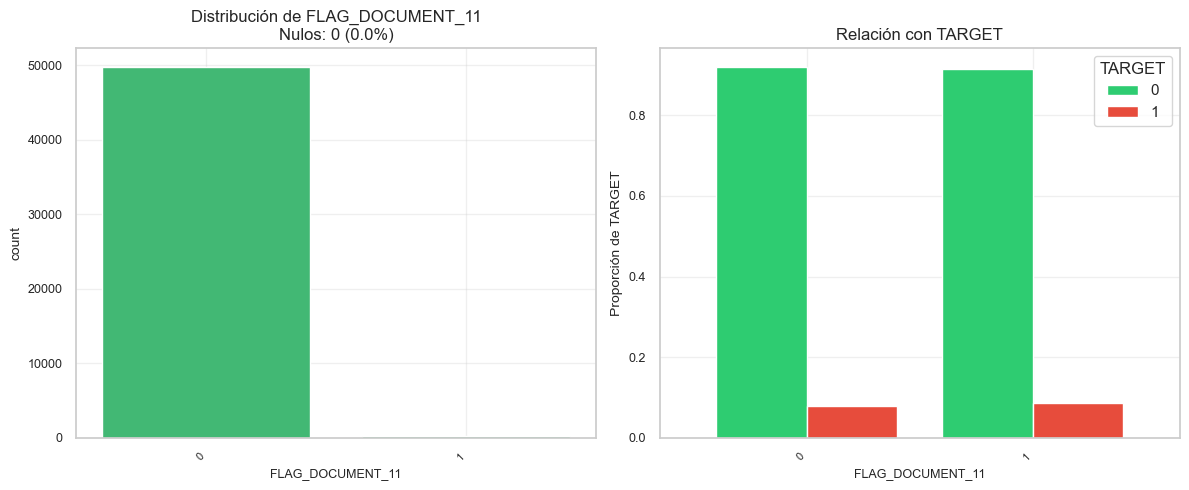

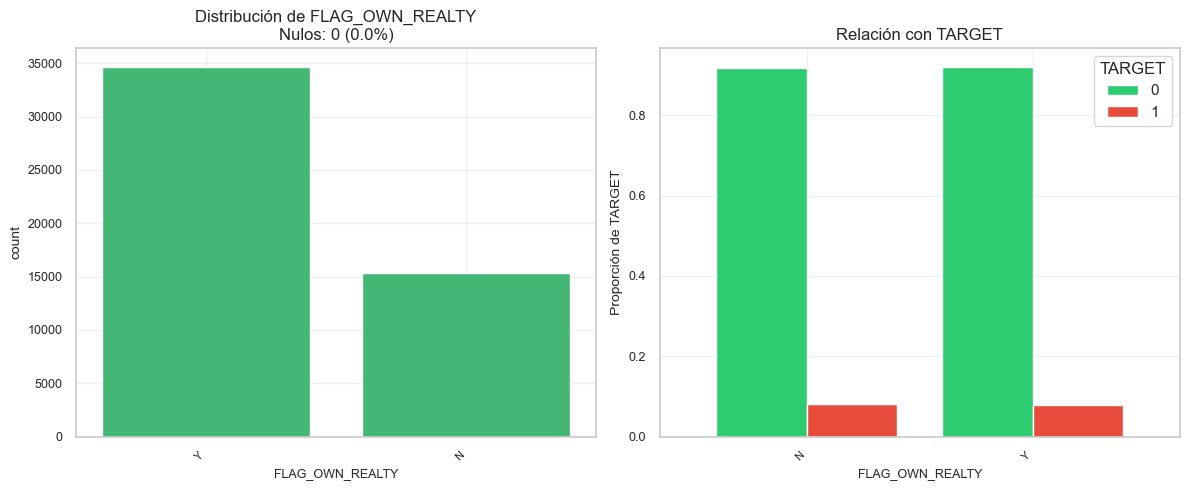

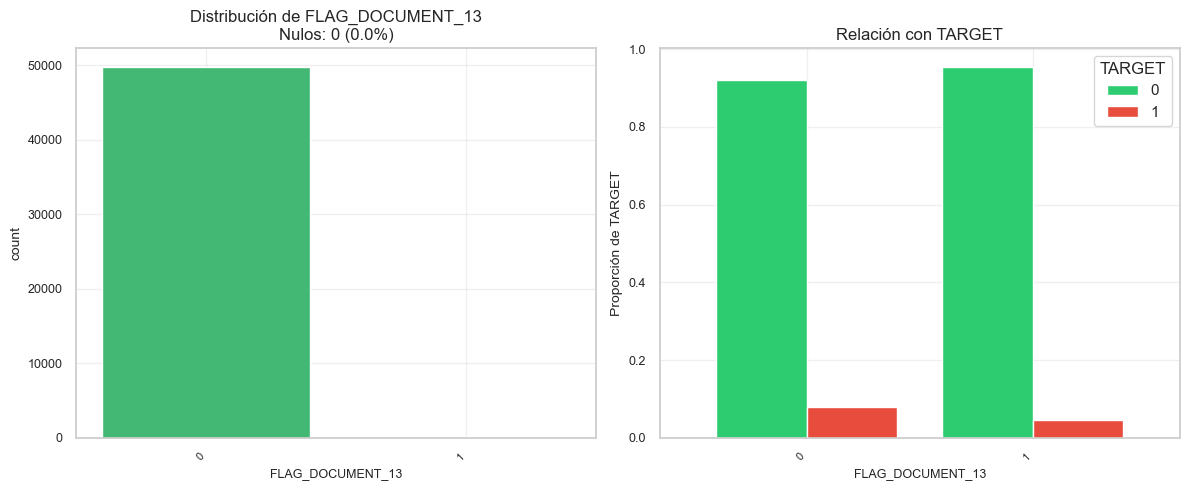


Procesando lote 29 de 41


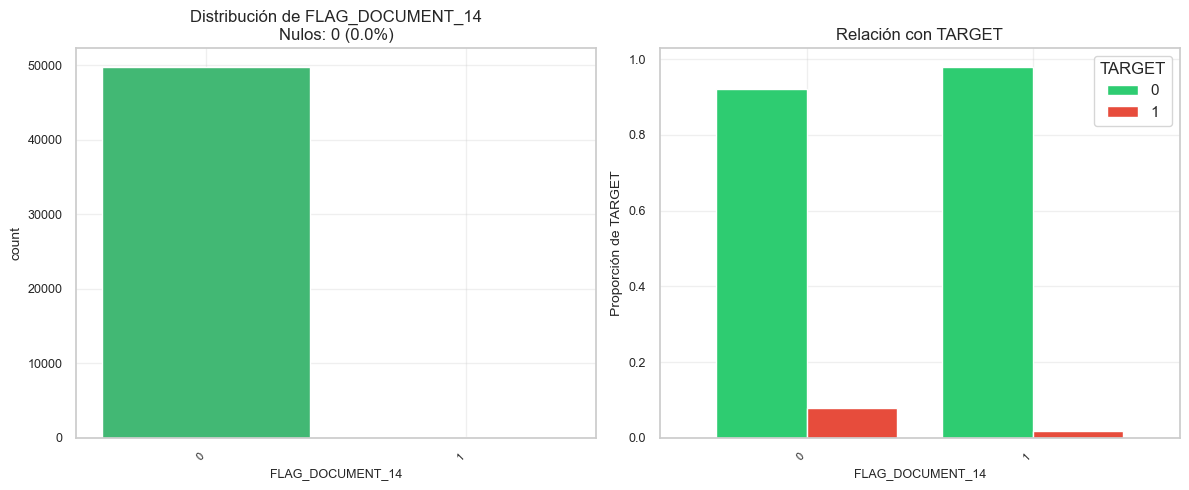

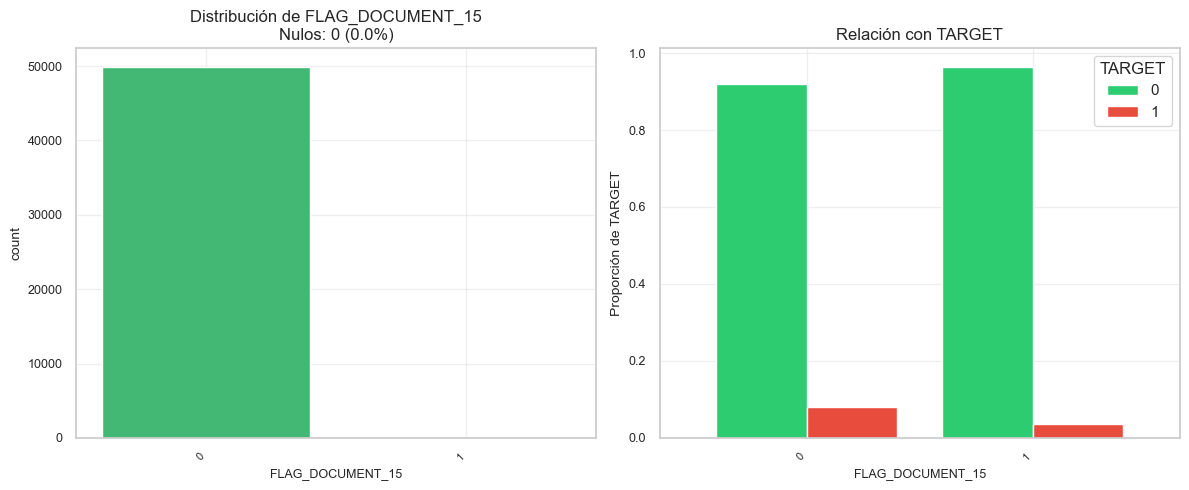

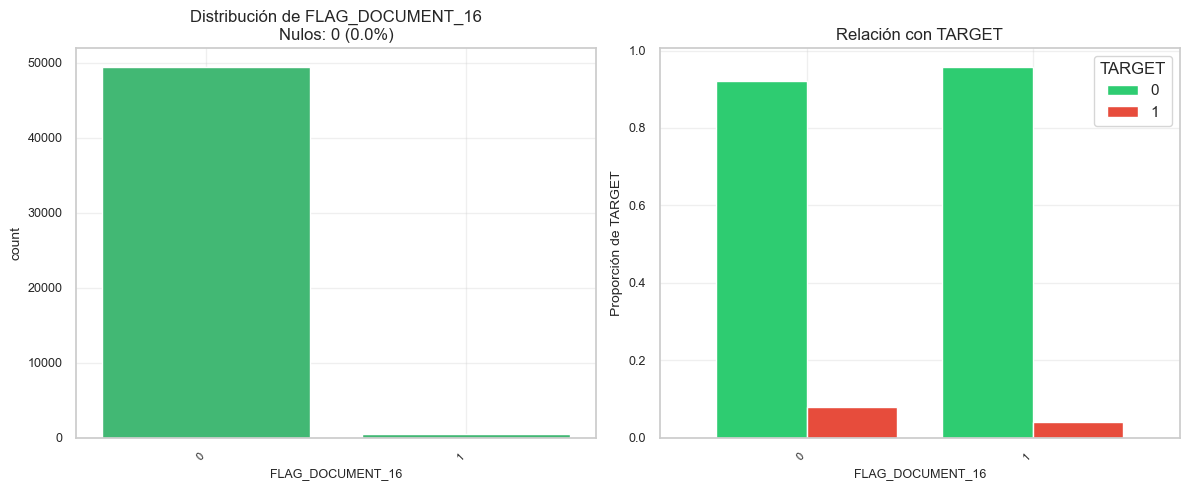


Procesando lote 30 de 41


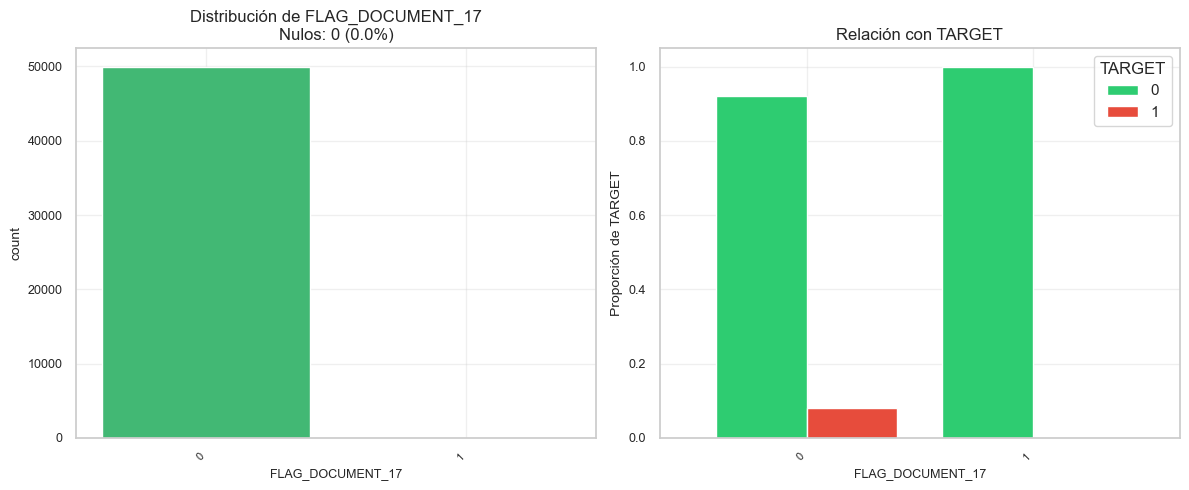

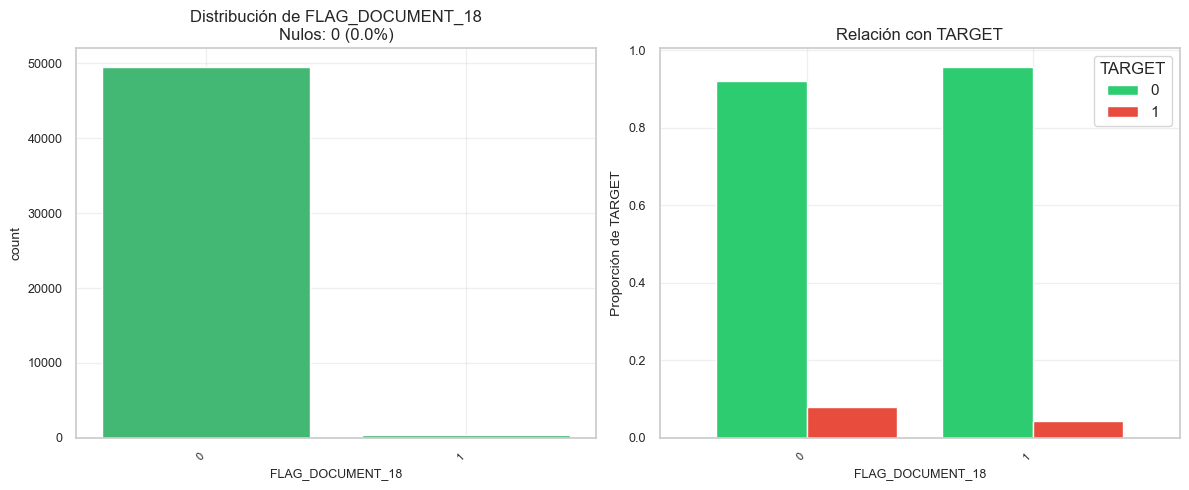

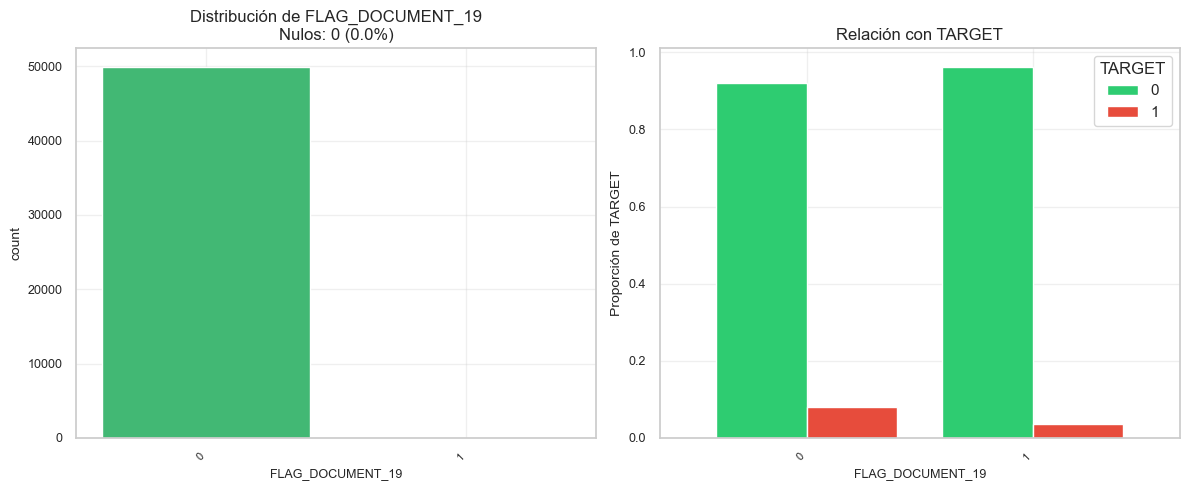


Procesando lote 31 de 41


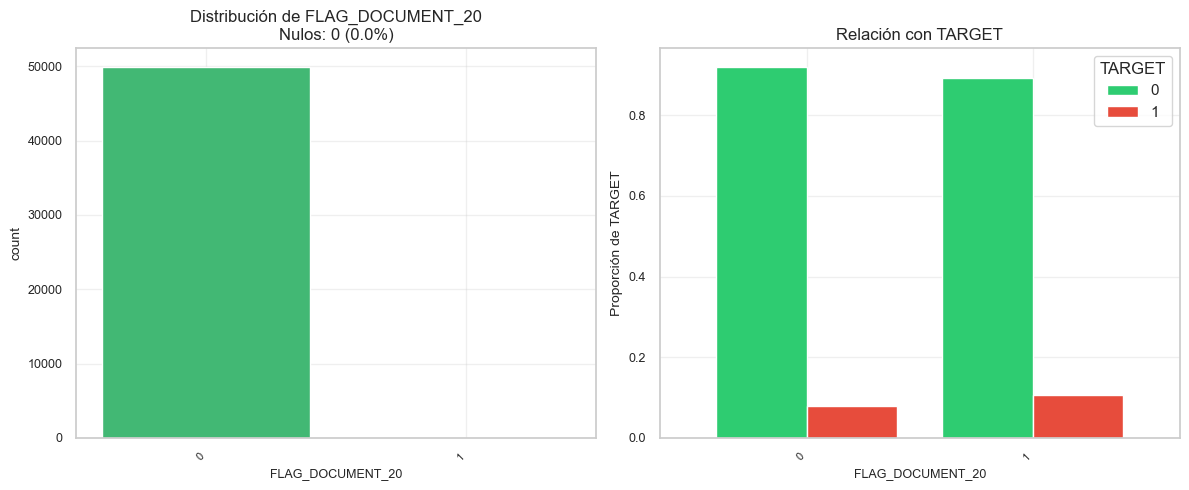

Error en FLAG_DOCUMENT_12: Length of passed values is 2, index implies 4.


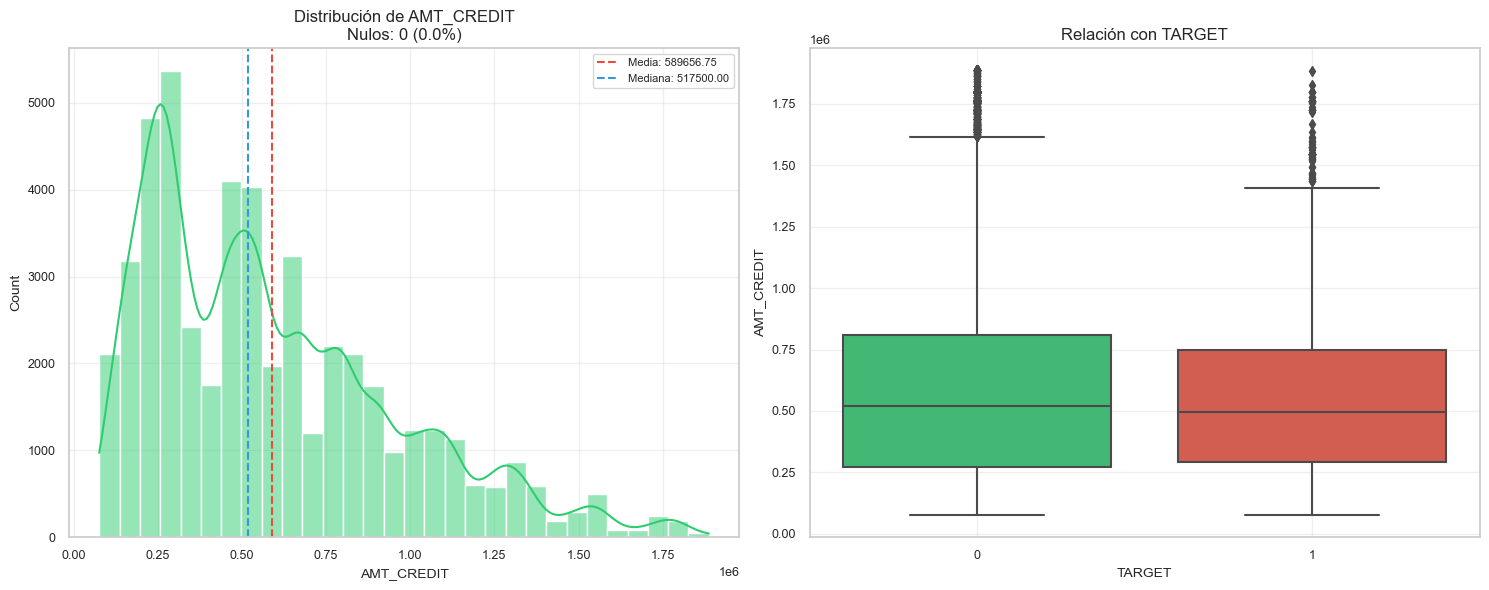


Procesando lote 32 de 41


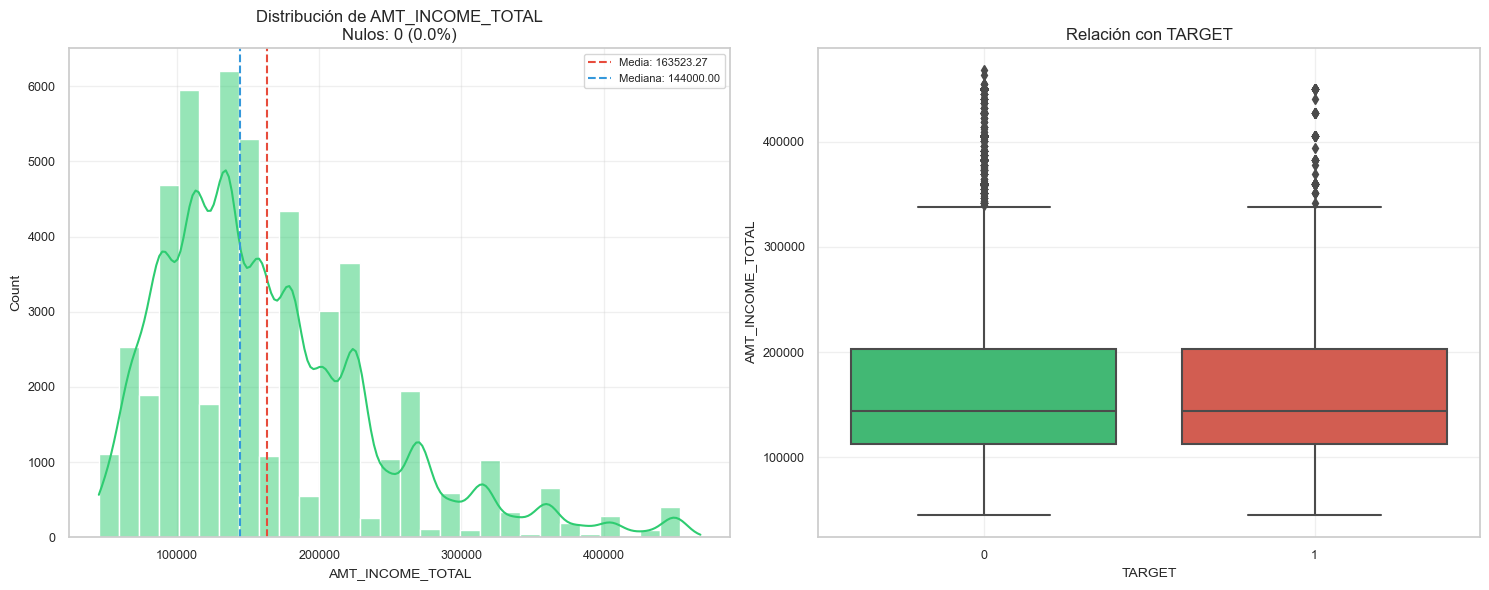

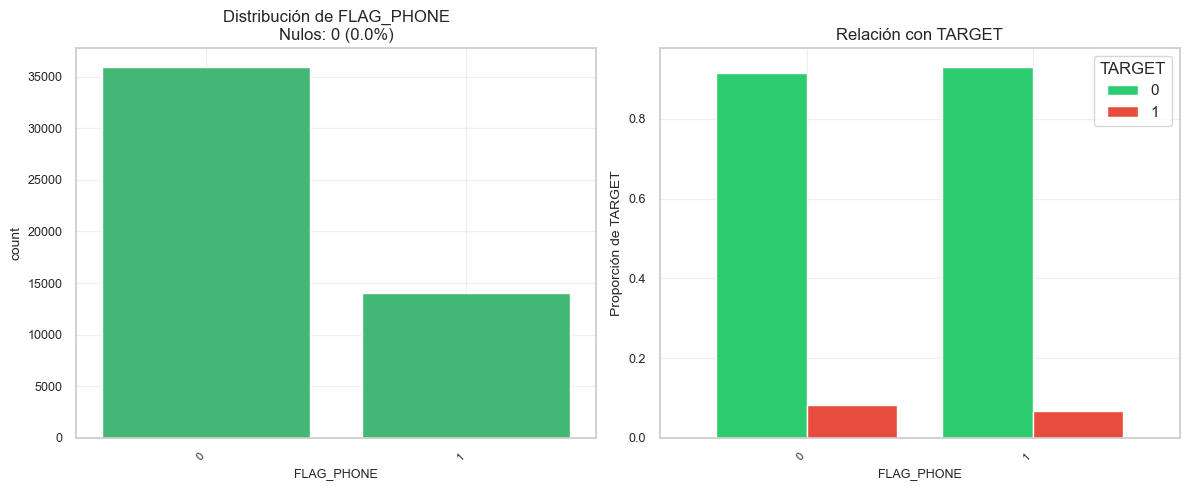

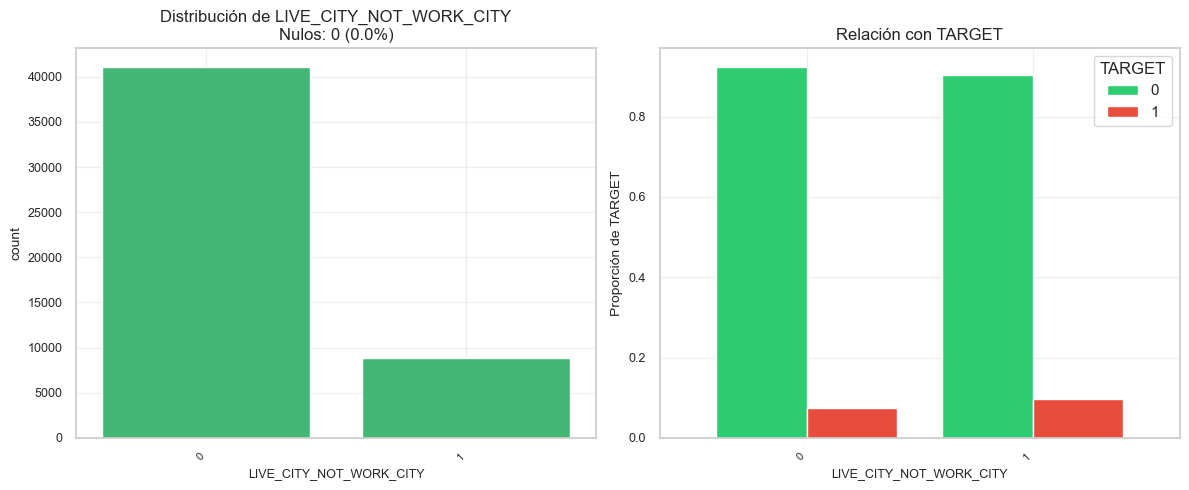


Procesando lote 33 de 41


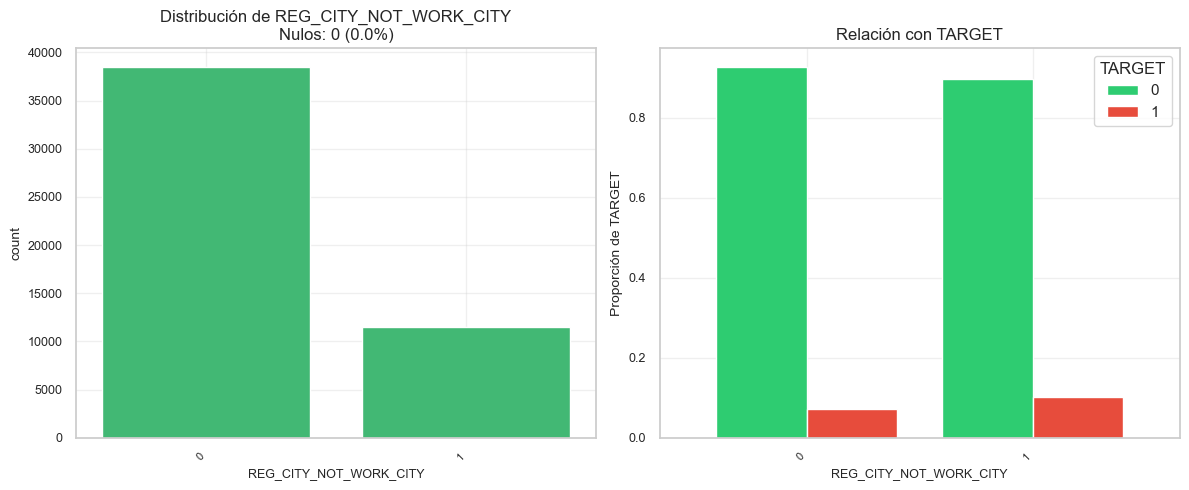

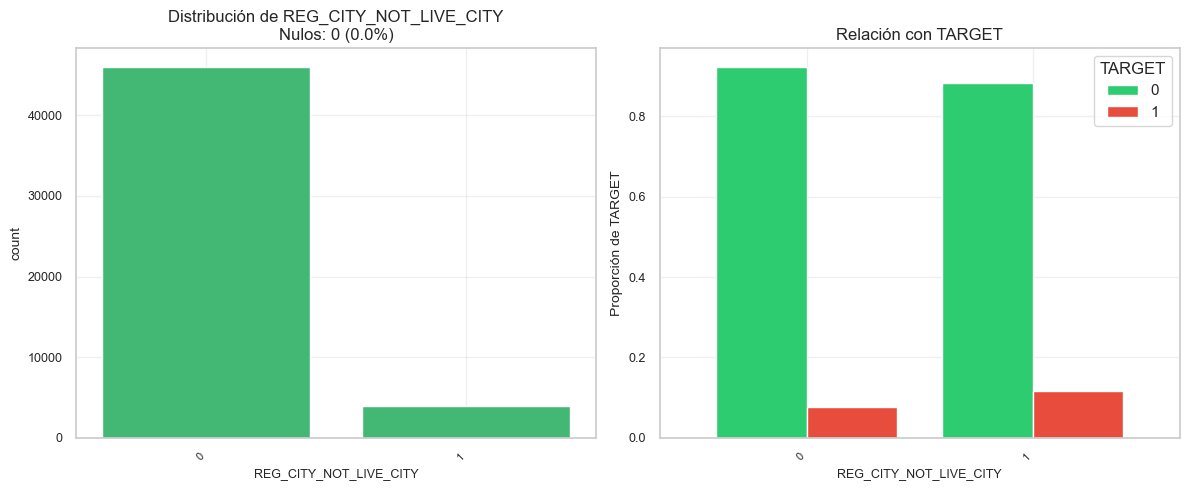

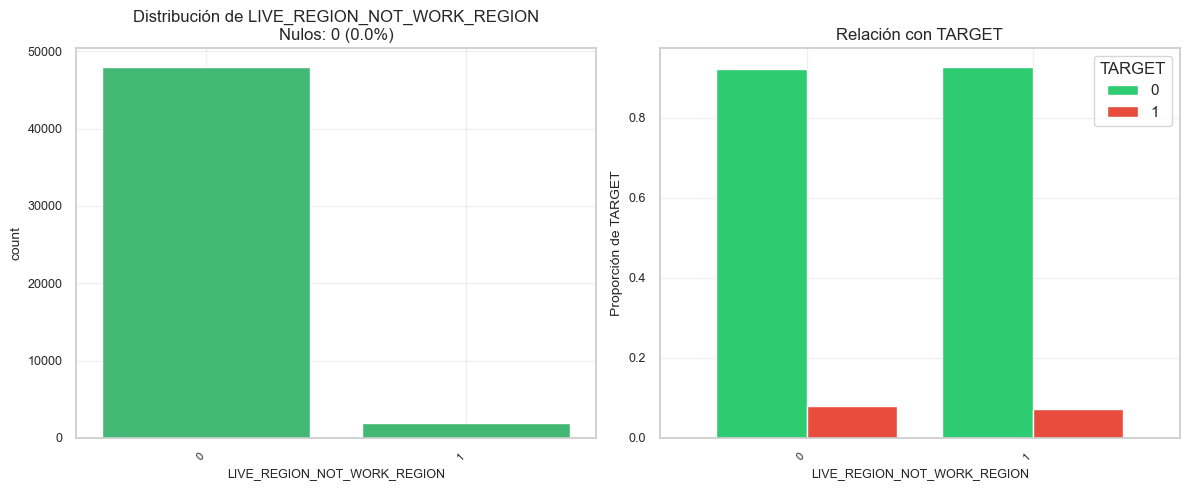


Procesando lote 34 de 41


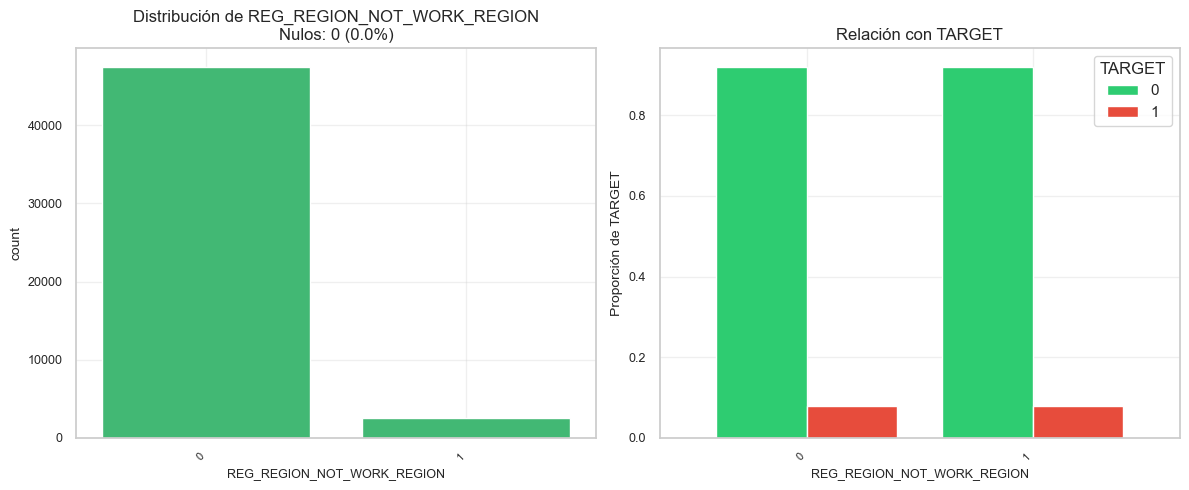

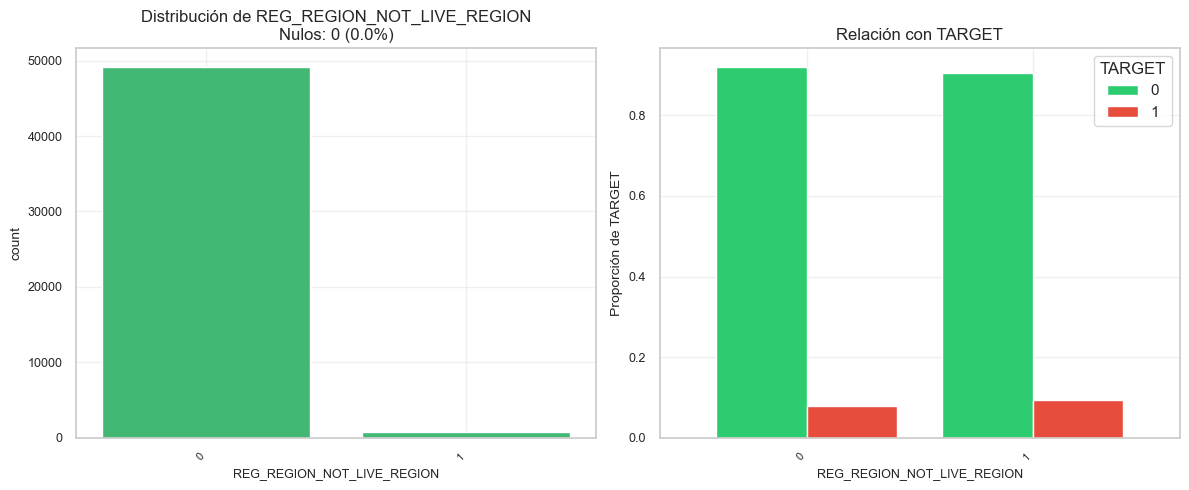

Error en HOUR_APPR_PROCESS_START: operands could not be broadcast together with shape (24,) (15,)

Procesando lote 35 de 41


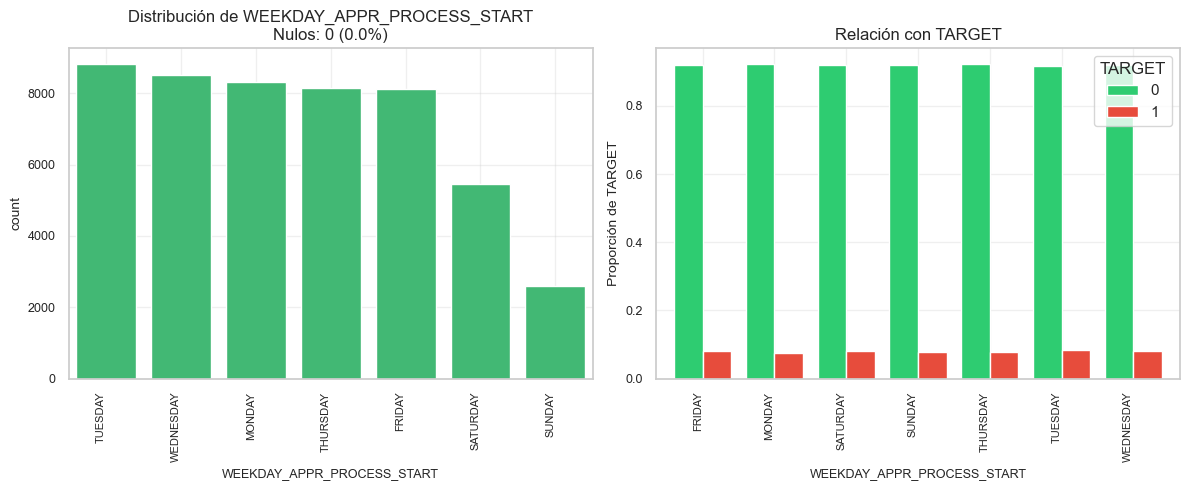

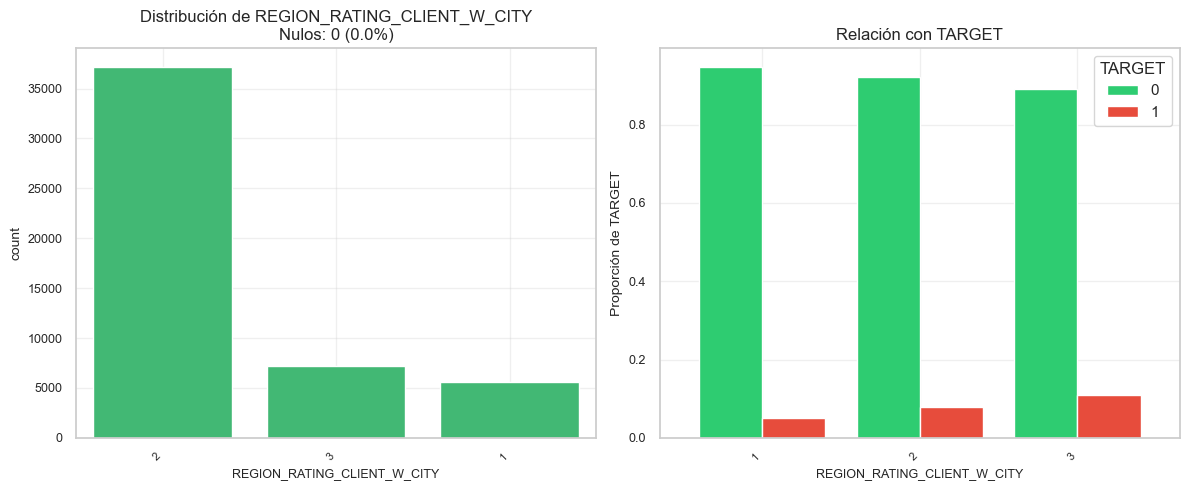

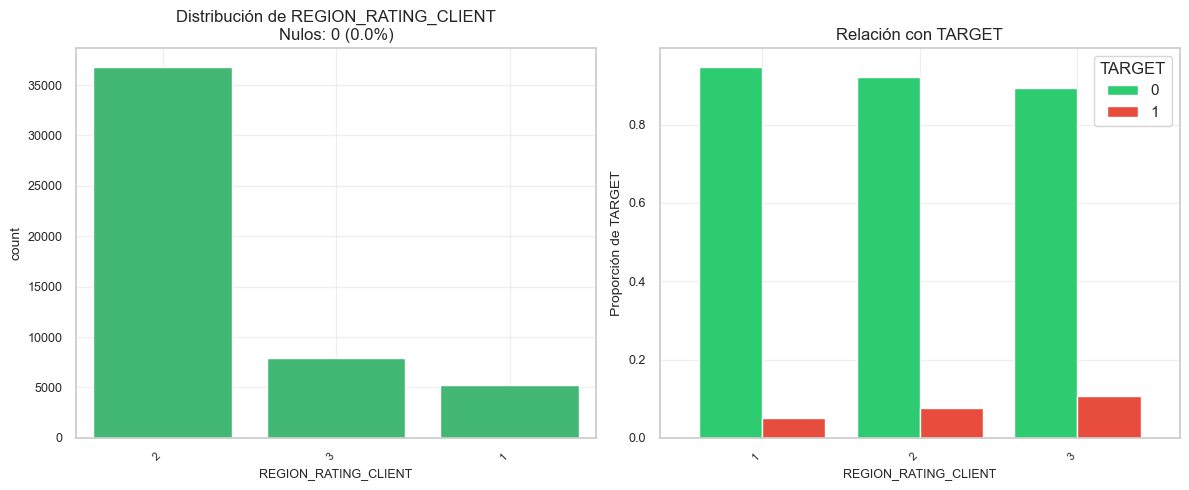


Procesando lote 36 de 41


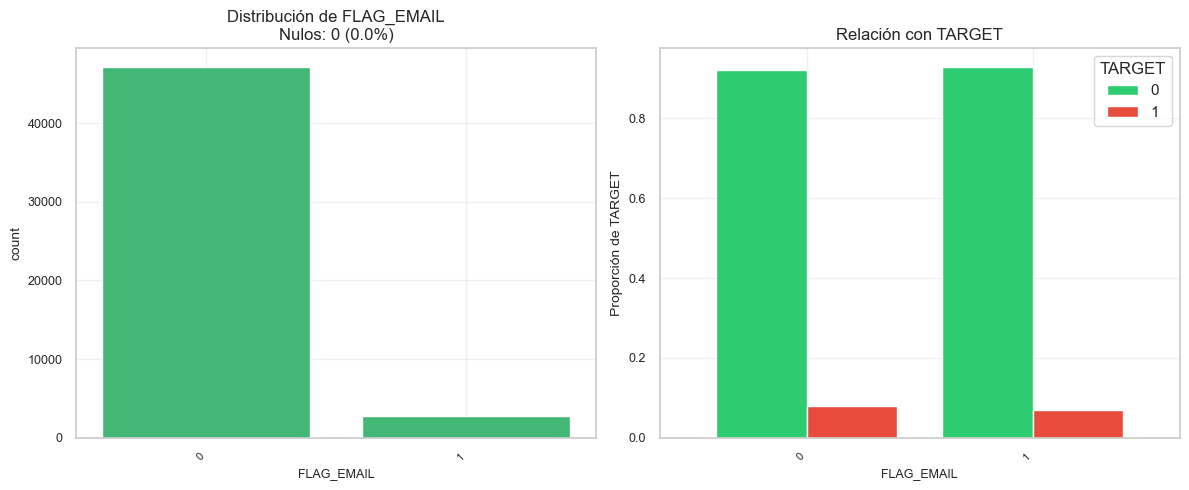

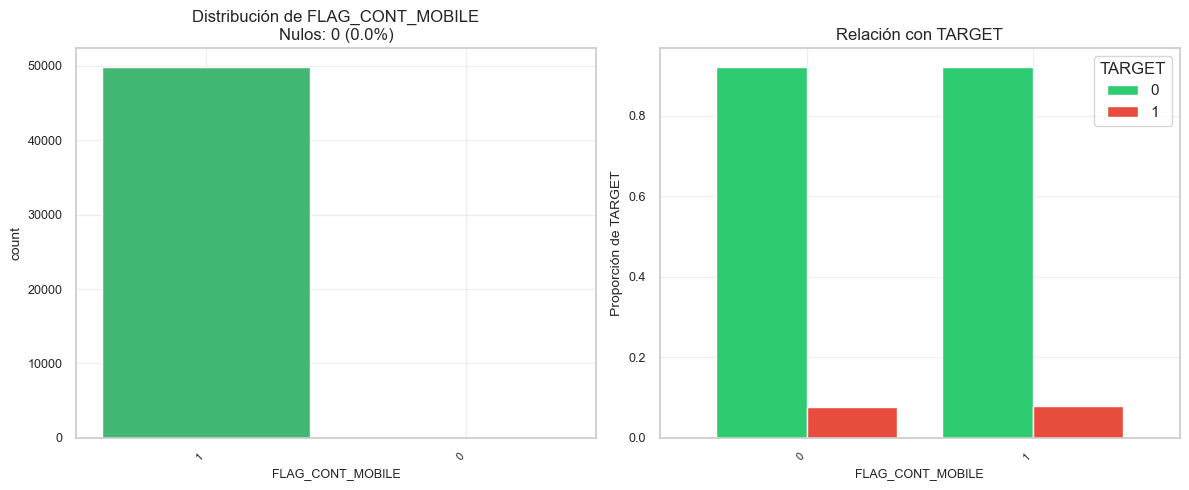

Error en ORGANIZATION_TYPE: operands could not be broadcast together with shape (58,) (15,)

Procesando lote 37 de 41


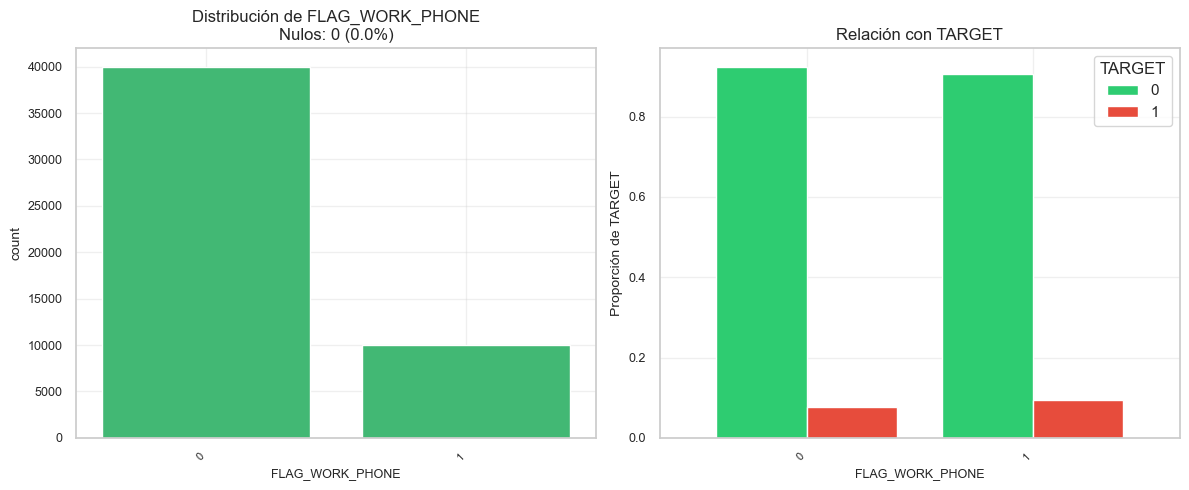

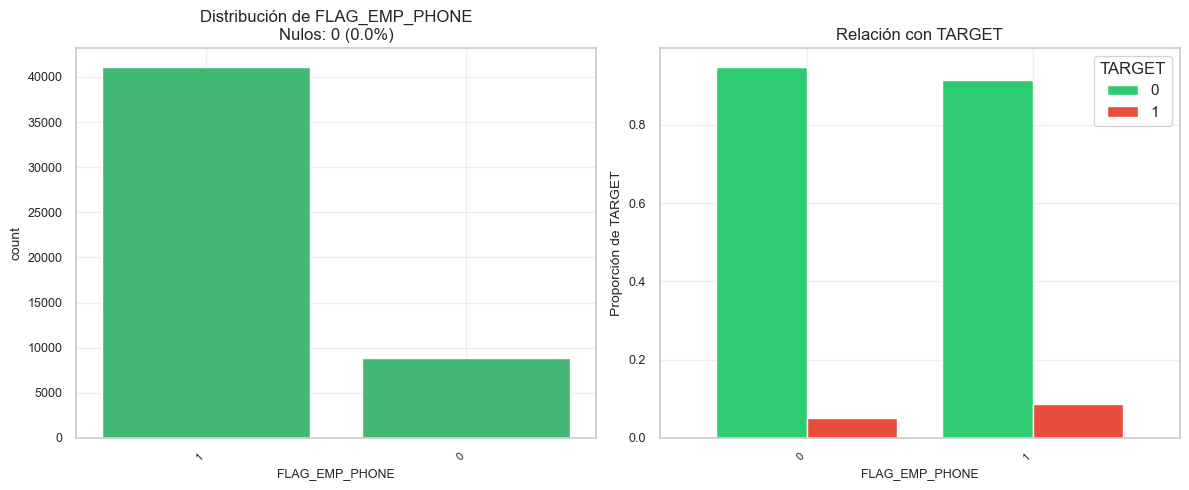

Error en FLAG_MOBIL: Length of passed values is 2, index implies 4.

Procesando lote 38 de 41


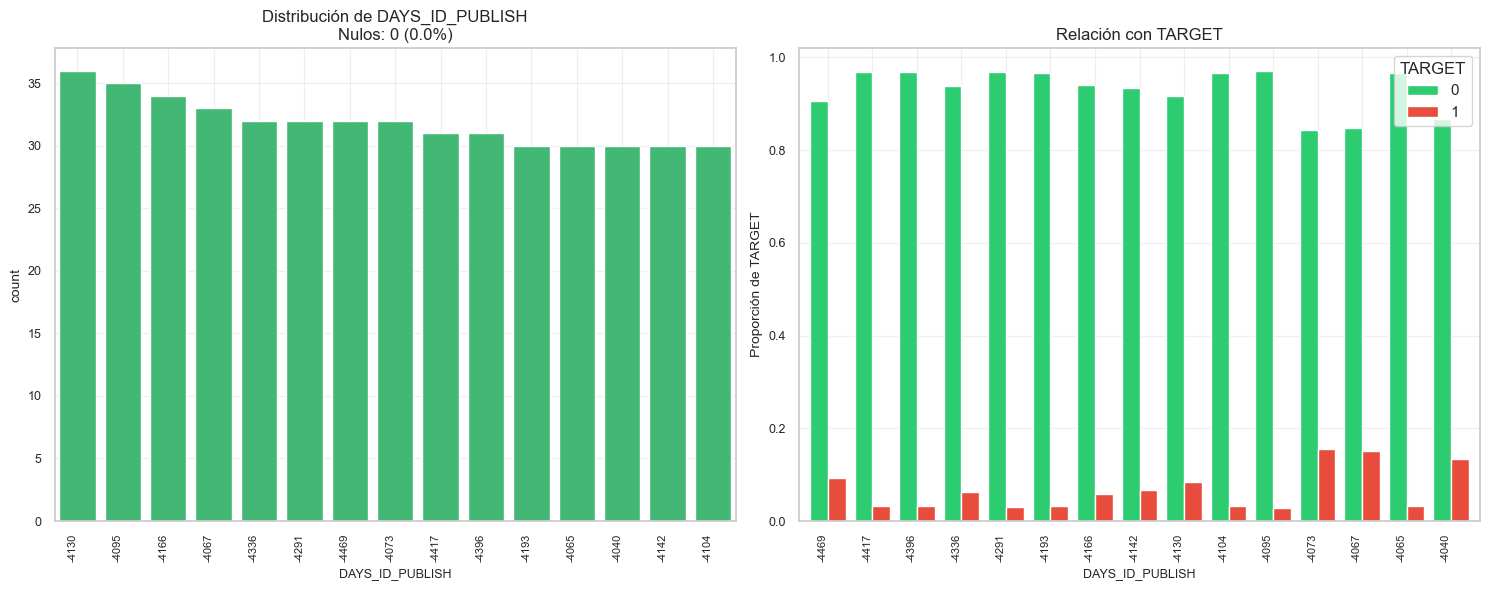

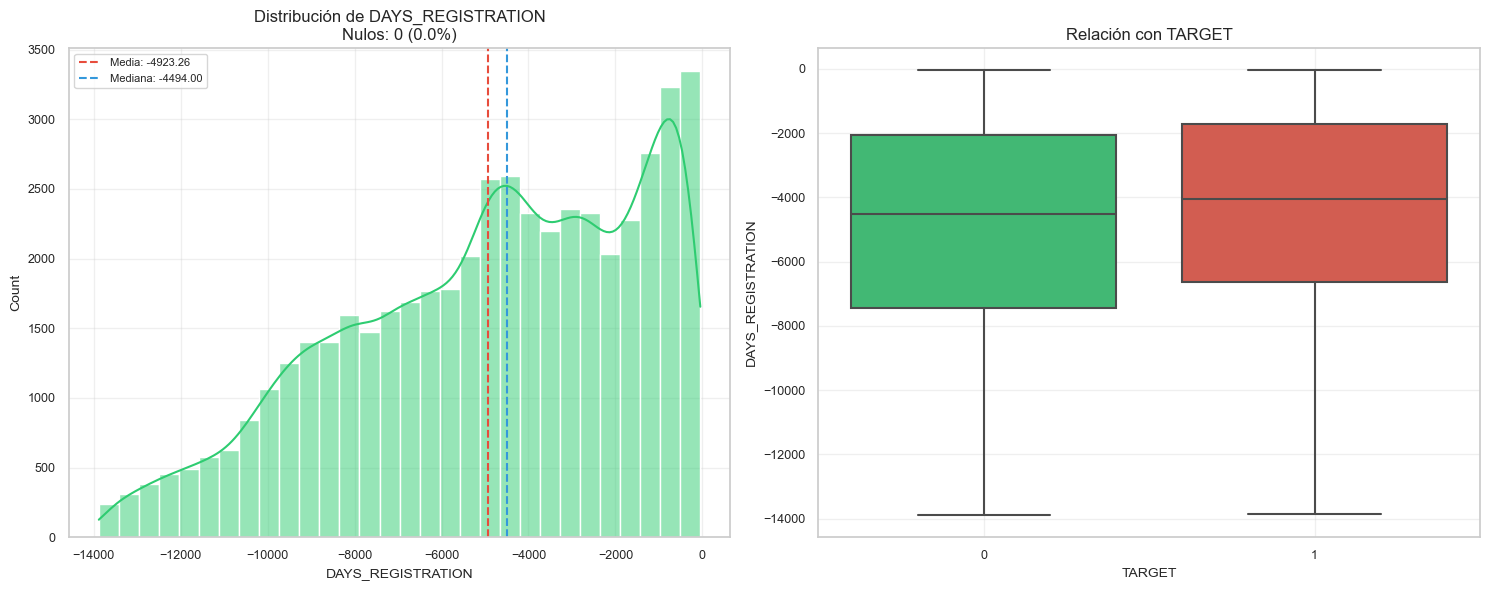

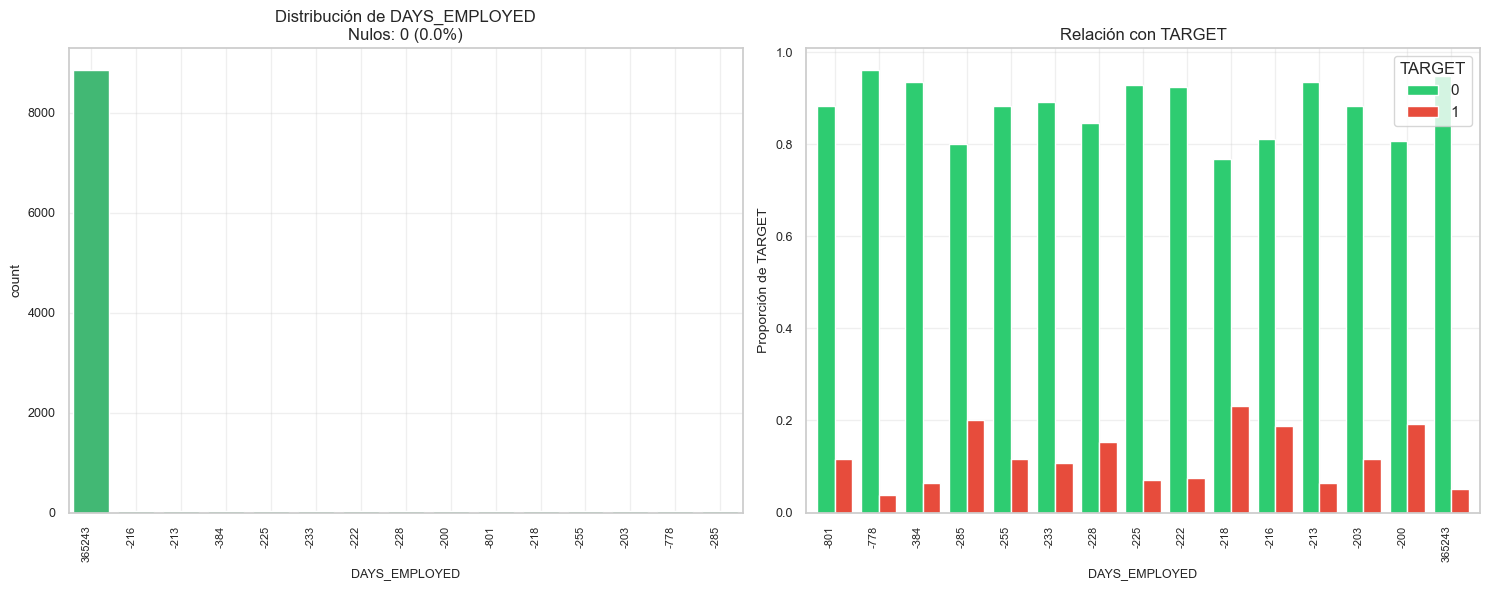


Procesando lote 39 de 41


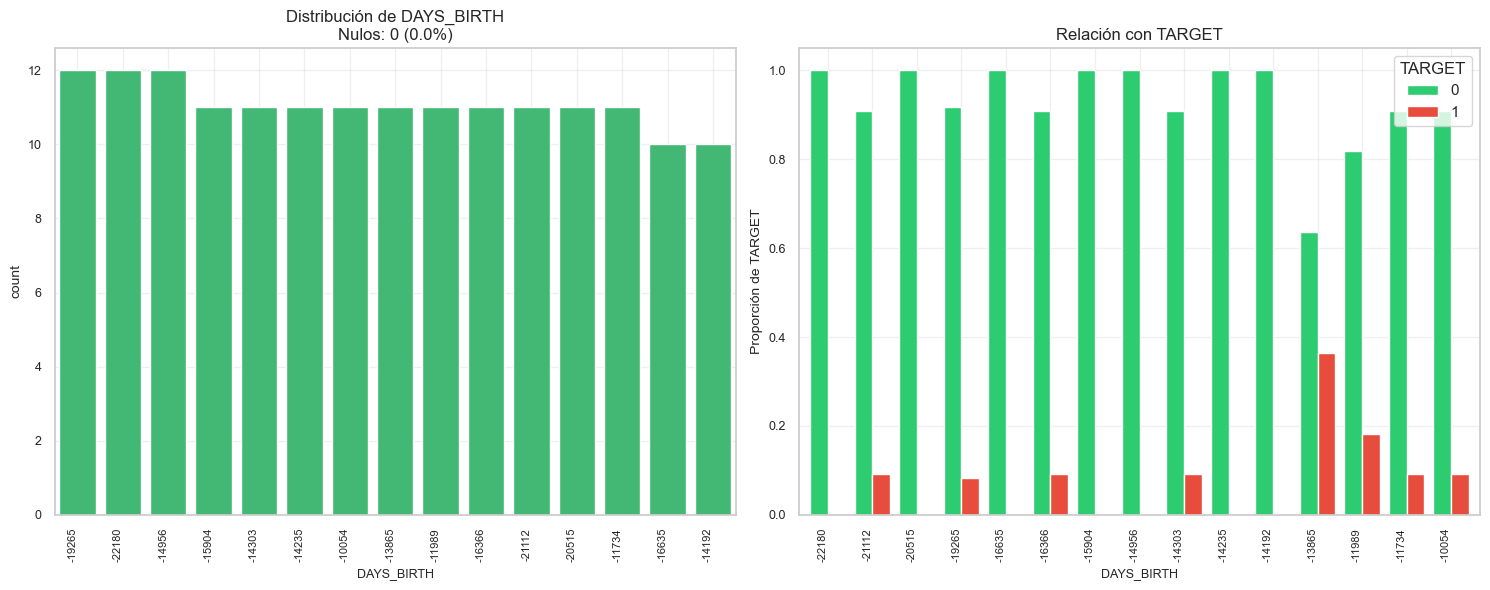

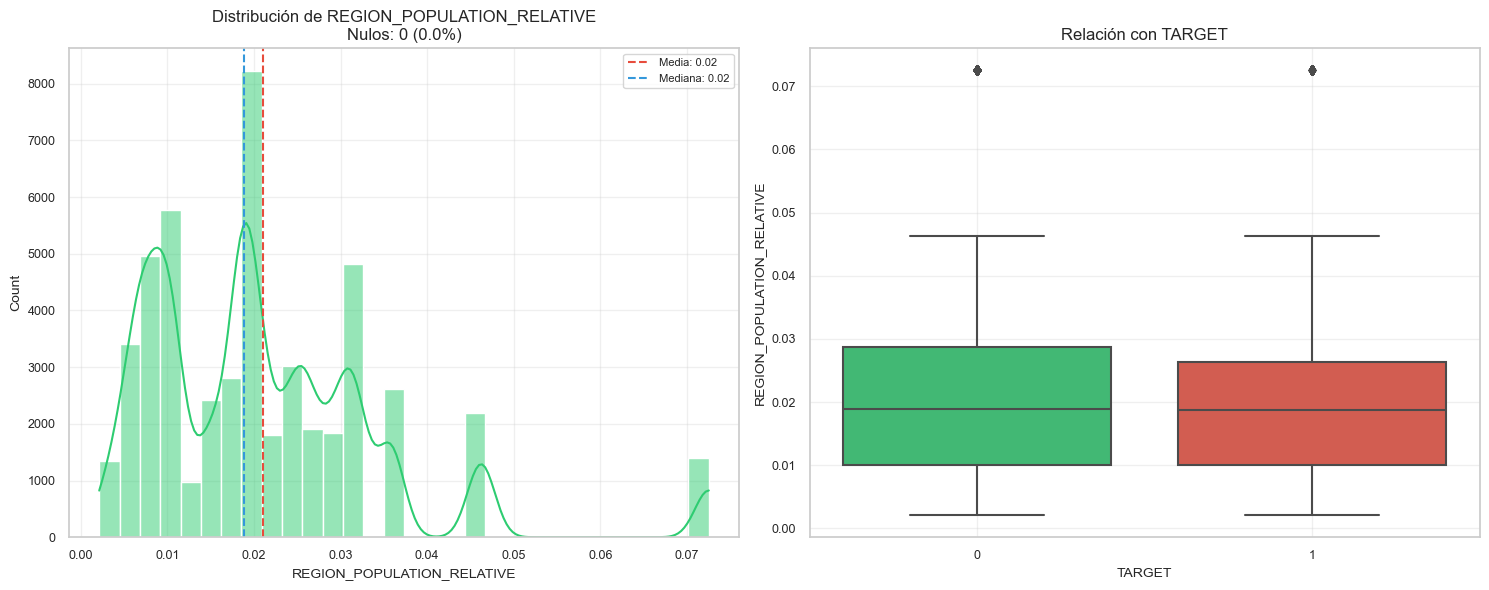

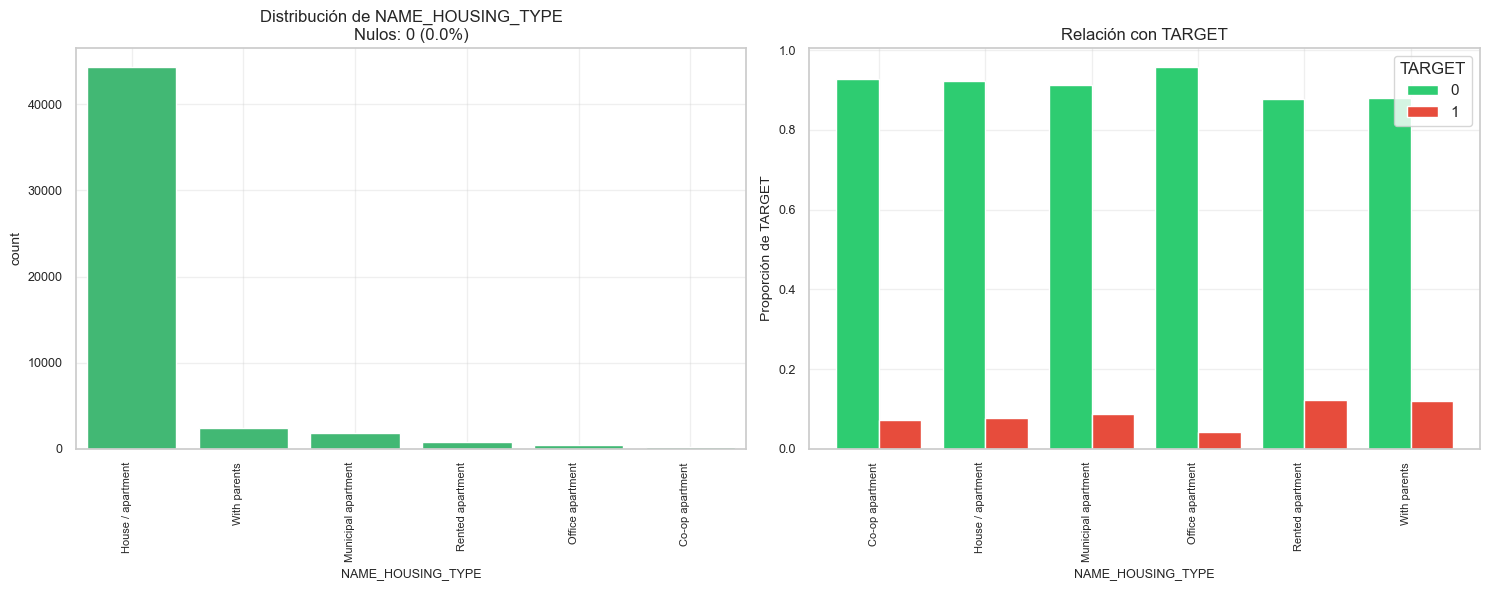


Procesando lote 40 de 41


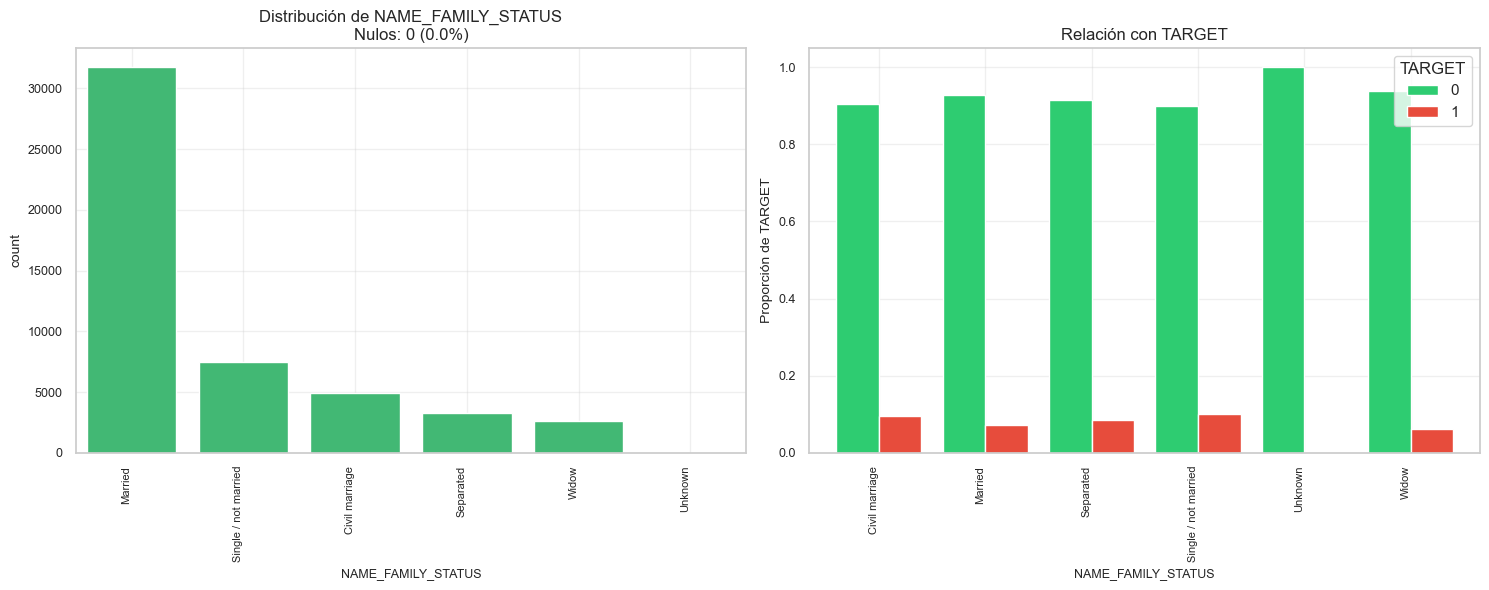

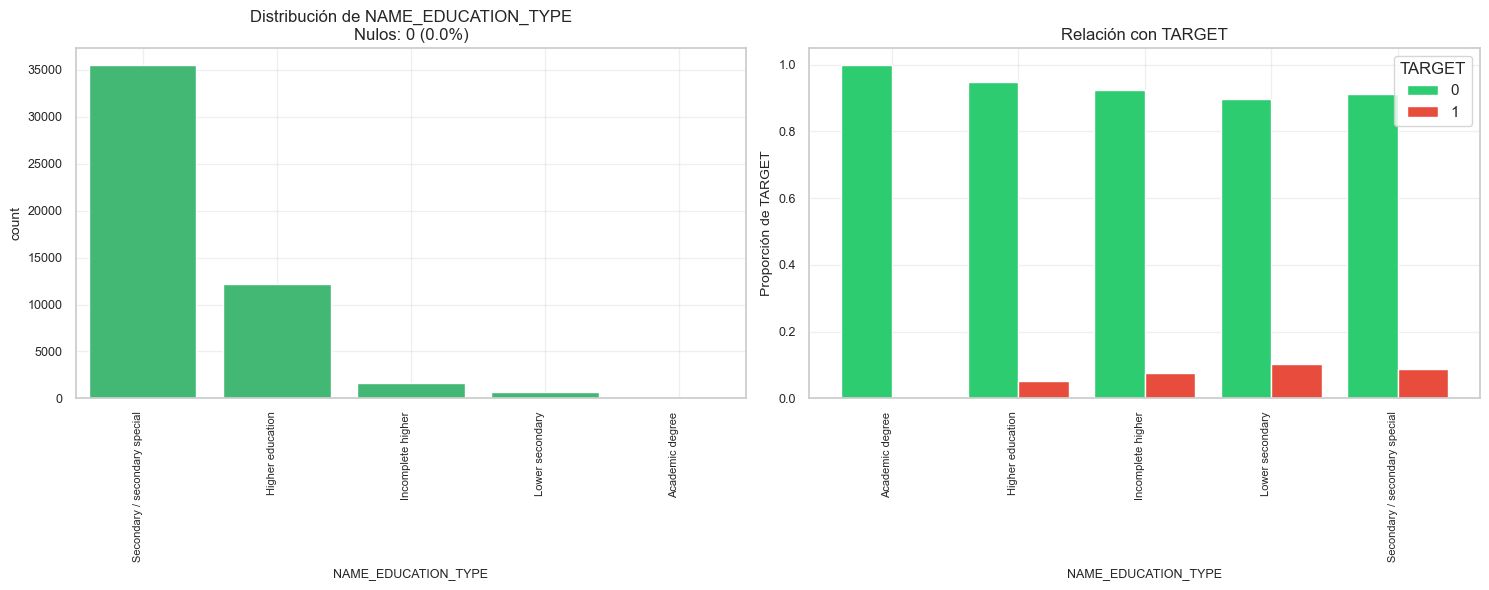

Error en NAME_INCOME_TYPE: operands could not be broadcast together with shape (8,) (7,)

Procesando lote 41 de 41


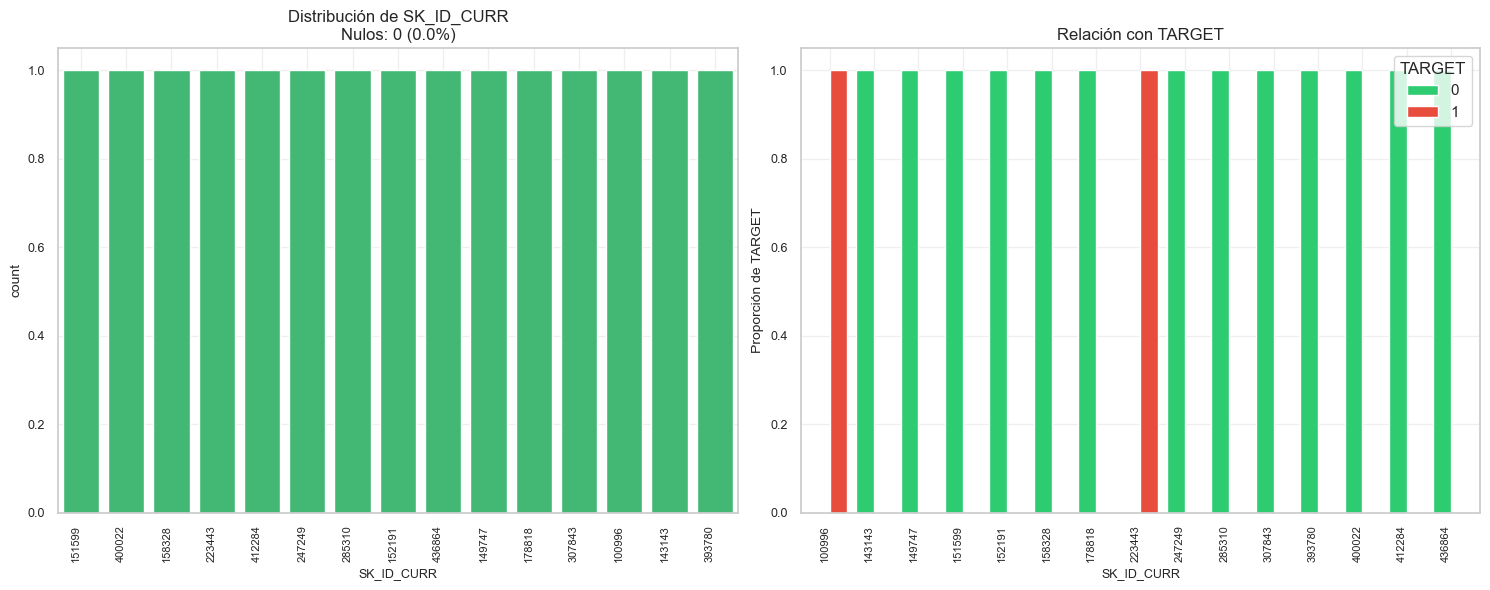


Proceso completado exitosamente.


In [136]:
# Ejecutar la visualización
plot_all_features(
    df=df_application_train,
    target_col='TARGET',
    batch_size=3,           # 3 gráficos por lote
    memory_threshold=85     # Limpiar memoria al 85%
)

## Análisis de los gráficos

El código establece el estilo de los gráficos y maximiza la utilización de la memoria al generar visualizaciones para cada elemento del dataset df_application_train. La función plot_feature produce gráficos concretos basados en la categoría de variable (continua o categórica) y proporciona una perspectiva minuciosa de la distribución de cada característica y su vínculo con la variable meta (TARGET). Esto comprende diagramas de distribución y boxplots para variables continuas, al igual que diagramas de conteo y proporciones para variables categóricas. Mediante el uso de una gama de colores a medida y la modificación automática del tamaño de las figuras, se garantiza que las visualizaciones sean nítidas y entendibles.

La función principal plot_all_features gestiona el análisis por lotes, facilitando el procesamiento y visualización de grandes datasets sin saturar la memoria del sistema. Este método, mediante la comprobación del uso de memoria y la limpieza periódica de los recursos, garantiza que el análisis sea eficaz y sostenible. Adicionalmente, la selección de grandes datasets incrementa la rapidez y el desempeño del análisis sin comprometer la representatividad de los datos. 

Por último, se recalca que a partir de estos gráficos se puede analizar las distribuciones de las variables y su relación con la variable objetivo "TARGET". Entre los principales resultados se encuentra: 

* **EXT_SOURCE_1:** El gráfico de la variable EXT_SOURCE_1 revela que presenta una distribución bastante equilibrada con una leve tendencia hacia el valor medio. Además, los clientes con valores superiores en EXT_SOURCE_1 tienen una probabilidad menor de incurrir en el TARGET, es decir que los clientes con valores superiores en EXT_SOURCE_1 suelen tener un riesgo asociado más bajo, lo que indica que esta variable podría ser un indicador significativo para medir la probabilidad de cumplimiento de pagos.

* **NAME_CONTRACT_TYPE:** La gráfica de la variable NAME_CONTRACT_TYPE muestra que los "Cash loans" (préstamos en efectivo) son significativamente más comunes que los "Revolving loans" (créditos renovables). Los "Cash loans" son préstamos otorgados en una suma fija que los clientes deben devolver en cuotas preestablecidas, mientras que los "Revolving loans" permiten a los clientes retirar fondos hasta un límite acordado y pagar en función del monto utilizado. A partir de esto, de acuerdo con la variable objetivo se comprueba que es más usual tener un retraso en el pago del préstamo en "cash loans", lo cual se puede deber a que estos préstamos suelen ser por montos más grandes y específicos, lo que puede representar una carga financiera más significativa para el prestatario. Por su parte,  en los "revolving loans", el prestatario solo está obligado a pagar un mínimo cada mes, lo que puede incentivar un pago más regular, aunque sea pequeño.

* **NAME_EDUCATION_TYPE:** Los datos indican que los individuos con grados de educación superior tienen menos tendencia a postergar los pagos de los préstamos. Primero, en los pagos aplazados (1 en rojo), se nota una reducción considerable en la proporción de los pagos aplazados conforme se eleva el nivel de educación. Por ejemplo, los individuos con educación superior y grado académico presentan una proporción significativamente inferior de pagos demorados en comparación con los que poseen "Secondary / secondary especial" o "Lower secondary".  En contraste, en los pagos sin demora (0 en verde), la proporción de pagos sin demora se incrementa con grados educativos superiores, lo que indica una correlación positiva entre el pago y la formación académica.

* **DAYS_EMPLOYED:** El gráfico de la variable DAYS_EMPLOYED indica que conforme se incrementa la cantidad de días empleados, la proporción de clientes con TARGET equivalente a 0 también se incrementa de manera notable. Esto es comprensible ya que los individuos que han estado trabajando durante un periodo prolongado suelen poseer una mayor estabilidad económica y un ingreso constante, lo que disminuye la probabilidad de incumplimiento de pagos. Además, las capacidades y experiencia obtenidas durante un trabajo extendido pueden convertirse en mejores oportunidades de empleo y una mayor habilidad para gestionar deudas.

* **AMT_CREDIT:** La gráfica de la variable AMT_CREDIT indica que las cantidades de crédito generalmente se encuentran en un rango de bajo a medio, con picos en determinados intervalos que representan los valores más habituales. Los clientes que no enfrentan dificultades de pago (TARGET=0) suelen poseer créditos más elevados y repartidos en una gama más extensa en contraste con los que tienen dificultades de pago (TARGET=1). Esto indica que los clientes con créditos más elevados, probablemente debido a condiciones financieras más favorables, tienen menos posibilidad de no cumplir con sus obligaciones de pago.
  
* **AMT_INCOME_TOTAL:** El gráfico de la variable AMT_INCOME_TOTAL indica que la mayor parte de los ingresos totales de las personas se sitúan en un intervalo de bajo a medio. El promedio de los ingresos se sitúa cerca de 185,838.27, mientras que la mediana es de 144,000. Esto señala que existen algunas personas con ingresos considerablemente elevados que superan el promedio. En relación con la variable TARGET, el diagrama de caja (boxplot) muestra que las personas sin dificultades de pago (TARGET=0) suelen tener ingresos más elevados y repartidos en un espectro más extenso en contraste con las que tienen dificultades de pago (TARGET=1). Esto indica que los clientes con ingresos superiores tienen una probabilidad reducida de incumplir con sus pagos, posiblemente debido a una mayor estabilidad económica.
      
* **NAME_HOUSING_TYPE:** A partir del gráfico, se analiza que la variable NAME_HOUSING_TYPE exhibe la distribución de los diferentes tipos de vivienda y su vínculo con la variable TARGET. El diagrama a la izquierda muestra que "House / apartment" es la categoría de vivienda más habitual, con más de 40,000 casos, seguida por "With parents" y otras categorías menos comunes como "Municipal apartment" y "Rented apartment". El gráfico de la derecha resalta que los dos grupos con las proporciones más elevadas de clientes con dificultades de pago (TARGET=1) son "Apartamento alquilado" y "Con padres", lo que indica que residir en apartamentos alquilados o con padres podría estar vinculado a una mayor posibilidad de incumplimiento de pagos, probablemente debido a una estabilidad financiera inferior a la de aquellos que poseen o alquilan viviendas de otro tipo.

## - Tratamiento de las variables continuas
A continuación, se tratan los valores missing, las correlaciones de las variables continuas y los outlier.

In [139]:
list_var_continuous

['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'APARTMENTS_MODE',
 'ENTRANCES_MEDI',
 'ENTRANCES_AVG',
 'ENTRANCES_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_AVG',
 'TOTALAREA_MODE',
 'EXT_SOURCE_3',
 'AMT_REQ_CREDIT_BURE

## Tratamiento de outliers

Los valores outlier se pueden sustituir por la media, mediana, valores extremos (media+3std o media-3std). Tras el siguiente análisis, hemos decidido como primera iteración dejarlos sin sustituir. Una vez llegue al modelo se pueden realizar iteraciones utilizando diferentes métodos para comprobar si esto mejora el modelo.

In [141]:
f_aux.get_deviation_of_mean_perc(df_application_train, list_var_continuous, target='TARGET', multiplier=3)

0.0       1.0                      variable  sum_outlier_values  \
0   0.943844  0.056156               COMMONAREA_MEDI                1389   
1   0.944767  0.055233                COMMONAREA_AVG                1376   
2   0.939839  0.060161               COMMONAREA_MODE                1363   
3   0.926554  0.073446      NONLIVINGAPARTMENTS_MODE                 531   
4   0.932743  0.067257       NONLIVINGAPARTMENTS_AVG                 565   
5   0.930728  0.069272      NONLIVINGAPARTMENTS_MEDI                 563   
6   0.944095  0.055905         LIVINGAPARTMENTS_MODE                1431   
7   0.948313  0.051687          LIVINGAPARTMENTS_AVG                1393   
8   0.947820  0.052180         LIVINGAPARTMENTS_MEDI                1399   
9   0.970588  0.029412                 FLOORSMIN_AVG                 476   
10  0.971429  0.028571                FLOORSMIN_MODE                 385   
11  0.970852  0.029148                FLOORSMIN_MEDI                 446   
12  0.922280  0.077720              YEARS_BUILD_MEDI                 965   
13  0.922441  0.077559              YEARS_BUILD_MODE                 967   
14  0.921466  0.078534               YEARS_BUILD_AVG                 955   
15  0.916479  0.083521                   OWN_CAR_AGE                2670   
16  0.938596  0.061404                 LANDAREA_MEDI                1710   
17  0.935972  0.064028                 LANDAREA_MODE                1718   
18  0.935252  0.064748                  LANDAREA_AVG                1668   
19  0.947937  0.052063             BASEMENTAREA_MEDI                1575   
20  0.949077  0.050923              BASEMENTAREA_AVG                1571   
21  0.944745  0.055255             BASEMENTAREA_MODE                1665   
22  0.949058  0.050942            NONLIVINGAREA_MODE                1963   
23  0.948454  0.051546             NONLIVINGAREA_AVG                1940   
24  0.948692  0.051308            NONLIVINGAREA_MEDI                1949   
25  0.953981  0.046019                ELEVATORS_MEDI                1934   
26  0.953775  0.046225                 ELEVATORS_AVG                1947   
27  0.949329  0.050671                ELEVATORS_MODE                2684   
28  0.949979  0.050021               APARTMENTS_MEDI                2419   
29  0.950358  0.049642                APARTMENTS_AVG                2377   
30  0.948505  0.051495               APARTMENTS_MODE                2408   
31  0.938582  0.061418                ENTRANCES_MEDI                1791   
32  0.938833  0.061167                 ENTRANCES_AVG                1782   
33  0.938244  0.061756                ENTRANCES_MODE                1765   
34  0.947904  0.052096                LIVINGAREA_AVG                2553   
35  0.945673  0.054327               LIVINGAREA_MODE                2669   
36  0.948968  0.051032               LIVINGAREA_MEDI                2567   
37  0.958768  0.041232                FLOORSMAX_MODE                2110   
38  0.957515  0.042485                FLOORSMAX_MEDI                2189   
39  0.957355  0.042645                 FLOORSMAX_AVG                2087   
40  0.915414  0.084586  YEARS_BEGINEXPLUATATION_MODE                 532   
41  0.913386  0.086614  YEARS_BEGINEXPLUATATION_MEDI                 508   
42  0.917431  0.082569   YEARS_BEGINEXPLUATATION_AVG                 545   
43  0.956044  0.043956                TOTALAREA_MODE                2639   
44  0.915881  0.084119    AMT_REQ_CREDIT_BUREAU_HOUR                1272   
45  0.905772  0.094228     AMT_REQ_CREDIT_BUREAU_DAY                1178   
46  0.921827  0.078173    AMT_REQ_CREDIT_BUREAU_WEEK                6831   
47  0.948478  0.051522     AMT_REQ_CREDIT_BUREAU_MON                2562   
48  0.917163  0.082837     AMT_REQ_CREDIT_BUREAU_QRT                1847   
49  0.911004  0.088996    AMT_REQ_CREDIT_BUREAU_YEAR                2708   
50  0.911224  0.088776      OBS_30_CNT_SOCIAL_CIRCLE                4900   
51  0.878288  0.121712      DEF_30_CNT_SOCIAL_CIRCLE     

#### Distribución entre clases:

- Variables como DEF_30_CNT_SOCIAL_CIRCLE y DEF_60_CNT_SOCIAL_CIRCLE muestran proporciones elevadas en la clase 1.0 (11.7% y 12.6%, respectivamente), sugiriendo que son indicadores relevantes de riesgo crediticio. La alta presencia de valores en la clase 1.0 indica que los clientes con mayores valores en estas variables tienen una mayor probabilidad de incumplir con los pagos. Esto refuerza la necesidad de monitorear de cerca estos indicadores para mitigar el riesgo crediticio.

#### Valores Atípicos (Outliers):

- Variables como COMMONAREA_MEDI, COMMONAREA_AVG, y COMMONAREA_MODE presentan un número considerable de valores atípicos:

* COMMONAREA_MEDI: 1364 valores atípicos (0.55% de los datos totales).

* COMMONAREA_AVG: 1353 valores atípicos (0.55% de los datos totales).

* COMMONAREA_MODE: 1350 valores atípicos (0.54% de los datos totales).

- Otras variables con niveles significativos de outliers incluyen:

* LIVINGAPARTMENTS_MODE: 1425 valores atípicos (0.57%).

* YEARS_BUILD_MEDI: 968 valores atípicos (0.39%).

* OWN_CAR_AGE: 2705 valores atípicos (1.09%).

Esta variabilidad sugiere la necesidad de aplicar transformaciones de datos para normalizar las distribuciones y mejorar la precisión de los modelos predictivos.
  
#### Porcentaje de Valores Nulos:

Algunas variables presentan un porcentaje significativo de valores nulos:

* OWN_CAR_AGE: 1.09% de valores nulos.

* AMT_REQ_CREDIT_BUREAU_HOUR: 0.52% de valores nulos.

* OBS_30_CNT_SOCIAL_CIRCLE: 2.01% de valores nulos.

Es crucial manejar estos valores nulos mediante imputación o eliminación, dependiendo de la importancia de la variable en el análisis. Las técnicas de imputación pueden incluir la media, la mediana, o el uso de diversos algoritmos.
  
#### Variables Clave para el Riesgo:

- Variables como OBS_30_CNT_SOCIAL_CIRCLE (8.8% en la clase 1.0) y AMT_REQ_CREDIT_BUREAU_YEAR (9.3%) son indicadores clave del comportamiento de pago. Estos predictores necesitan un manejo adecuado de los valores nulos y atípicos para garantizar su eficacia en los modelos de riesgo crediticio.

## Correlaciones

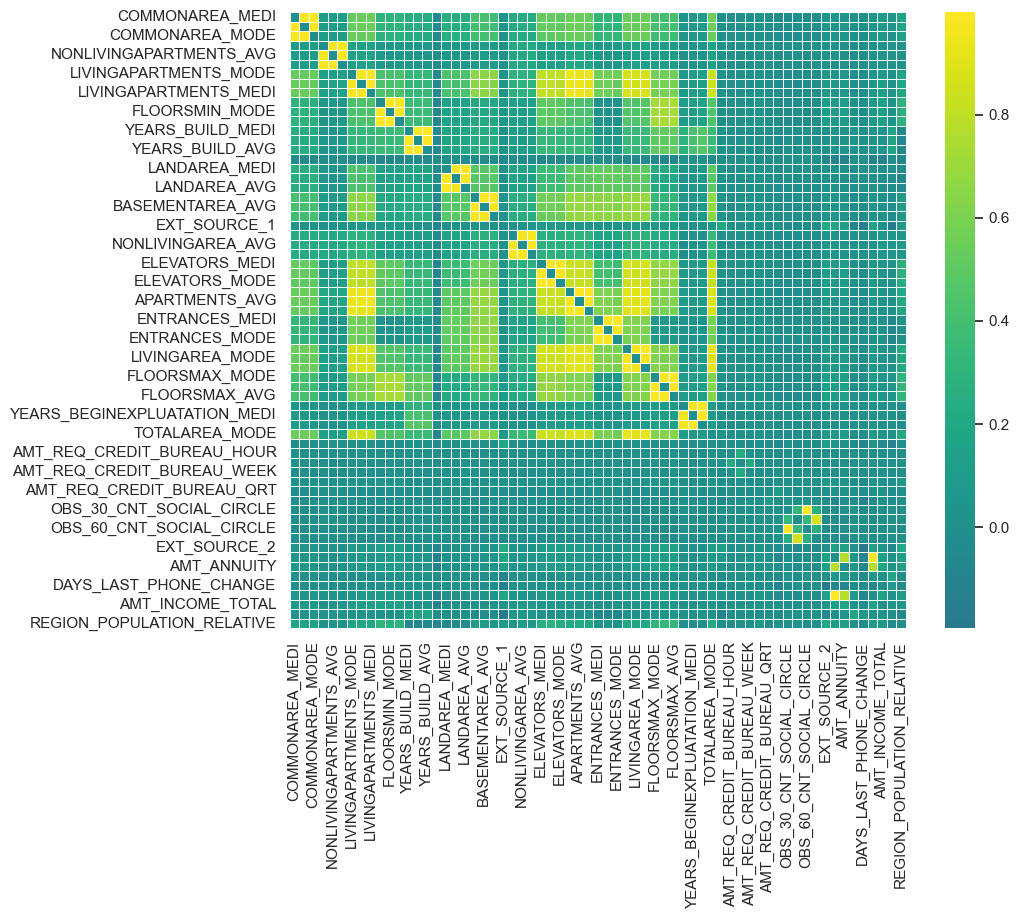

0

In [144]:
f_aux.get_corr_matrix(dataset = df_application_train[list_var_continuous], 
                metodo='pearson', size_figure=[10,8])

## Análisis de la matriz de correlación

Analizando la matriz de correlación del conjunto de datos BAF, se observa un patrón significativo de correlaciones moderadas a fuertes (valores entre 0.4 y 0.8) entre las variables relacionadas con las características de los apartamentos y áreas comunes (COMMONAREA_MEDI, LIVINGAPARTMENTS_MODE, NONLIVINGAPARTMENTS_AVG). Esto sugiere una estructura coherente en la forma en que las propiedades están organizadas y documentadas en el sistema bancario, lo cual es relevante para la detección de patrones potencialmente fraudulentos. Asimismo, variables como COMMONAREA_MEDI y COMMONAREA_MODE, y YEARS_BUILD_MEDI y YEARS_BUILD_AVG, presentan altas correlaciones. Esta redundancia sugiere que pueden capturar información similar, lo cual es útil para simplificar el modelo eliminando o combinando estas variables, según el análisis . 

Por otra parte, las variables relacionadas con información crediticia y financiera (AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_WEEK, OBS_30_CNT_SOCIAL_CIRCLE) muestran correlaciones débiles entre sí (valores cercanos a 0), lo que indica independencia en los diferentes aspectos del comportamiento financiero de los clientes. Esta independencia es particularmente valiosa para los modelos de detección de fraude, ya que permite capturar diferentes dimensiones del riesgo sin redundancia informativa.

In [146]:
corr = df_application_train[list_var_continuous].corr('pearson')
new_corr = corr.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1) # below main lower triangle of an array
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)
new_corr[new_corr['correlation']>0.6]

level_0                       level_1  correlation
3562      OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE     0.998500
922                YEARS_BUILD_AVG              YEARS_BUILD_MEDI     0.998419
724                 FLOORSMIN_MEDI                 FLOORSMIN_AVG     0.997352
2639                 FLOORSMAX_AVG                FLOORSMAX_MEDI     0.997141
2177                 ENTRANCES_AVG                ENTRANCES_MEDI     0.996948
1781                 ELEVATORS_AVG                ELEVATORS_MEDI     0.996008
65                  COMMONAREA_AVG               COMMONAREA_MEDI     0.995816
2440               LIVINGAREA_MEDI                LIVINGAREA_AVG     0.995450
1979                APARTMENTS_AVG               APARTMENTS_MEDI     0.995270
527          LIVINGAPARTMENTS_MEDI          LIVINGAPARTMENTS_AVG     0.994466
1319              BASEMENTAREA_AVG             BASEMENTAREA_MEDI     0.994035
2837   YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MEDI     0.993125
1649            NONLIVINGAREA_MEDI             NONLIVINGAREA_AVG     0.991649
1186                  LANDAREA_AVG                 LANDAREA_MEDI     0.991599
329       NONLIVINGAPARTMENTS_MEDI       NONLIVINGAPARTMENTS_AVG     0.990498
923                YEARS_BUILD_AVG              YEARS_BUILD_MODE     0.989127
857               YEARS_BUILD_MODE              YEARS_BUILD_MEDI     0.989118
725                 FLOORSMIN_MEDI                FLOORSMIN_MODE     0.988433
2573                FLOORSMAX_MEDI                FLOORSMAX_MODE     0.988204
4022                    AMT_CREDIT               AMT_GOODS_PRICE     0.986997
659                 FLOORSMIN_MODE                 FLOORSMIN_AVG     0.986046
2638                 FLOORSMAX_AVG                FLOORSMAX_MODE     0.985710
1846                ELEVATORS_MODE                ELEVATORS_MEDI     0.982707
1121                 LANDAREA_MODE                 LANDAREA_MEDI     0.980788
2242                ENTRANCES_MODE                ENTRANCES_MEDI     0.980273
130                COMMONAREA_MODE               COMMONAREA_MEDI     0.979032
1847                ELEVATORS_MODE                 ELEVATORS_AVG     0.978604
2243                ENTRANCES_MODE                 ENTRANCES_AVG     0.977388
2044               APARTMENTS_MODE               APARTMENTS_MEDI     0.977085
328       NONLIVINGAPARTMENTS_MEDI      NONLIVINGAPARTMENTS_MODE     0.977053
1384             BASEMENTAREA_MODE             BASEMENTAREA_MEDI     0.976871
131                COMMONAREA_MODE                COMMONAREA_AVG     0.976245
526          LIVINGAPARTMENTS_MEDI         LIVINGAPARTMENTS_MODE     0.975746
1648            NONLIVINGAREA_MEDI            NONLIVINGAREA_MODE     0.975426
2441               LIVINGAREA_MEDI               LIVINGAREA_MODE     0.974965
2045               APARTMENTS_MODE                APARTMENTS_AVG     0.973294
1187                  LANDAREA_AVG                 LANDAREA_MODE     0.973156
2375               LIVINGAREA_MODE                LIVINGAREA_AVG     0.972183
1385             BASEMENTAREA_MODE              BASEMENTAREA_AVG     0.972080
461           LIVINGAPARTMENTS_AVG         LIVINGAPARTMENTS_MODE     0.970693
2836   YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MODE     0.970327
263        NONLIVINGAPARTMENTS_AVG      NONLIVINGAPARTMENTS_MODE     0.967621
1583             NONLIVINGAREA_AVG            NONLIVINGAREA_MODE     0.967063
2771  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE     0.960662
1957                APARTMENTS_AVG          LIVINGAPARTMENTS_AVG     0.944185
1958                APARTMENTS_AVG         LIVINGAPARTMENTS_MEDI     0.942998
1893               APARTMENTS_MEDI         LIVINGAPARTMENTS_MEDI     0.942776
2021               APARTMENTS_MODE         LIVINGAPARTMENTS_MODE     0.939285
1892               APARTMENTS_MEDI          LIVINGAPARTMENTS_AVG     0.936461
1891               APARTMENTS_MEDI         LIVINGAPARTMENTS_MODE     0.933201
1956                APARTMENTS_AVG         LIVING

* ### Variables con correlación extremadamente alta (> 0.99):

OBS_60_CNT_SOCIAL_CIRCLE y OBS_30_CNT_SOCIAL_CIRCLE (0.9985): Estas dos variables probablemente representan conteos de observaciones sociales en diferentes intervalos de tiempo (60 y 30 días), lo cual indica una relación cercana ya que están midiendo algo muy similar. Podría ser redundante conservar ambas variables, y se podría eliminar una para reducir la multicolinealidad. Otros ejemplos con correlaciones cercanas a 1 incluyen pares como YEARS_BUILD_AVG y YEARS_BUILD_MEDI (0.9984), y FLOORSMIN_MEDI y FLOORSMIN_AVG (0.9971), que también sugieren duplicidad en la información.

* ### Variables de medidas promedio y mediana (AVG y MEDI):

Las variables con sufijos AVG, MEDI y MODE (promedio, mediana y moda) de características similares como FLOORSMAX, LIVINGAREA, APARTMENTS, ELEVATORS, etc., tienden a tener una alta correlación entre sí. A partir de esto se puede analizar que, en muchas casos, la media, mediana y moda de estas características tienden a ser valores cercanos. Por ejemplo, ENTRANCES_AVG y ENTRANCES_MEDI tienen una correlación de 0.9968. En estos casos, se podría optar por seleccionar solo una de estas variables representativas (como AVG o MEDI) para reducir la redundancia sin perder información significativa.

* ### Relación entre área y otras variables estructurales:

LIVINGAREA, BASEMENTAREA, y APARTMENTS están muy correlacionadas entre sí. Por ejemplo, LIVINGAREA_MEDI y APARTMENTS_MEDI tienen una correlación de 0.9158. Esto sugiere que los tamaños de áreas habitables y apartamentos suelen estar alineados.La alta correlación entre estas áreas y otras variables estructurales puede indicar que las características de tamaño y espacio tienen un comportamiento consistente en los registros, algo que es útil para el análisis de propiedades o evaluaciones.

* ### Total Area vs. Componentes individuales:

TOTALAREA_MODE está altamente correlacionado con otras áreas específicas como LIVINGAREA y APARTMENTS, indicando que el área total tiende a ser una combinación directa de estas variables. Por ejemplo, TOTALAREA_MODE y LIVINGAREA_AVG tienen una correlación de 0.9263. Es probable que TOTALAREA_MODE esté estrechamente relacionada con las áreas individuales, por lo que es necesario hacer un estudio para determinar el valor de cada una de estas áreas en el presente análisis.

### Posible problema de multicolinealidad:

La alta correlación entre estas variables genera un problema conocido como multicolinealidad. Esto significa que las variables están tan estrechamente relacionadas que es difícil determinar el efecto único de cada una sobre la variable dependiente en un modelo de regresión. Para resolver este problema, se pueden aplicar técnicas como el Análisis de Componentes Principales (PCA) o eliminar algunas de las variables altamente correlacionadas.

Por último, decidimos en esta primera iteración, no eliminar correlaciones. Sin embargo, si al final se aplica algún algoritmo que lo requiera, se eliminarán las correlaciones correspondientes.

## Tratamiento de valores nulos

En este apartado se van a considerar las siguientes preguntas ¿Son todos los nulos de una clase de la variable objetivo? o ¿Tienen el mismo porcentaje de la variable objetivo?

In [149]:
list_var_continuous

['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'APARTMENTS_MODE',
 'ENTRANCES_MEDI',
 'ENTRANCES_AVG',
 'ENTRANCES_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_AVG',
 'TOTALAREA_MODE',
 'EXT_SOURCE_3',
 'AMT_REQ_CREDIT_BURE

In [150]:
f_aux.get_percent_null_values_target(df_application_train, list_var_continuous, target='TARGET')

0.0       1.0                      variable  sum_null_values  \
0   0.914398  0.085602               COMMONAREA_MEDI           171830   
1   0.914398  0.085602                COMMONAREA_AVG           171830   
2   0.914398  0.085602               COMMONAREA_MODE           171830   
3   0.914308  0.085692      NONLIVINGAPARTMENTS_MODE           170798   
4   0.914308  0.085692       NONLIVINGAPARTMENTS_AVG           170798   
5   0.914308  0.085692      NONLIVINGAPARTMENTS_MEDI           170798   
6   0.913899  0.086101         LIVINGAPARTMENTS_MODE           168151   
7   0.913899  0.086101          LIVINGAPARTMENTS_AVG           168151   
8   0.913899  0.086101         LIVINGAPARTMENTS_MEDI           168151   
9   0.913850  0.086150                 FLOORSMIN_AVG           166871   
10  0.913850  0.086150                FLOORSMIN_MODE           166871   
11  0.913850  0.086150                FLOORSMIN_MEDI           166871   
12  0.913332  0.086668              YEARS_BUILD_MEDI           163544   
13  0.913332  0.086668              YEARS_BUILD_MODE           163544   
14  0.913332  0.086668               YEARS_BUILD_AVG           163544   
15  0.914944  0.085056                   OWN_CAR_AGE           162329   
16  0.911949  0.088051                 LANDAREA_MEDI           146029   
17  0.911949  0.088051                 LANDAREA_MODE           146029   
18  0.911949  0.088051                  LANDAREA_AVG           146029   
19  0.911016  0.088984             BASEMENTAREA_MEDI           143880   
20  0.911016  0.088984              BASEMENTAREA_AVG           143880   
21  0.911016  0.088984             BASEMENTAREA_MODE           143880   
22  0.914595  0.085405                  EXT_SOURCE_1           138528   
23  0.909864  0.090136            NONLIVINGAREA_MODE           135617   
24  0.909864  0.090136             NONLIVINGAREA_AVG           135617   
25  0.909864  0.090136            NONLIVINGAREA_MEDI           135617   
26  0.909222  0.090778                ELEVATORS_MEDI           131001   
27  0.909222  0.090778                 ELEVATORS_AVG           131001   
28  0.909222  0.090778                ELEVATORS_MODE           131001   
29  0.908756  0.091244               APARTMENTS_MEDI           124764   
30  0.908756  0.091244                APARTMENTS_AVG           124764   
31  0.908756  0.091244               APARTMENTS_MODE           124764   
32  0.908444  0.091556                ENTRANCES_MEDI           123739   
33  0.908444  0.091556                 ENTRANCES_AVG           123739   
34  0.908444  0.091556                ENTRANCES_MODE           123739   
35  0.908792  0.091208                LIVINGAREA_AVG           123356   
36  0.908792  0.091208               LIVINGAREA_MODE           123356   
37  0.908792  0.091208               LIVINGAREA_MEDI           123356   
38  0.908375  0.091625                FLOORSMAX_MODE           122325   
39  0.908375  0.091625                FLOORSMAX_MEDI           122325   
40  0.908375  0.091625                 FLOORSMAX_AVG           122325   
41  0.908192  0.091808  YEARS_BEGINEXPLUATATION_MODE           119935   
42  0.908192  0.091808  YEARS_BEGINEXPLUATATION_MEDI           119935   
43  0.908192  0.091808   YEARS_BEGINEXPLUATATION_AVG           119935   
44  0.907951  0.092049                TOTALAREA_MODE           118643   
45  0.907155  0.092845                  EXT_SOURCE_3            48974   
46  0.896709  0.103291    AMT_REQ_CREDIT_BUREAU_HOUR            33391   
47  0.896709  0.103291     AMT_REQ_CREDIT_BUREAU_DAY            33391   
48  0.896709  0.103291    AMT_REQ_CREDIT_BUREAU_WEEK            33391   
49  0.896709  0.103291     AMT_REQ_CREDIT_BUREAU_MON            33391   
50  0.896709  0.103291     AMT_REQ_CREDIT_BUREAU_QRT            33391   
51  0.896709  0.103291    AMT_REQ_CREDIT_BUREAU_YEAR            33391   
52  0.970443  0.029557      OBS_30_CNT_SOCIAL_CIRCLE              812   
53  0.970443  0.029557      DEF_30_CNT_SOCIAL_CIRCLE              8

## Técnicas para tratamiento de valores nulos

Cuando se enfrenta a la presencia de valores nulos en un conjunto de datos y no se tiene mucho contexto sobre las variables, se pueden considerar diferentes técnicas para manejarlos. A continuación se presentan varias opciones y sus explicaciones:

### Opción 0:
Algoritmos que Aceptan Valores Nulos Algunos algoritmos de machine learning pueden manejar de manera directa los valores nulos en su entrada. Esto significa que no es necesario realizar ninguna imputación o eliminación de datos nulos, ya que el algoritmo cuenta con mecanismos internos para tratar con la ausencia de valores.

### Opción 1:
Eliminar Filas con Valores Nulos Se puede optar por eliminar todas las filas que contienen valores nulos. Esta estrategia es simple y garantiza que solo se utilicen datos completos en el modelo. Sin embargo, no es óptima en conjuntos de datos donde muchas filas tienen valores nulos, ya que podría resultar en la pérdida de una cantidad significativa de información.

### Opción 2:
Imputación de Valores Nulos Otra opción es imputar los valores nulos utilizando diversas técnicas:

* media
* mediana
* maximo
* minimo
* valores extremos

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

Decidimos rellenar todas las columnas continuas menos revol_util por el valor -99. De esta manera, se diferencian los outlier del resto de la muestra poninendo un valor muy separado del resto de la variable. Se puede explorar el resultado del modelo utilizando diferentes métodos.

### Justificación

Rellenar las columnas continuas con un valor como -99 puede ser una estrategia efectiva para tratar los valores nulos, especialmente si se desea diferenciar claramente estos valores de los datos válidos. Aquí están algunas justificaciones y consideraciones para esta técnica:

* Diferenciación Clara de Valores Nulos: Al usar un valor extremo como -99, se asegura que los valores nulos sean claramente distinguibles del resto de los datos. Esto es particularmente útil en el preprocesamiento y en la fase de modelado, ya que los modelos pueden identificar fácilmente estos valores como especiales.

* Mantener la Completa Información del Conjunto de Datos: Esta técnica permite mantener todas las filas en el conjunto de datos, evitando la pérdida de información que podría ocurrir si se eliminan filas con valores nulos. Esto es crucial cuando se tiene un conjunto de datos limitado o cuando los valores nulos están distribuidos de manera significativa en el dataset.

* Flexibilidad para Modelos de Machine Learning: Muchos algoritmos de machine learning pueden manejar valores extremos de manera eficiente y, en algunos casos, pueden interpretar estos valores como indicadores adicionales. Esto puede ayudar a los modelos a aprender patrones adicionales sobre los datos.

* Simplificación del Preprocesamiento: Imputar todos los valores continuos nulos con un valor constante como -99 simplifica el proceso de preprocesamiento, haciéndolo más rápido y menos propenso a errores.
ostremos

COMMONAREA_MEDI                 0.698473
COMMONAREA_MODE                 0.698473
COMMONAREA_AVG                  0.698473
NONLIVINGAPARTMENTS_MODE        0.694278
NONLIVINGAPARTMENTS_MEDI        0.694278
NONLIVINGAPARTMENTS_AVG         0.694278
LIVINGAPARTMENTS_MODE           0.683518
LIVINGAPARTMENTS_AVG            0.683518
LIVINGAPARTMENTS_MEDI           0.683518
FLOORSMIN_AVG                   0.678315
FLOORSMIN_MODE                  0.678315
FLOORSMIN_MEDI                  0.678315
YEARS_BUILD_MEDI                0.664791
YEARS_BUILD_MODE                0.664791
YEARS_BUILD_AVG                 0.664791
OWN_CAR_AGE                     0.659853
LANDAREA_MODE                   0.593595
LANDAREA_AVG                    0.593595
LANDAREA_MEDI                   0.593595
BASEMENTAREA_MEDI               0.584859
BASEMENTAREA_AVG                0.584859
BASEMENTAREA_MODE               0.584859
EXT_SOURCE_1                    0.563104
NONLIVINGAREA_MODE              0.551271
NONLIVINGAREA_AV

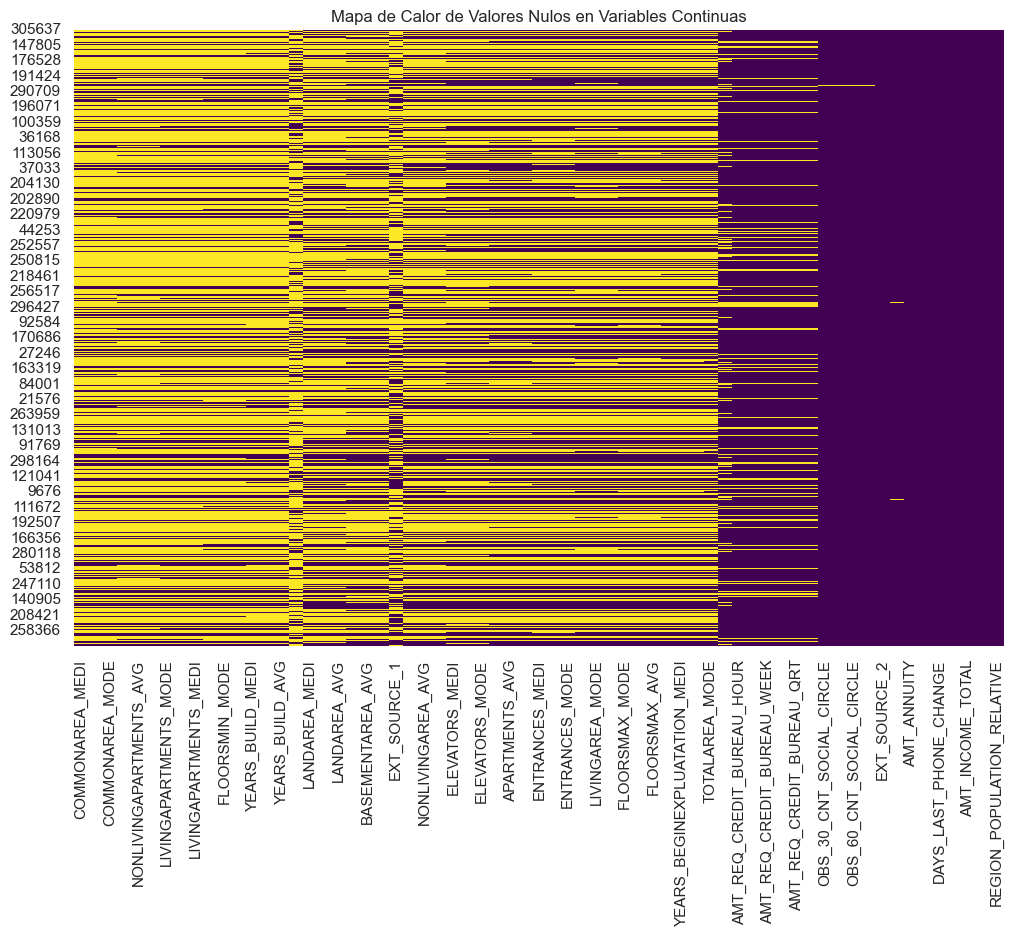

In [152]:
# Verificar valores nulos y su proporción
null_summary = df_application_train[list_var_continuous].isnull().mean().sort_values(ascending=False)
print(null_summary)

# Visualizar la distribución de los valores nulos
plt.figure(figsize=(12, 8))
sns.heatmap(df_application_train[list_var_continuous].isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Nulos en Variables Continuas')
plt.show()

In [153]:
# Suponiendo que df_application_train y df_application_test son tus DataFrames originales
df_application_input_train = df_application_train.copy()
df_application_input_test = df_application_test.copy()

# Definir la lista de variables continuas excluyendo la variable objetivo
list_var_continuous = [col for col in df_application_input_train.columns if df_application_input_train[col].dtype in ['float64', 'int64'] and col != 'TARGET']

# Definir las columnas que no deben ser tocadas (protegidas)
protected_columns = ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 
                     'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 
                     'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

# Excluir estas columnas de la lista de imputación
list_vars_to_impute = [col for col in list_var_continuous if col not in protected_columns]

# Imputar valores nulos con -99 en las variables seleccionadas
df_application_input_train[list_vars_to_impute] = df_application_input_train[list_vars_to_impute].fillna(-99)
df_application_input_test[list_vars_to_impute] = df_application_input_test[list_vars_to_impute].fillna(-99)

# Verificar los resultados
print("Valores nulos en las columnas seleccionadas del conjunto de entrenamiento:")
print(df_application_input_train[list_vars_to_impute].isnull().sum())

print("Valores nulos en las columnas seleccionadas del conjunto de prueba:")
print(df_application_input_test[list_vars_to_impute].isnull().sum())

Valores nulos en las columnas seleccionadas del conjunto de entrenamiento:
COMMONAREA_MEDI                 0
COMMONAREA_AVG                  0
COMMONAREA_MODE                 0
NONLIVINGAPARTMENTS_MODE        0
NONLIVINGAPARTMENTS_AVG         0
NONLIVINGAPARTMENTS_MEDI        0
LIVINGAPARTMENTS_MODE           0
LIVINGAPARTMENTS_AVG            0
LIVINGAPARTMENTS_MEDI           0
FLOORSMIN_AVG                   0
FLOORSMIN_MODE                  0
FLOORSMIN_MEDI                  0
YEARS_BUILD_MEDI                0
YEARS_BUILD_MODE                0
YEARS_BUILD_AVG                 0
LANDAREA_MEDI                   0
LANDAREA_MODE                   0
LANDAREA_AVG                    0
BASEMENTAREA_MEDI               0
BASEMENTAREA_AVG                0
BASEMENTAREA_MODE               0
NONLIVINGAREA_MODE              0
NONLIVINGAREA_AVG               0
NONLIVINGAREA_MEDI              0
ELEVATORS_MEDI                  0
ELEVATORS_AVG                   0
ELEVATORS_MODE                  0
APARTME

In [154]:
list_vars_to_impute

['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_AVG',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'APARTMENTS_MODE',
 'ENTRANCES_MEDI',
 'ENTRANCES_AVG',
 'ENTRANCES_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_AVG',
 'TOTALAREA_MODE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_

In [155]:
print(df_application_train.columns)

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI',
       ...
       'DAYS_REGISTRATION', 'DAYS_EMPLOYED', 'DAYS_BIRTH',
       'REGION_POPULATION_RELATIVE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'SK_ID_CURR', 'TARGET'],
      dtype='object', length=122)


In [156]:
print(df_application_test.columns)

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI',
       ...
       'DAYS_REGISTRATION', 'DAYS_EMPLOYED', 'DAYS_BIRTH',
       'REGION_POPULATION_RELATIVE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'SK_ID_CURR', 'TARGET'],
      dtype='object', length=122)


### ¿Por qué imputar en ambos conjuntos (train y test)?

**Coherencia de Datos:** Si imputas valores nulos en el conjunto de entrenamiento pero no en el de prueba, puedes introducir inconsistencias entre los dos conjuntos, lo que podría afectar la performance del modelo. La idea es que ambos conjuntos de datos deben pasar por el mismo proceso de preprocesamiento para asegurar que las distribuciones de datos sean coherentes.

**Mismas Transformaciones:** Las mismas transformaciones que aplicas al conjunto de entrenamiento deben aplicarse al conjunto de prueba para que el modelo pueda hacer predicciones correctamente. Esto incluye cualquier tipo de escalado, imputación, codificación de variables, etc.

## - Tratamiento de las variables categoricas 

Para calcular la correlación de Spearman, es imprescindible convertir las variables categóricas en numéricas. Esta conversión permite medir la relación entre estas variables mediante coeficientes de correlación.

En primer lugar, se aplicará el coeficiente V de Cramer. Este método es útil para evaluar la asociación entre variables categóricas y permite una mejor comprensión de las interdependencias en el conjunto de datos. Para más detalles sobre la implementación de este método, puedes consultar este recurso en: https://stackoverflow.com/questions/46498455/categorical-features-correlation

Esta aproximación garantiza que las variables categóricas sean adecuadamente preprocesadas para su análisis y posterior utilización en modelos predictivos.

In [159]:
list_var_cat

['FONDKAPREMONT_MODE',
 'WALLSMATERIAL_MODE',
 'HOUSETYPE_MODE',
 'EMERGENCYSTATE_MODE',
 'OCCUPATION_TYPE',
 'NAME_TYPE_SUITE',
 'CNT_CHILDREN',
 'FLAG_DOCUMENT_8',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_OWN_REALTY',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_12',
 'FLAG_PHONE',
 'LIVE_CITY_NOT_WORK_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'TARGET',
 'REG_CITY_NOT_LIVE_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'REG_REGION_NOT_LIVE_REGION',
 'HOUR_APPR_PROCESS_START',
 'WEEKDAY_APPR_PROCESS_START',
 'REGION_RATING_CLIENT_W_CITY',
 'REGION_RATING_CLIENT',
 'FLAG_EMAIL',
 'FLAG_CONT_MOBILE',
 'ORGANIZATI

## Coeficiente V de Cramer

In [161]:
def cramers_v(x, y):
    """ Calcular el coeficiente V de Cramer para la asociación entre dos variables categóricas """
    # Remover valores nulos
    x = x.dropna()
    y = y.dropna()
    
    # Solo calcular si ambas variables tienen datos
    if x.empty or y.empty:
        return np.nan
    
    confusion_matrix = pd.crosstab(x, y)
    if confusion_matrix.shape[0] == 1 or confusion_matrix.shape[1] == 1:
        return np.nan
    
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Calcular V de Cramer por lotes de 2 en 2
lote_size = 2
for i in range(0, len(list_var_cat), lote_size):
    current_vars = list_var_cat[i:i + lote_size]
    cramers_v_matrix = pd.DataFrame(index=current_vars, columns=current_vars)
    for var1 in current_vars:
        for var2 in current_vars:
            if var1 == var2:
                cramers_v_matrix.loc[var1, var2] = 1.0
            else:
                # Combinar los datos y eliminar filas con NaN
                combined = pd.concat([df_application_input_train[var1], df_application_input_train[var2]], axis=1).dropna()
                if combined.empty or combined[var1].nunique() < 2 or combined[var2].nunique() < 2:
                    cramers_v_matrix.loc[var1, var2] = np.nan
                else:
                    cramers_v_matrix.loc[var1, var2] = cramers_v(combined[var1], combined[var2])

    # Convertir a tipo numérico
    cramers_v_matrix = cramers_v_matrix.astype(float)

    # Visualizar la matriz del lote actual
    print(f"Matriz de V de Cramer para el lote {i // lote_size + 1}:")
    print(cramers_v_matrix)

Matriz de V de Cramer para el lote 1:
                    FONDKAPREMONT_MODE  WALLSMATERIAL_MODE
FONDKAPREMONT_MODE            1.000000            0.108775
WALLSMATERIAL_MODE            0.108775            1.000000
Matriz de V de Cramer para el lote 2:
                     HOUSETYPE_MODE  EMERGENCYSTATE_MODE
HOUSETYPE_MODE             1.000000             0.030346
EMERGENCYSTATE_MODE        0.030346             1.000000
Matriz de V de Cramer para el lote 3:
                 OCCUPATION_TYPE  NAME_TYPE_SUITE
OCCUPATION_TYPE         1.000000         0.023407
NAME_TYPE_SUITE         0.023407         1.000000
Matriz de V de Cramer para el lote 4:
                 CNT_CHILDREN  FLAG_DOCUMENT_8
CNT_CHILDREN          1.00000          0.05764
FLAG_DOCUMENT_8       0.05764          1.00000
Matriz de V de Cramer para el lote 5:
                    NAME_CONTRACT_TYPE  CODE_GENDER
NAME_CONTRACT_TYPE            1.000000     0.013891
CODE_GENDER                   0.013891     1.000000
Matriz de V de 

### Principales resultados:

* **Relación entre Variables Categóricas:** A partir de los cálculos del coeficiente V de Cramer, se puede observar que la mayoría de las asociaciones entre variables categóricas son bastante débiles, con coeficientes generalmente bajos, como por ejemplo, HOUSETYPE_MODE y EMERGENCYSTATE_MODE con un valor de 0.027768. Esto sugiere que no hay una fuerte relación entre muchas de las variables categóricas en el conjunto de datos, lo cual puede ser interpretado como una indicación de independencia entre estas variables.

* **Identificación de Relaciones Significativas:** Sin embargo, algunas combinaciones muestran una asociación más fuerte, como LIVE_CITY_NOT_WORK_CITY y REG_CITY_NOT_WORK_CITY con un coeficiente de 0.824673, lo que indica una relación significativa entre estas variables. Este resultado es lógico, ya que es probable que las personas que viven en la misma ciudad en la que trabajan también registren su residencia en esa ciudad. Otro ejemplo es LIVE_REGION_NOT_WORK_REGION y REG_REGION_NOT_WORK_REGION con un valor de 0.860262, lo que refuerza la importancia de considerar estas asociaciones durante el análisis y modelado.

In [163]:
# Mostrar los primeros valores de las columnas categóricas
for col in list_var_cat:
    print(f"Valores únicos en la columna '{col}':")
    print(df_application_input_train[col].unique())
    print("\n")

Valores únicos en la columna 'FONDKAPREMONT_MODE':
[NaN, 'reg oper account', 'org spec account', 'not specified', 'reg oper spec account']
Categories (4, object): ['reg oper account', 'org spec account', 'not specified', 'reg oper spec account']


Valores únicos en la columna 'WALLSMATERIAL_MODE':
['Panel', NaN, 'Stone, brick', 'Block', 'Others', 'Mixed', 'Wooden', 'Monolithic']
Categories (7, object): ['Panel', 'Stone, brick', 'Block', 'Others', 'Mixed', 'Wooden', 'Monolithic']


Valores únicos en la columna 'HOUSETYPE_MODE':
['block of flats', NaN, 'specific housing', 'terraced house']
Categories (3, object): ['block of flats', 'specific housing', 'terraced house']


Valores únicos en la columna 'EMERGENCYSTATE_MODE':
['No', NaN, 'Yes']
Categories (2, object): ['No', 'Yes']


Valores únicos en la columna 'OCCUPATION_TYPE':
['Drivers', 'Laborers', 'Security staff', NaN, 'High skill tech staff', ..., 'Private service staff', 'HR staff', 'Low-skill Laborers', 'IT staff', 'Realty agents'

In [164]:
# Verificar la cantidad de valores nulos en las variables categóricas
print("Valores nulos en las variables categóricas:")
print(df_application_input_train[list_var_cat].isnull().sum())

# Verificar la cantidad de valores no nulos en las variables categóricas
print("Valores no nulos en las variables categóricas:")
print(df_application_input_train[list_var_cat].notnull().sum())

Valores nulos en las variables categóricas:
FONDKAPREMONT_MODE             168191
WALLSMATERIAL_MODE             125005
HOUSETYPE_MODE                 123367
EMERGENCYSTATE_MODE            116513
OCCUPATION_TYPE                 76942
NAME_TYPE_SUITE                  1003
CNT_CHILDREN                        0
FLAG_DOCUMENT_8                     0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_DOCUMENT_2                     0
FLAG_DOCUMENT_3                     0
FLAG_DOCUMENT_4                     0
FLAG_DOCUMENT_5                     0
FLAG_DOCUMENT_6                     0
FLAG_DOCUMENT_7                     0
FLAG_DOCUMENT_9                     0
FLAG_DOCUMENT_21                    0
FLAG_DOCUMENT_10                    0
FLAG_DOCUMENT_11                    0
FLAG_OWN_REALTY                     0
FLAG_DOCUMENT_13                    0
FLAG_DOCUMENT_14                    0
FLAG_DOCUMENT_15                    0
FLAG_D

In [165]:
# Verificar la cantidad de valores nulos en las variables categóricas
print("Valores nulos en las variables categóricas:")
print(df_application_input_test[list_var_cat].isnull().sum())

# Verificar la cantidad de valores no nulos en las variables categóricas
print("Valores no nulos en las variables categóricas:")
print(df_application_input_test[list_var_cat].notnull().sum())

Valores nulos en las variables categóricas:
FONDKAPREMONT_MODE             42104
WALLSMATERIAL_MODE             31336
HOUSETYPE_MODE                 30930
EMERGENCYSTATE_MODE            29242
OCCUPATION_TYPE                19449
NAME_TYPE_SUITE                  289
CNT_CHILDREN                       0
FLAG_DOCUMENT_8                    0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_DOCUMENT_2                    0
FLAG_DOCUMENT_3                    0
FLAG_DOCUMENT_4                    0
FLAG_DOCUMENT_5                    0
FLAG_DOCUMENT_6                    0
FLAG_DOCUMENT_7                    0
FLAG_DOCUMENT_9                    0
FLAG_DOCUMENT_21                   0
FLAG_DOCUMENT_10                   0
FLAG_DOCUMENT_11                   0
FLAG_OWN_REALTY                    0
FLAG_DOCUMENT_13                   0
FLAG_DOCUMENT_14                   0
FLAG_DOCUMENT_15                   0
FLAG_DOCUMENT_16               

## Sustitución de valores nulos en variables categóricas

In [167]:
# Sustituir valores nulos por "SIN VALOR" en variables categóricas
df_application_input_train[list_var_cat] = df_application_input_train[list_var_cat].astype("object").fillna("SIN VALOR").astype("category")
df_application_input_test[list_var_cat] = df_application_input_test[list_var_cat].astype("object").fillna("SIN VALOR").astype("category")

# Verificar los resultados
print("Valores nulos en las variables categóricas del conjunto de entrenamiento:")
print(df_application_input_train[list_var_cat].isnull().sum())

print("Valores nulos en las variables categóricas del conjunto de prueba:")
print(df_application_input_test[list_var_cat].isnull().sum())

Valores nulos en las variables categóricas del conjunto de entrenamiento:
FONDKAPREMONT_MODE             0
WALLSMATERIAL_MODE             0
HOUSETYPE_MODE                 0
EMERGENCYSTATE_MODE            0
OCCUPATION_TYPE                0
NAME_TYPE_SUITE                0
CNT_CHILDREN                   0
FLAG_DOCUMENT_8                0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_5                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_7                0
FLAG_DOCUMENT_9                0
FLAG_DOCUMENT_21               0
FLAG_DOCUMENT_10               0
FLAG_DOCUMENT_11               0
FLAG_OWN_REALTY                0
FLAG_DOCUMENT_13               0
FLAG_DOCUMENT_14               0
FLAG_DOCUMENT_15               0
FLAG_DOCUMENT_16               0
FLAG_DOCUMENT_17               0
FLAG_DOCUMENT_18               0
FL

Cuando se reemplazaron los valores nulos con "SIN VALOR", las columnas que antes tenían valores nulos ahora tienen un valor no nulo (específicamente el texto "SIN VALOR"). Así, el conteo de valores nulos se volvió 0 para esas columnas.

In [169]:
# Para comprobar

# Ver las primeras filas del conjunto de entrenamiento
print("Primeras filas del conjunto de entrenamiento:")
print(df_application_input_train[list_var_cat].head())

# Ver las primeras filas del conjunto de prueba
print("Primeras filas del conjunto de prueba:")
print(df_application_input_test[list_var_cat].head())

Primeras filas del conjunto de entrenamiento:
       FONDKAPREMONT_MODE WALLSMATERIAL_MODE  HOUSETYPE_MODE  \
305637          SIN VALOR              Panel  block of flats   
152596   reg oper account              Panel  block of flats   
64100           SIN VALOR          SIN VALOR       SIN VALOR   
24351           SIN VALOR              Panel  block of flats   
118194   reg oper account       Stone, brick  block of flats   

       EMERGENCYSTATE_MODE OCCUPATION_TYPE  NAME_TYPE_SUITE CNT_CHILDREN  \
305637                  No         Drivers  Spouse, partner            0   
152596                  No        Laborers    Unaccompanied            0   
64100            SIN VALOR  Security staff    Unaccompanied            0   
24351                   No        Laborers    Unaccompanied            0   
118194                  No       SIN VALOR    Unaccompanied            0   

       FLAG_DOCUMENT_8 NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
305637               0         Cash loans 

## Guardado de las tablas

In [171]:
# Guardar los DataFrames preprocesados en archivos CSV
df_application_input_train.to_csv("../data/preprocessed_data/train_preprocessed_missing_outlier.csv", index=False)
df_application_input_test.to_csv("../data/preprocessed_data/test_preprocessed_missing_outlier.csv", index=False)

# Verificar los resultados de la operación
print("Archivos CSV creados y guardados con éxito.")

Archivos CSV creados y guardados con éxito.


In [172]:
print(df_application_input_train.shape, df_application_input_test.shape)

(246008, 122) (61503, 122)


Por último, en esta sección se guardaron los DataFrames preprocesados en archivos CSV, indicando que el tratamiento de datos, análisis de correlaciones, manejo de valores missing y outliers se realizó con éxito. Este paso es crucial, ya que asegura que los datos están listos para futuras fases de modelado, manteniendo la calidad y la integridad de la información.